## COVID-19 effect on Liver Cancer Prediction Dataset

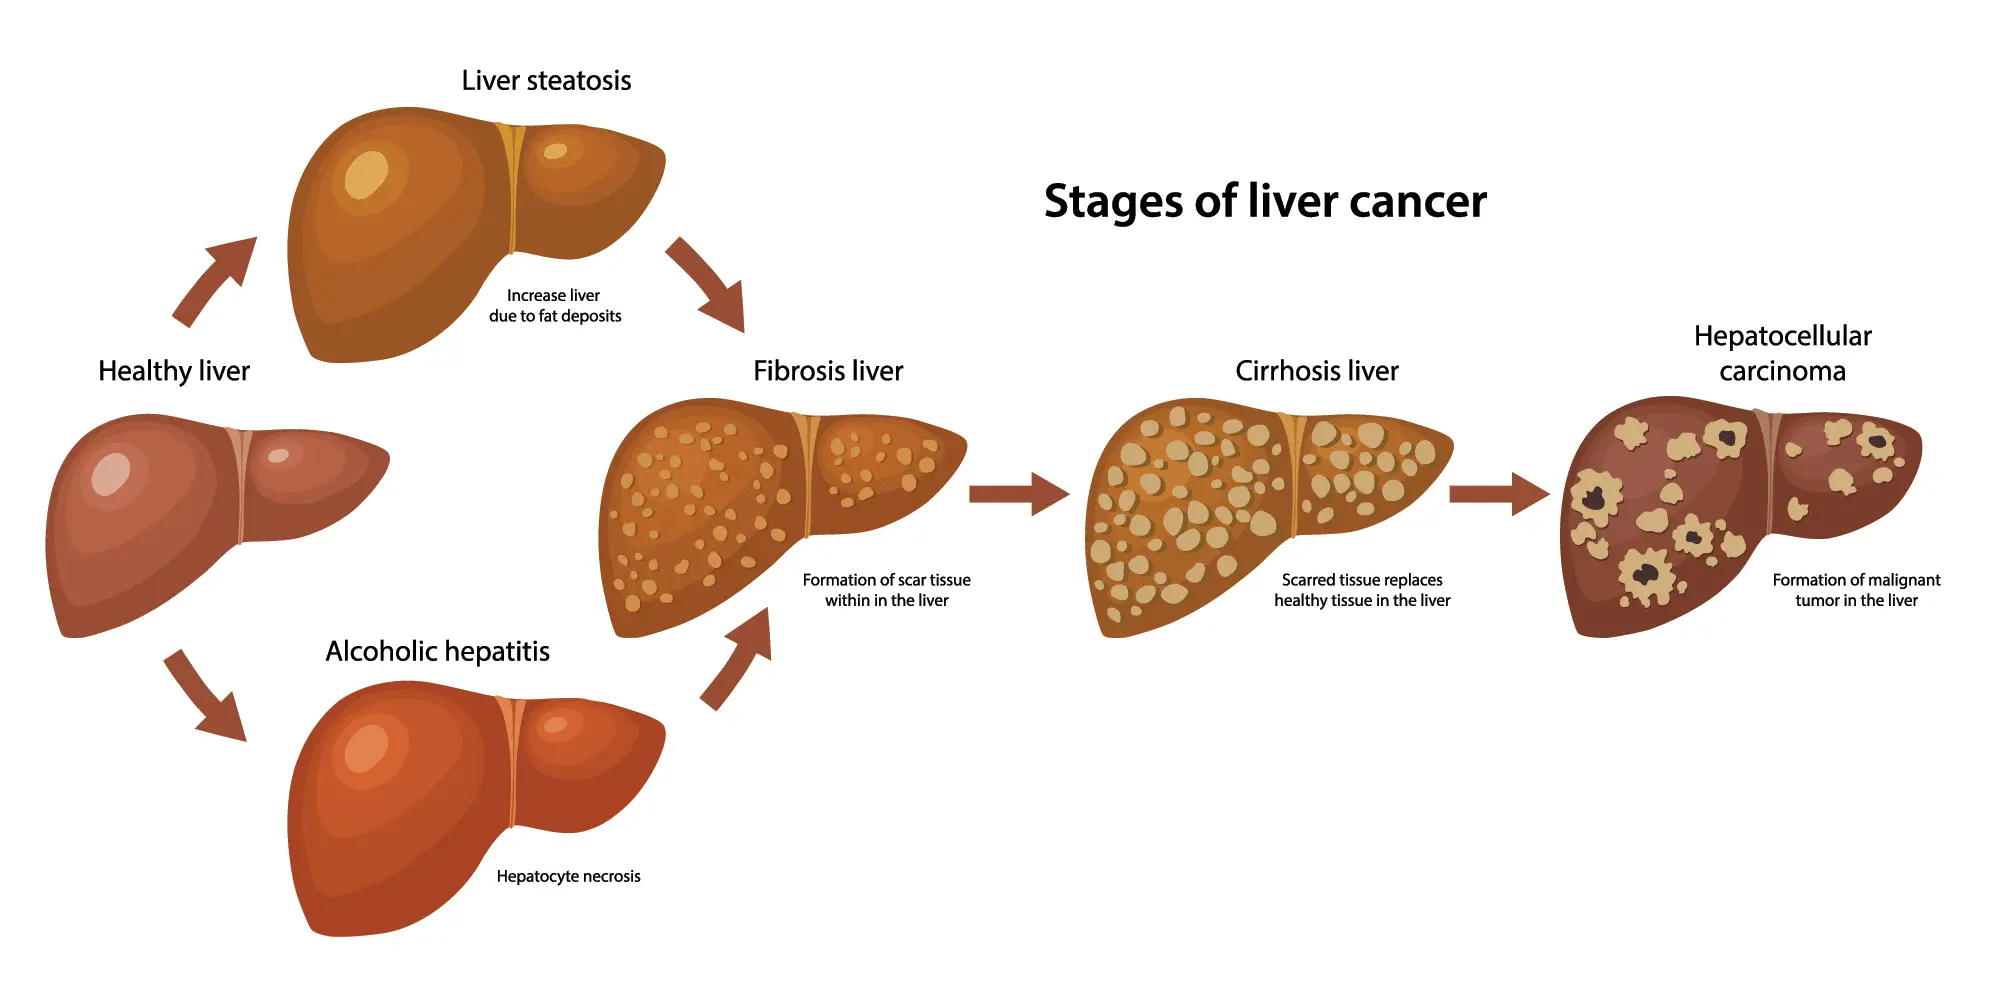
Since the start of the COVID-19 pandemic there have been over 290 million confirmed infections and 5 million deaths reported worldwide. Because of the unprecedented burden on healthcare resources, many healthcare activities such as chronic disease management, cancer screening and cancer treatments have been cancelled or delayed. Consequently, referrals of suspected new cancers have reduced, with increases in cancer-related deaths predicted.

The full impact of the COVID-19 pandemic on patients with primary liver cancer (PLC) has yet to be determined, although European data reported a disruption to hepatocellular carcinoma (HCC) services, a reduction in incident cases and an impact on management during the first wave of the pandemic (February 2020 to May 2020).

The data was prospectively collected on all patients referred to the Newcastle-upon-Tyne NHS Foundation Trust (NUTH) hepatopancreatobiliary multidisciplinary team (HPB MDT) in the first 12 months of the pandemic (March 2020-February 2021), comparing to a retrospective observational cohort of consecutive patients presenting in the 12 months immediately preceding it (March 2019-February 2020). All new cases with a diagnosis of hepatocellular carcinoma (HCC) or intrahepatic cholangiocarcinoma (ICC) confirmed radiologically or histologically, following international guidelines, were included.

### The objective is to assess the impact of the COVID-19 pandemic on patients with newly diagnosed liver cancer.

### Attribute Information
1. Cancer: Cancer flag [Y/N]
2. Year: Categorical [Prepandemic (March 2019–February 2020)/Postpandemic(March 2020–February 2021)]
3. Month: Month of the year 1-12
4. Bleed: Spontaneous tumour haemorrhage [Y/N]
5. Mode Presentation: Surveillance, Incidental, or Symptomatic
6. Age: Age of the patitent
7. Gender: Male or Female [M/F]
8. Etiology: manner of causation of a disease or condition. Either "No established CLD" (chronic liver disease), "ARLD" (alcohol-related liver disease), "NAFLD" (non-alcoholic fatty liver disease), "HCV" (hepatitis C virus), "HH" (hereditary haemochromatosis), "PBC/AIH" (primary biliary cholangitis/autoimmune hepatitis), "HBV" (hepatitis B virus), or "Other".
9. Cirrhosis: Underlying liver disease [Y/N]
10. Size: Tumour diameter in mm
11. HCC TNM Stage: Hepatocellular carcinoma Tumour node metastasis Stage ("I", "II", "IIIA+IIIB", "IV")
12. HCC BCLC Stage: Hepatocellular carcinoma Barcelona Clinic for Liver Cancer Stage ("0", "A", "B", "C", "D")
13. ICC TNM Stage: Intrahepatic cholangiocarcinoma Tumour node metastasis Stage ("I", "II", "III", "IV")
14. Treatment grps: First-line treatment received ["OLTx" (orthotopic liver transplantation), "Resection", "Ablation", "TACE"" (transarterial chemoembolisation), "SIRT" (selective internal radiation therapy), "Medical", "Supportive care"]
15. Survival from MDM: Survival from Multidisciplinary meeting
16. Alive Dead: "Alive", "Dead"
17. Type of incidental finding: ("Primary care-routine", "Secondary care-routine", "Primary care-acute", "Secondary care-acute")
18. Surveillance programme: Patient in a formal surveillance programme ("Y", "N")
19. Surveillance effectiveness: Surveillance adherence over previous year ("Consistent", "Inconsistent", "Missed")
20. Mode of surveillance detection: Mode of incident surveillance test ["US" (ultrasound), "AFP alone" (alpha-fetoprotein alone), "CT/MRI"]
21. Time diagnosis 1st Tx:
22. Date incident surveillance scan: ("Y", "N")
23. PS: Performance status [0, 1, 2, 3, 4]
24. Time MDM 1st treatment: Time to Multidisciplinary meeting 1st treatment
25. Time decision to treat 1st treatment: Time decision to treat 1st treatment
26. Prev known cirrhosis: ["Y", "N"]
27. Months from last surveillance: Months from last surveillance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

#libraries for Spliting data set
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.impute import KNNImputer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import (OneHotEncoder, 
                                    CountFrequencyEncoder, 
                                    OrdinalEncoder)
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser
#libraries for feature selection
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.selection import DropConstantFeatures


#libraries for Feature magnitude
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for ML models: Classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#libraries for Pipelines and Column Tranformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

#libraries for hyperparametres tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#libraries for Matrixes for evaluating models
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data_covid = pd.read_csv('../covid-liver.csv', encoding = 'ISO-8859-1')
data_covid

Cancer         Year  Month Bleed Mode_Presentation  Age Gender Etiology  \
0        Y  Prepandemic      1     N      Surveillance   68      M    NAFLD   
1        Y  Prepandemic      1     N      Surveillance   70      M     ARLD   
2        Y  Prepandemic      1     N      Surveillance   64      M     ARLD   
3        Y  Prepandemic      1     N        Incidental   73      M     ARLD   
4        Y  Prepandemic      1     N        Incidental   66      F     ARLD   
..     ...          ...    ...   ...               ...  ...    ...      ...   
445      N     Pandemic     12   NaN       Symptomatic   72      F      NaN   
446      N     Pandemic     12   NaN       Symptomatic   63      M      NaN   
447      N     Pandemic     12   NaN       Symptomatic   79      F      NaN   
448      N     Pandemic     12   NaN       Symptomatic   84      F      NaN   
449      N     Pandemic     12   NaN        Incidental   80      F      NaN   

    Cirrhosis  Size  ... Surveillance_programme Surveillance_effectiveness  \
0           Y  22.0  ...                      Y                 Consistent   
1           Y  40.0  ...                      Y                 Consistent   
2           Y  52.0  ...                      Y                 Consistent   
3           Y  80.0  ...                      N                        NaN   
4           Y  60.0  ...                      N                        NaN   
..        ...   ...  ...                    ...                        ...   
445       NaN   NaN  ...                    NaN                        NaN   
446       NaN  75.0  ...                    NaN                        NaN   
447       NaN  63.0  ...                    NaN                        NaN   
448       NaN  65.0  ...                    NaN                        NaN   
449       NaN  45.0  ...                    NaN                        NaN   

    Mode_of_surveillance_detection Time_diagnosis_1st_Tx  \
0                               US                  0.47   
1                               US                   NaN   
2                               US                   NaN   
3                              NaN                   NaN   
4                              NaN                   NaN   
..                             ...                   ...   
445                            NaN                   NaN   
446                            NaN                  2.93   
447                            NaN                   NaN   
448                            NaN                   NaN   
449                            NaN                  0.00   

     Date_incident_surveillance_scan   PS Time_MDM_1st_treatment  \
0                                NaN  0.0                   0.70   
1                                NaN  2.0                    NaN   
2                                NaN  0.0                    NaN   
3                                NaN  2.0                    NaN   
4                                NaN  0.0                    NaN   
..                               ...  ...                    ...   
445                              NaN  1.0                    NaN   
446                              NaN  0.0                   1.63   
447                              NaN  1.0                    NaN   
448                              NaN  2.0                    NaN   
449                              NaN  2.0                    NaN   

    Time_decisiontotreat_1st_treatment Prev_known_cirrhosis  \
0                                  NaN                    Y   
1                                  NaN                    Y   
2                                  NaN                    Y   
3                                  NaN                    Y   
4                                  NaN                    Y   
..                                 ...                  ...   
445                                NaN                    Y   
446                               1.63                    Y   
447          

In [3]:
data_covid.describe()

Month         Age        Size  Survival_fromMDM  \
count  450.000000  450.000000  400.000000        450.000000   
mean     6.757778   70.371111   53.355000         12.696622   
std      3.449476   10.572586   40.283257          9.703300   
min      1.000000   27.000000   10.000000         -0.030000   
25%      4.000000   65.000000   24.000000          4.032500   
50%      7.000000   72.000000   40.000000         10.785000   
75%     10.000000   78.000000   70.500000         21.282500   
max     12.000000   96.000000  220.000000         32.770000   

       Time_diagnosis_1st_Tx          PS  Time_MDM_1st_treatment  \
count             158.000000  448.000000              162.000000   
mean               -6.570380    1.225446                2.385988   
std               114.312876    1.030008                2.103355   
min             -1434.070000    0.000000               -0.870000   
25%                 1.207500    0.000000                1.185000   
50%                 1.915000    1.000000                1.800000   
75%                 3.160000    2.000000                2.722500   
max                13.570000    4.000000               15.000000   

       Time_decisiontotreat_1st_treatment  Months_from_last_surveillance  
count                          107.000000                     112.000000  
mean                             1.500841                      10.649970  
std                              1.492801                      12.262525  
min                             -0.870000                       0.330000  
25%                              0.715000                       5.566667  
50%                              1.370000                       6.300000  
75%                              1.715000                      10.600000  
max                             11.900000                      82.433333

In [4]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancer                              450 non-null    object 
 1   Year                                450 non-null    object 
 2   Month                               450 non-null    int64  
 3   Bleed                               310 non-null    object 
 4   Mode_Presentation                   450 non-null    object 
 5   Age                                 450 non-null    int64  
 6   Gender                              450 non-null    object 
 7   Etiology                            311 non-null    object 
 8   Cirrhosis                           311 non-null    object 
 9   Size                                400 non-null    float64
 10  HCC_TNM_Stage                       311 non-null    object 
 11  HCC_BCLC_Stage                      311 non-n

In [5]:
data_covid.isnull().sum().sort_values(ascending=False)

Date_incident_surveillance_scan       417
Mode_of_surveillance_detection        352
Time_decisiontotreat_1st_treatment    343
Months_from_last_surveillance         338
Surveillance_effectiveness            333
Type_of_incidental_finding            326
ICC_TNM_Stage                         311
Time_diagnosis_1st_Tx                 292
Time_MDM_1st_treatment                288
Bleed                                 140
HCC_BCLC_Stage                        139
Surveillance_programme                139
HCC_TNM_Stage                         139
Cirrhosis                             139
Etiology                              139
Size                                   50
Prev_known_cirrhosis                    5
PS                                      2
Treatment_grps                          2
Alive_Dead                              0
Survival_fromMDM                        0
Year                                    0
Gender                                  0
Age                               

In [6]:
data_covid.dtypes.value_counts()

object     18
float64     7
int64       2
dtype: int64

In [7]:
for var in data_covid.columns:
    print(var, data_covid[var].unique()[0:20], '\n')

Cancer ['Y' 'N'] 

Year ['Prepandemic' 'Pandemic'] 

Month [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Bleed ['N' nan 'Y'] 

Mode_Presentation ['Surveillance' 'Incidental' 'Symptomatic'] 

Age [68 70 64 73 66 67 57 75 81 82 74 76 78 71 86 77 85 54 72 63] 

Gender ['M' 'F'] 

Etiology ['NAFLD' 'ARLD' 'HCV' 'No established CLD' 'PBC/AIH' 'HH' 'HBV' 'Other'
 nan] 

Cirrhosis ['Y' 'N' nan] 

Size [ 22.  40.  52.  80.  60.  24.  28.  45.  33. 100.  27.  19. 150.  23.
  54. 110.  14.  55.  11.  30.] 

HCC_TNM_Stage ['II' 'I' 'IV' 'IIIA+IIIB' nan] 

HCC_BCLC_Stage ['A' 'D' 'B' 'C' '0' nan] 

ICC_TNM_Stage [nan 'II' 'IV' 'I' 'III'] 

Treatment_grps ['Ablation' 'Supportive care' 'Medical' 'TACE' 'SIRT' 'OLTx' 'Resection'
 nan] 

Survival_fromMDM [32.73  3.03 14.97  1.4  32.5  26.4  32.27  4.73 24.4   3.1  23.17  4.8
 15.53 13.87 31.83  7.1   7.2  16.1  11.3   7.03] 

Alive_Dead ['Alive' 'Dead'] 

Type_of_incidental_finding [nan 'Secondary care\x97acute' 'Primary care\x97routine'
 'Secondary care\x9

## Data visualization

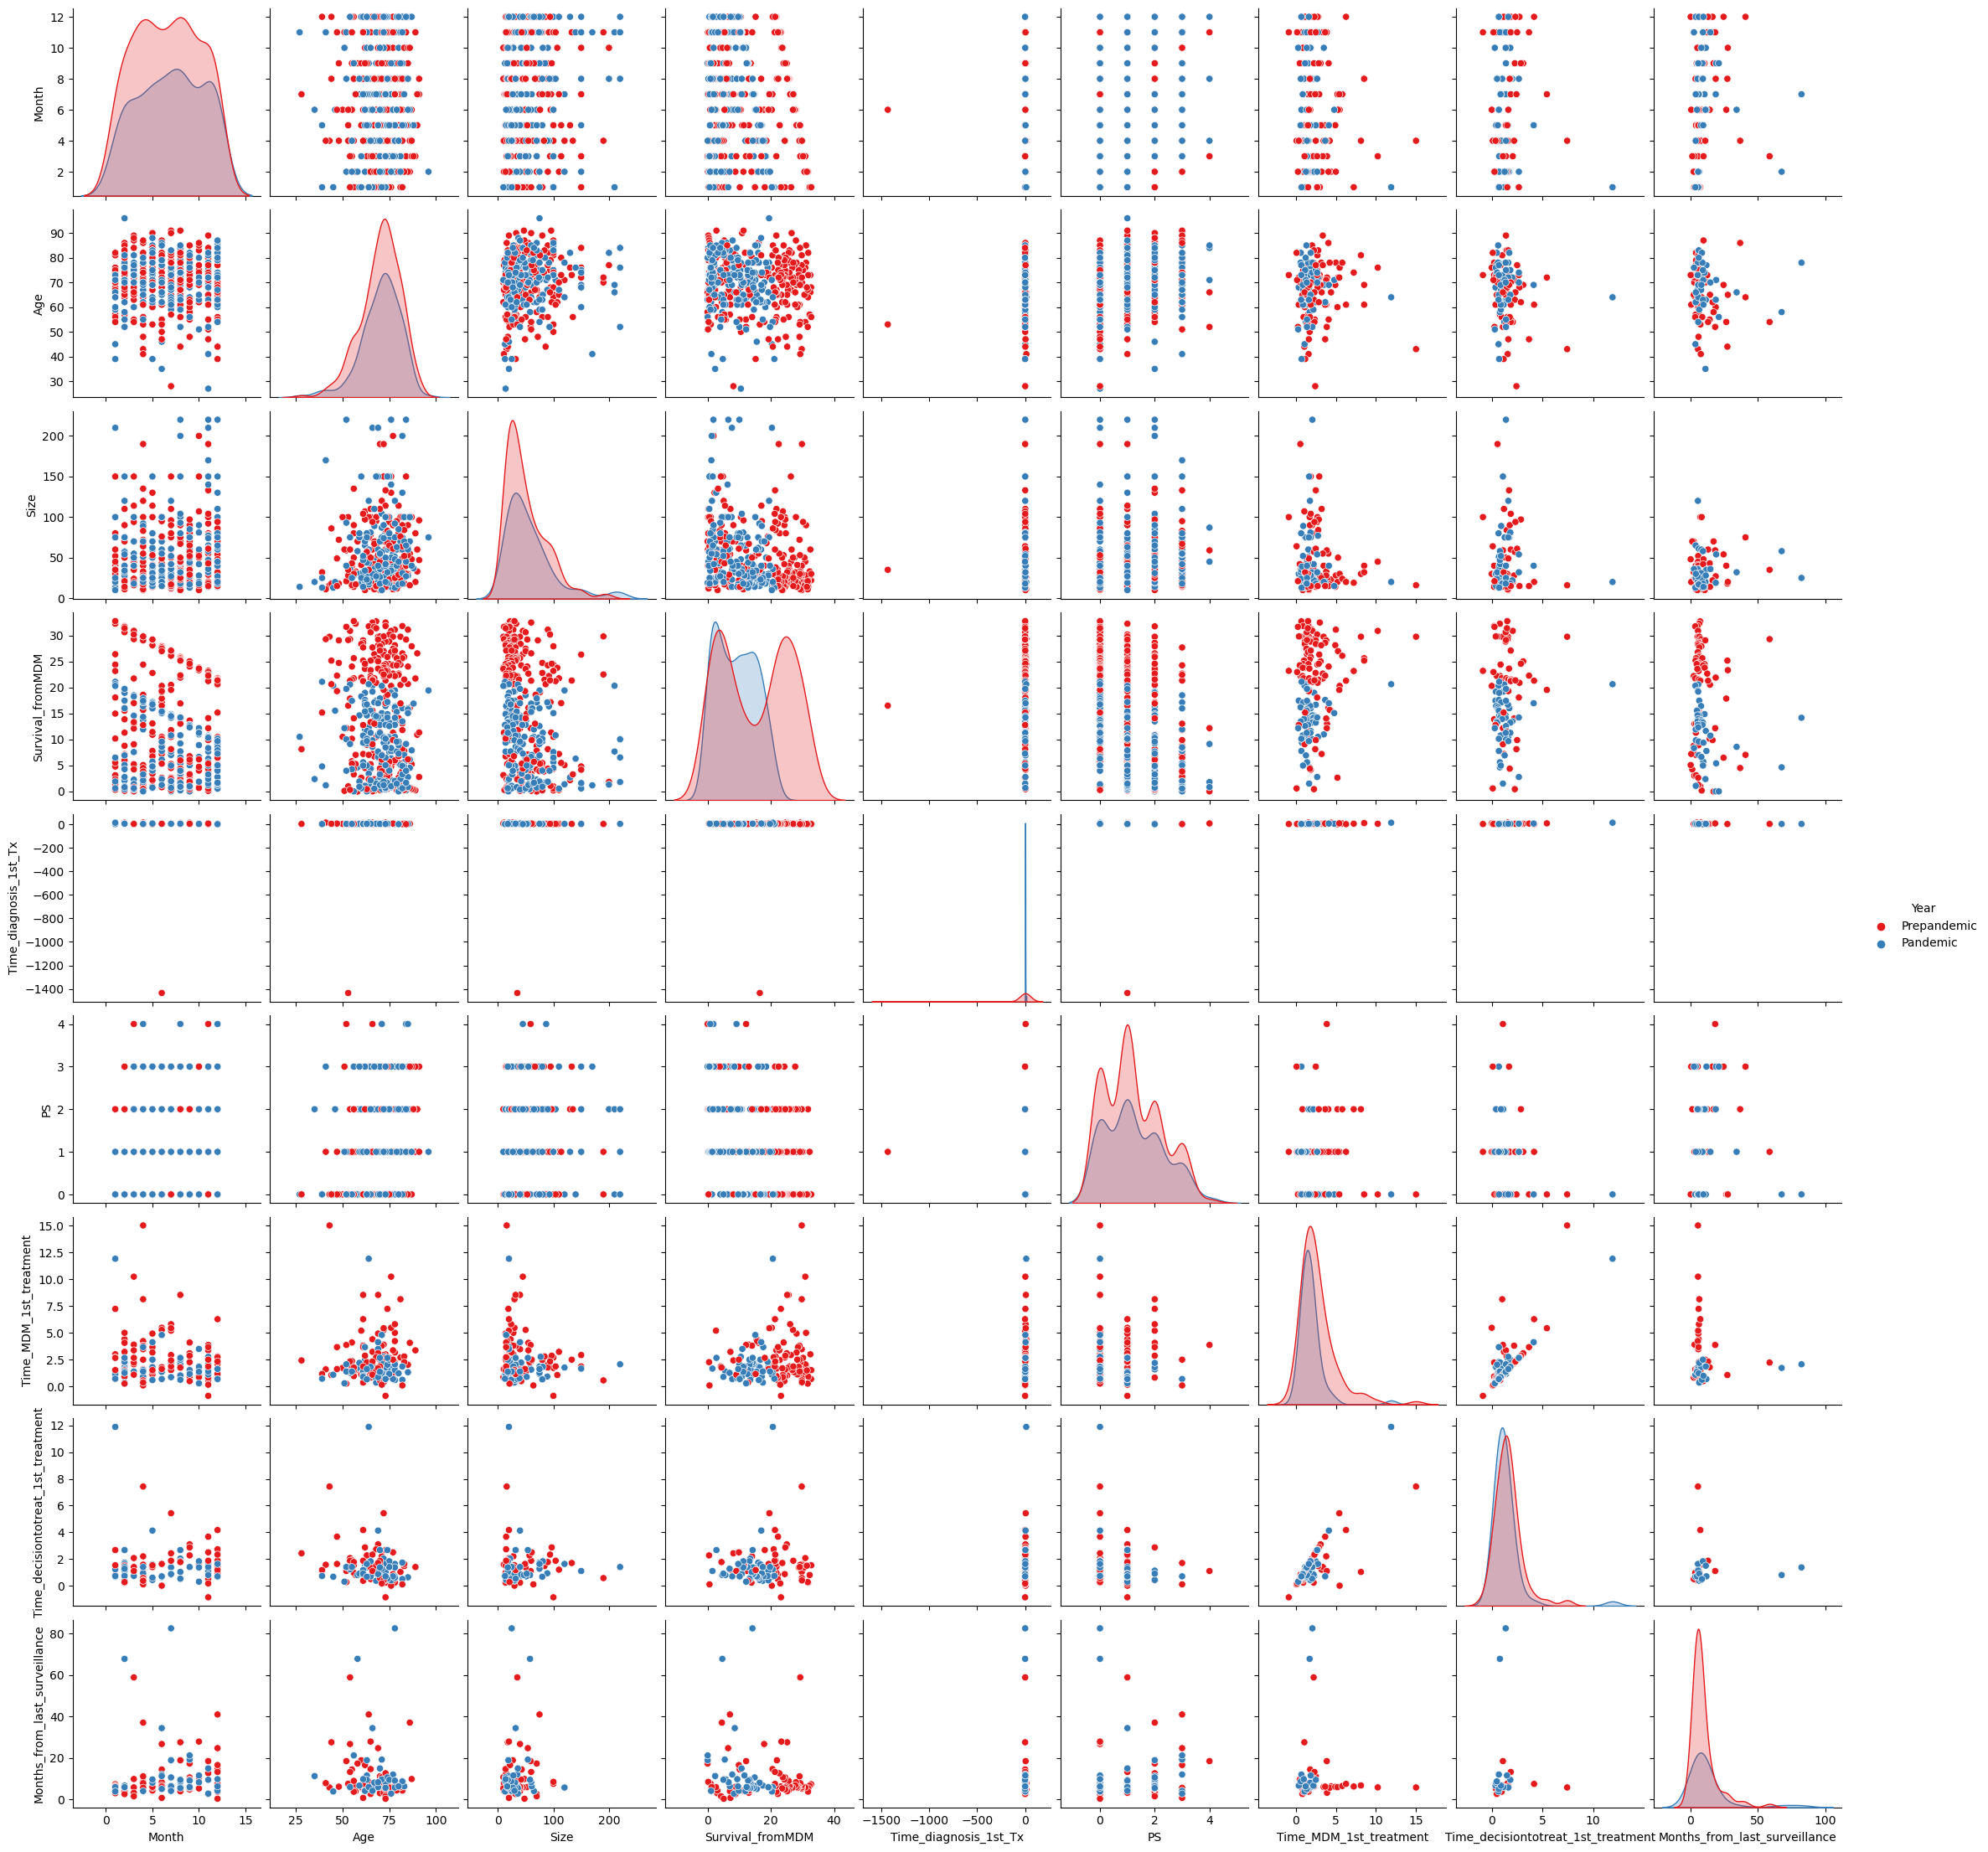

In [8]:
sns.pairplot(data_covid, hue = 'Year', palette='Set1')

##  "Cancer" 

In [9]:
colors = ['green', 'yellow']
labels = ['Yes', 'No']
order = data_covid['Cancer'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Covid-liver', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')

plt.subplot(1, 2, 1)
plt.title('Cancer %', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
plt.pie(data_covid['Cancer'].value_counts(), labels = labels, colors = colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8,))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
ax = sns.countplot(x = 'Cancer', data = data_covid, palette = colors, order = order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )
 
plt.show()

    In this dataset, 69% have liver cancer

##  target Year [Prepandemic (March 2019–February 2020)/Pandemic(March 2020–February 2021)]

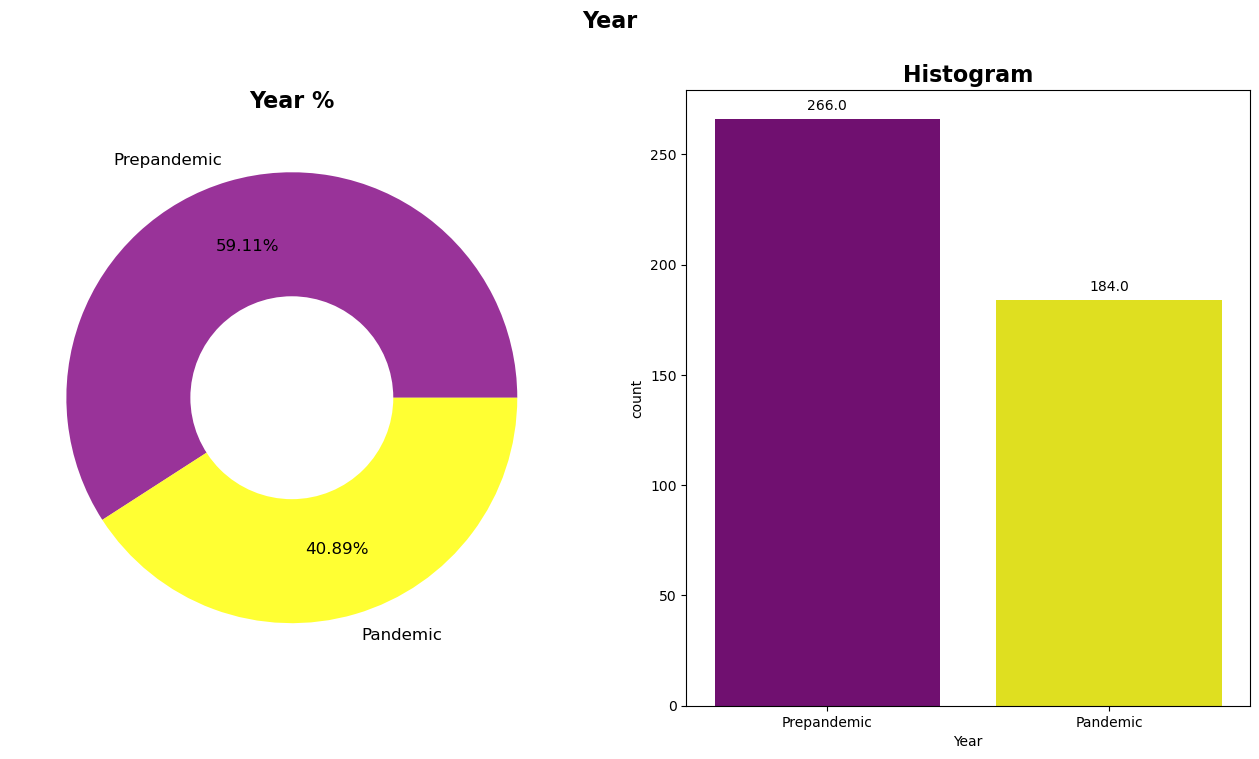

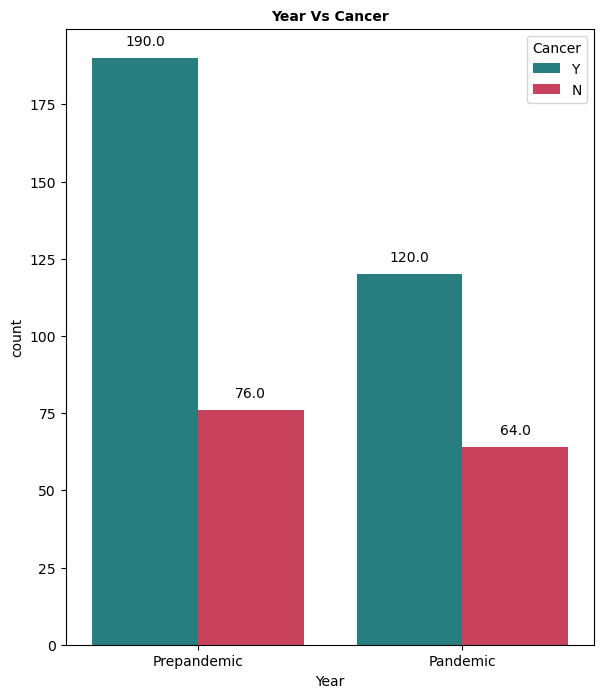

In [10]:
colors = ['purple', 'yellow']
labels = ['Prepandemic', 'Pandemic']
order = data_covid['Year'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Year', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')

plt.subplot(1, 2, 1)
plt.title('Year %', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
plt.pie(data_covid['Year'].value_counts(), labels = labels, colors = colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8,))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
ax = sns.countplot(x = 'Year', data = data_covid, palette = colors, order = order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )
colors = ['teal', 'crimson']
order = data_covid['Year'].value_counts().index
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('Year Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Year', hue = 'Cancer', data = data_covid, palette = colors, order = order, alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

In [11]:
year_cancer =pd.crosstab(data_covid['Year'],data_covid['Cancer'])
year_cancer

Cancer        N    Y
Year                
Pandemic     64  120
Prepandemic  76  190

    Before the pandemic, 59.11% were diagnosed with liver cancer than during the pandemic. This is explained by the fact that during the pandemic almost all medical institutions specializing in a subspecialty, their work was suspended or postponed. So, the liver cancer detection rates are lower. 

In [12]:
data_covid

Cancer         Year  Month Bleed Mode_Presentation  Age Gender Etiology  \
0        Y  Prepandemic      1     N      Surveillance   68      M    NAFLD   
1        Y  Prepandemic      1     N      Surveillance   70      M     ARLD   
2        Y  Prepandemic      1     N      Surveillance   64      M     ARLD   
3        Y  Prepandemic      1     N        Incidental   73      M     ARLD   
4        Y  Prepandemic      1     N        Incidental   66      F     ARLD   
..     ...          ...    ...   ...               ...  ...    ...      ...   
445      N     Pandemic     12   NaN       Symptomatic   72      F      NaN   
446      N     Pandemic     12   NaN       Symptomatic   63      M      NaN   
447      N     Pandemic     12   NaN       Symptomatic   79      F      NaN   
448      N     Pandemic     12   NaN       Symptomatic   84      F      NaN   
449      N     Pandemic     12   NaN        Incidental   80      F      NaN   

    Cirrhosis  Size  ... Surveillance_programme Surveillance_effectiveness  \
0           Y  22.0  ...                      Y                 Consistent   
1           Y  40.0  ...                      Y                 Consistent   
2           Y  52.0  ...                      Y                 Consistent   
3           Y  80.0  ...                      N                        NaN   
4           Y  60.0  ...                      N                        NaN   
..        ...   ...  ...                    ...                        ...   
445       NaN   NaN  ...                    NaN                        NaN   
446       NaN  75.0  ...                    NaN                        NaN   
447       NaN  63.0  ...                    NaN                        NaN   
448       NaN  65.0  ...                    NaN                        NaN   
449       NaN  45.0  ...                    NaN                        NaN   

    Mode_of_surveillance_detection Time_diagnosis_1st_Tx  \
0                               US                  0.47   
1                               US                   NaN   
2                               US                   NaN   
3                              NaN                   NaN   
4                              NaN                   NaN   
..                             ...                   ...   
445                            NaN                   NaN   
446                            NaN                  2.93   
447                            NaN                   NaN   
448                            NaN                   NaN   
449                            NaN                  0.00   

     Date_incident_surveillance_scan   PS Time_MDM_1st_treatment  \
0                                NaN  0.0                   0.70   
1                                NaN  2.0                    NaN   
2                                NaN  0.0                    NaN   
3                                NaN  2.0                    NaN   
4                                NaN  0.0                    NaN   
..                               ...  ...                    ...   
445                              NaN  1.0                    NaN   
446                              NaN  0.0                   1.63   
447                              NaN  1.0                    NaN   
448                              NaN  2.0                    NaN   
449                              NaN  2.0                    NaN   

    Time_decisiontotreat_1st_treatment Prev_known_cirrhosis  \
0                                  NaN                    Y   
1                                  NaN                    Y   
2                                  NaN                    Y   
3                                  NaN                    Y   
4                                  NaN                    Y   
..                                 ...                  ...   
445                                NaN                    Y   
446                               1.63                    Y   
447          

## Gender

<AxesSubplot:ylabel='None'>

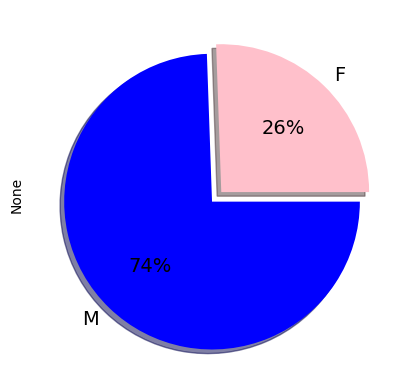

In [13]:
data_covid.groupby('Gender').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['pink', 'blue'])

    there are more men than women in this dataset

## Distribution of liver cancer by age

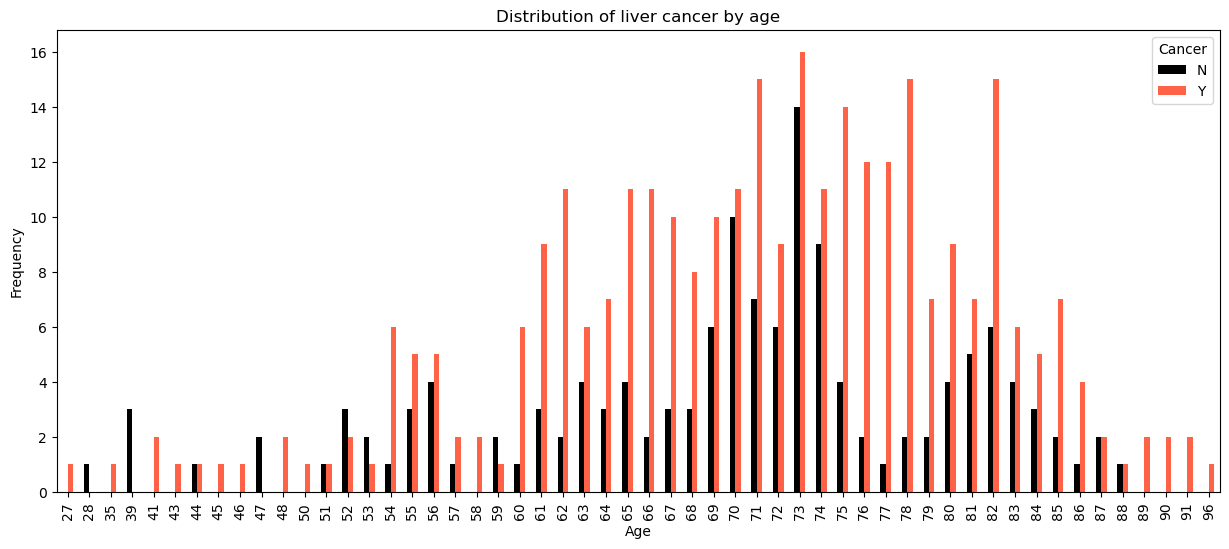

In [14]:
pd.crosstab(data_covid.Age, data_covid.Cancer).plot(kind="bar",figsize=(15,6), color = [ 'black', 'tomato',])
plt.title("Distribution of liver cancer by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [15]:
print(data_covid['Age'].max(), data_covid['Age'].min(), data_covid['Age'].mean())

96 27 70.3711111111111


    liver cancer is more common from age 60 to 85, with an average age of 71 years

## Gender distribution by age and target

In [16]:
pd.crosstab(data_covid.Age, [data_covid.Gender, data_covid.Cancer]).plot(kind="bar",figsize=(15,8), color = ['hotpink', 'gold', 'olive', 'brown'])
plt.title("Gender distribution by age and target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. The youngest age in men with liver cancer is 27 years, the oldest 96 years. 
    2. In women, the youngest age of liver cancer patients is 41 years old, the oldest is 87 years old. 

## Month & Year & Cancer

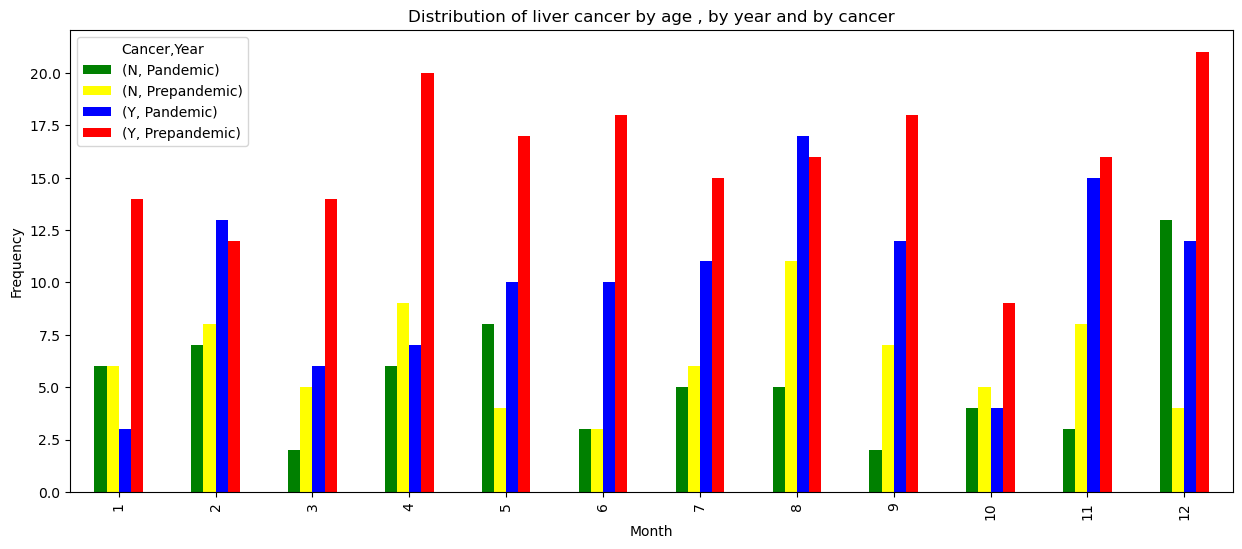

In [21]:
pd.crosstab(data_covid.Month, [data_covid.Cancer, data_covid.Year]).plot(kind = 'bar', figsize = (15, 6), color = ['green', 'yellow', 'blue', 'red'])
plt.title('Distribution of liver cancer by age , by year and by cancer')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

    Before the pandemic, liver cancer detection was consistently seen every month.
    During the pandemic, the detection of liver cancer decreases by a factor of 2, which is explained by the fact that specialized hospitals were closed. 
    In August 2020 during the pandemic, cancer detection increases, this is because the lockdown is ending and hospital operations are being restored.  
    February 2021 is the end of the pandemic and liver cancer detection increases. 

## Distribution of liver cancer by age , by year and by target

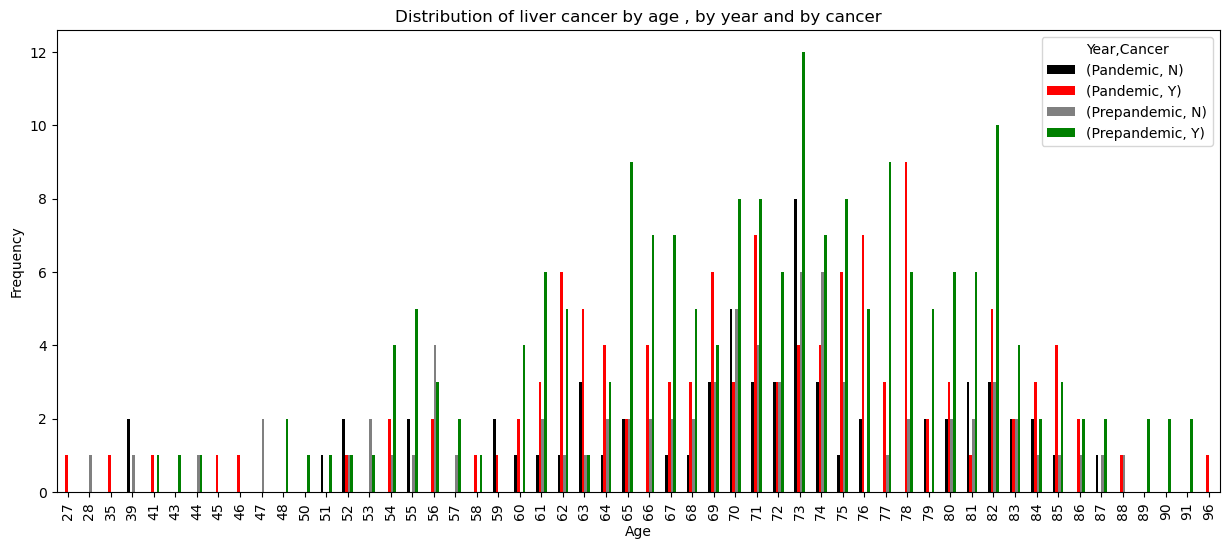

In [22]:
pd.crosstab(data_covid.Age, [data_covid.Year, data_covid.Cancer]).plot(kind="bar",figsize=(15,6), color = [ 'black', 'red', 'gray', 'green'])
plt.title("Distribution of liver cancer by age , by year and by cancer")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. At 27, age 96, first diagnosed with liver cancer during the pandemic. They are probably hospitalized with COVID-19. 
    2. Detection of liver cancer by age before the pandemic is higher than during the pandemic.  

## Bleed: Spontaneous tumour haemorrhage [Y/N]

<AxesSubplot:ylabel='None'>

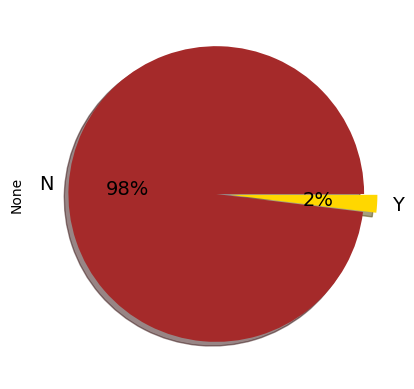

In [19]:
data_covid.groupby('Bleed').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['brown', 'gold',])

    98% tumor bleeding was not observed.

### Survival_fromMDM - Survival from Multidisciplinary meeting. Выживание после МДМ: Выживание после междисциплинарной встречи

<AxesSubplot:xlabel='Survival_fromMDM', ylabel='Density'>

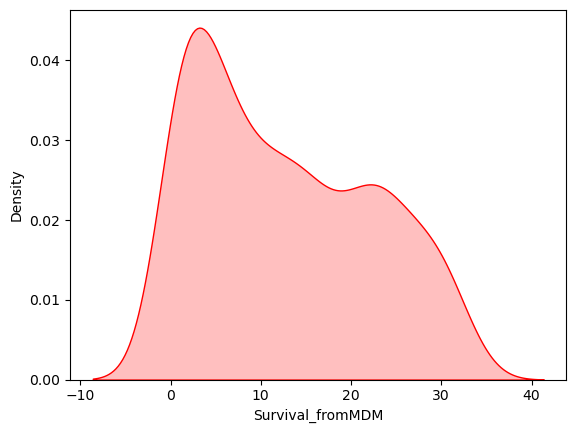

In [20]:
sns.kdeplot(data_covid['Survival_fromMDM'], label = 'Survival_fromMDM', fill = True, color = 'red')

## Mode Presentation: Surveillance, Incidental, or Symptomatic

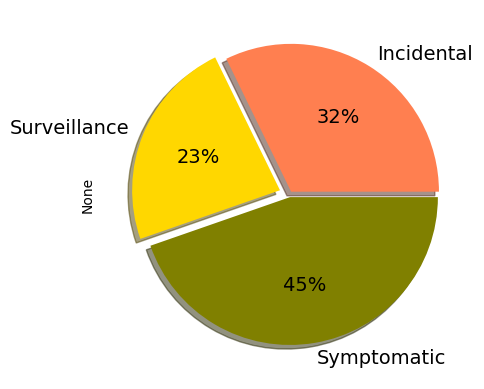

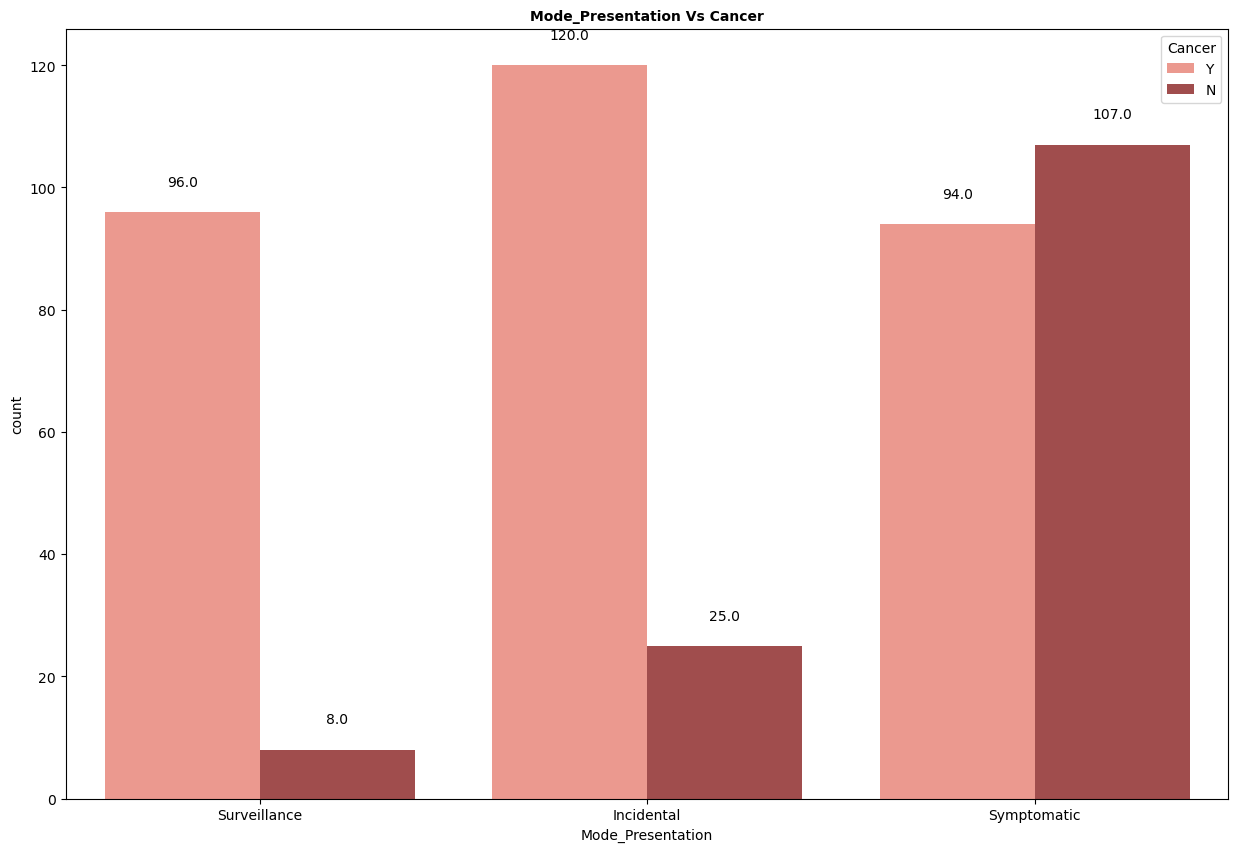

In [21]:
data_covid.groupby('Mode_Presentation').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070, 0.02],shadow=True,
                                           colors=['coral', 'gold', 'olive'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Mode_Presentation Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Mode_Presentation', hue = 'Cancer', data = data_covid, palette = ['salmon', 'brown'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. 45% are symptomatically detected with liver cancer, 32% are incidentally detected, and 23% are observed.
    2. those who were observed with other liver diseases, liver cancer was diagnosed more often - 96 cases. 
    3. 120 times there is accidental detection of liver cancer
    4. 107 cases had symptoms of liver cancer but was not diagnosed 


## Mode_Presentation Vs Year

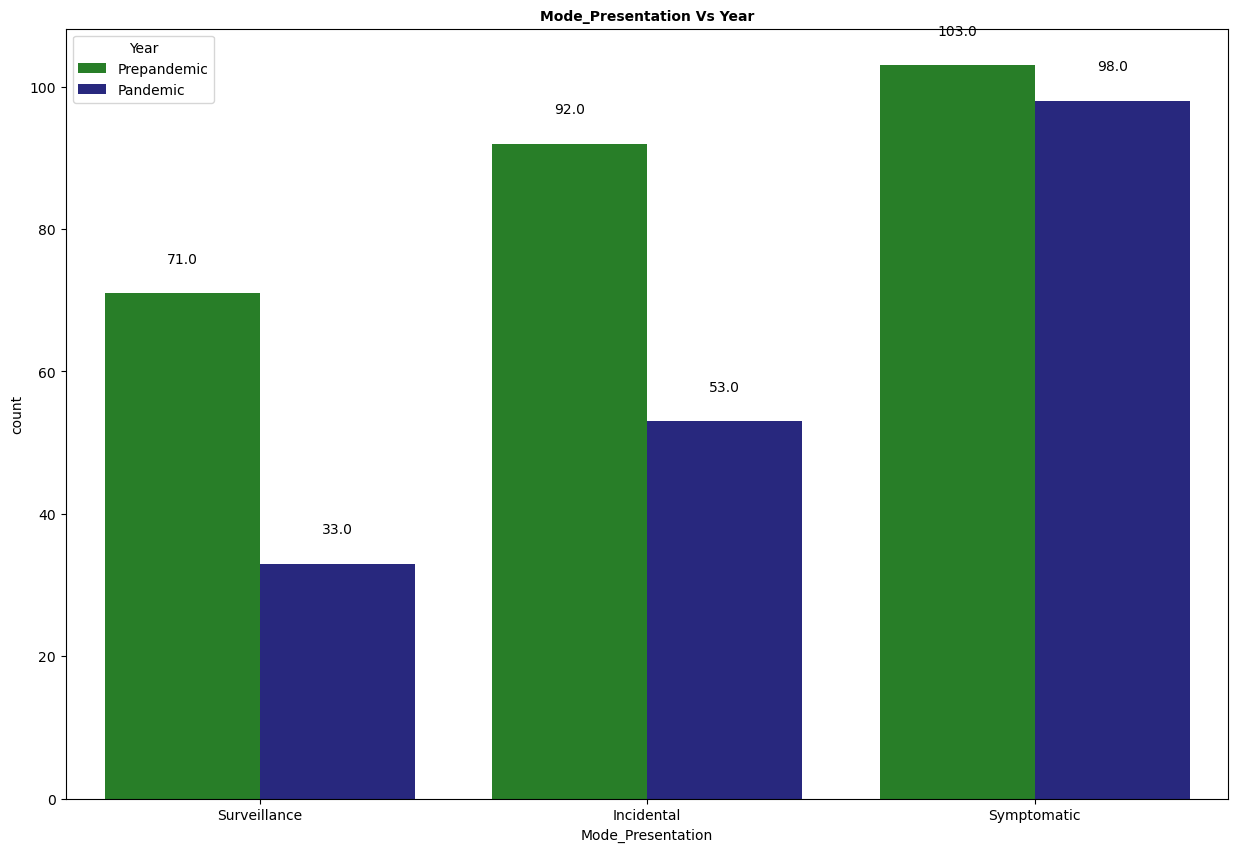

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Mode_Presentation Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Mode_Presentation', hue = 'Year', data = data_covid, palette = ['green', 'navy'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

         1. During the pandemic, symptomatic detection of liver cancer was the same as before the pandemic. This is because, first, other hospitals were closed and people went only to the infectious disease unit. Second, all symptoms of liver cancer may have been attributed to COVID-19 symptoms. 

## Etiology

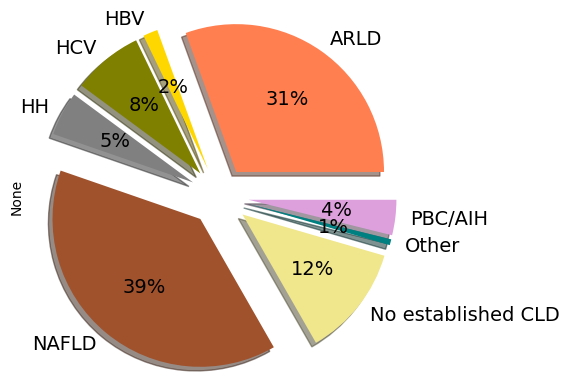

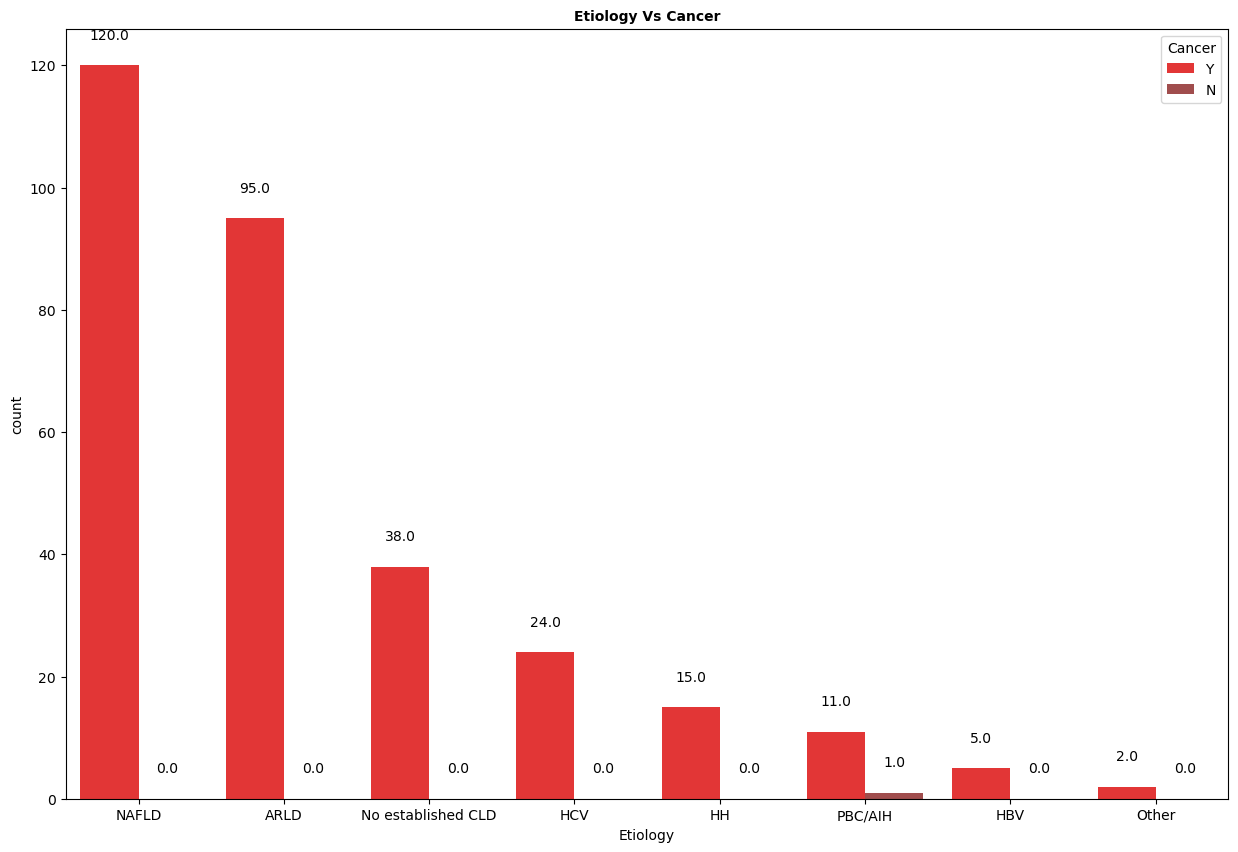

In [23]:
data_covid.groupby('Etiology').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey', 'sienna', 'khaki', 'teal', 'plum'])

order = data_covid['Etiology'].value_counts().index
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Etiology Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Etiology', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order=order,   alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

      Etiology of liver cancer: 
    1. NAFLD - 39% non-alcoholic fatty liver disease. 
    2. 31% - ARLD - alcohol-related liver disease.
    3. 12% - No established CLD (chronic liver disease). 
    4. 8% HCV - hepatitis C virus, 
    5. 5% HH - hereditary hemochromatosis. 
    6. 4% PBC/AIH primary biliary cholungitis/autoimmune hepatitis
    7. 2% HBV - hepatitis B virus
    8. 1% Other

## Etiology Vs Gender

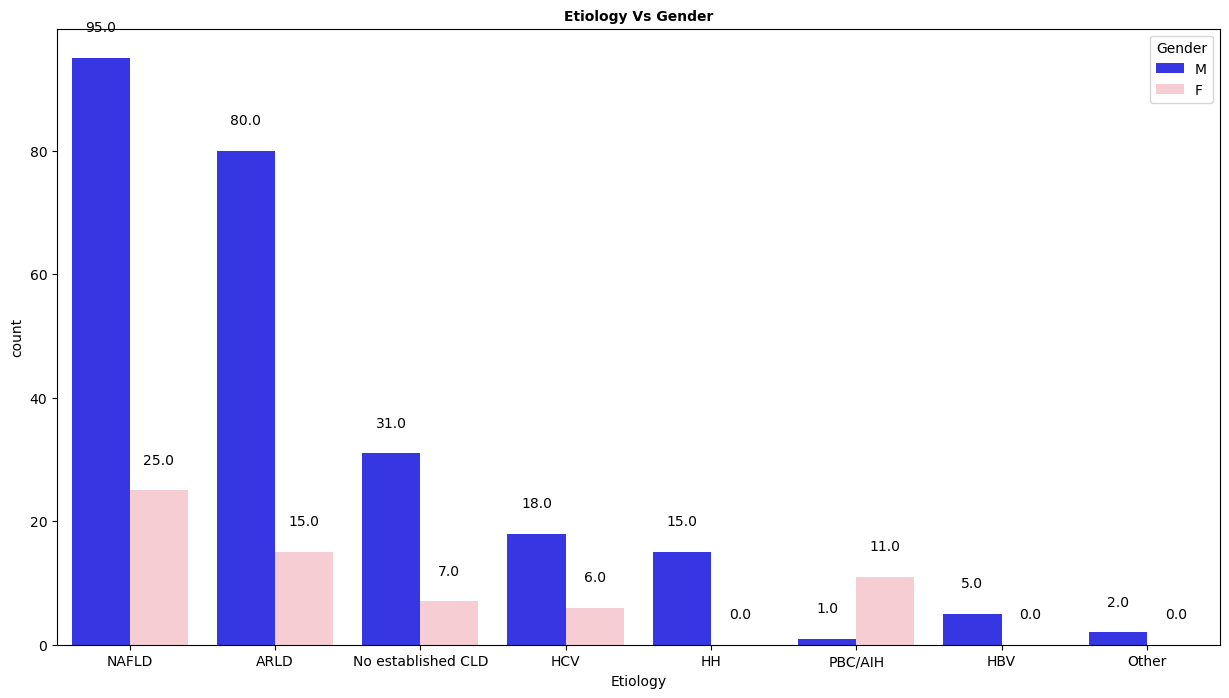

In [24]:
order = data_covid['Etiology'].value_counts().index

plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Etiology Vs Gender', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Etiology', hue = 'Gender', data = data_covid, palette = ['blue', 'pink'],order=order,   alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    This graph shows the distribution of liver cancer etiology by sex, knowing this dataset, where men are 74% more numerous than women, it turns out that the etiology is dominated by men.  

## Distribution of etiology by age

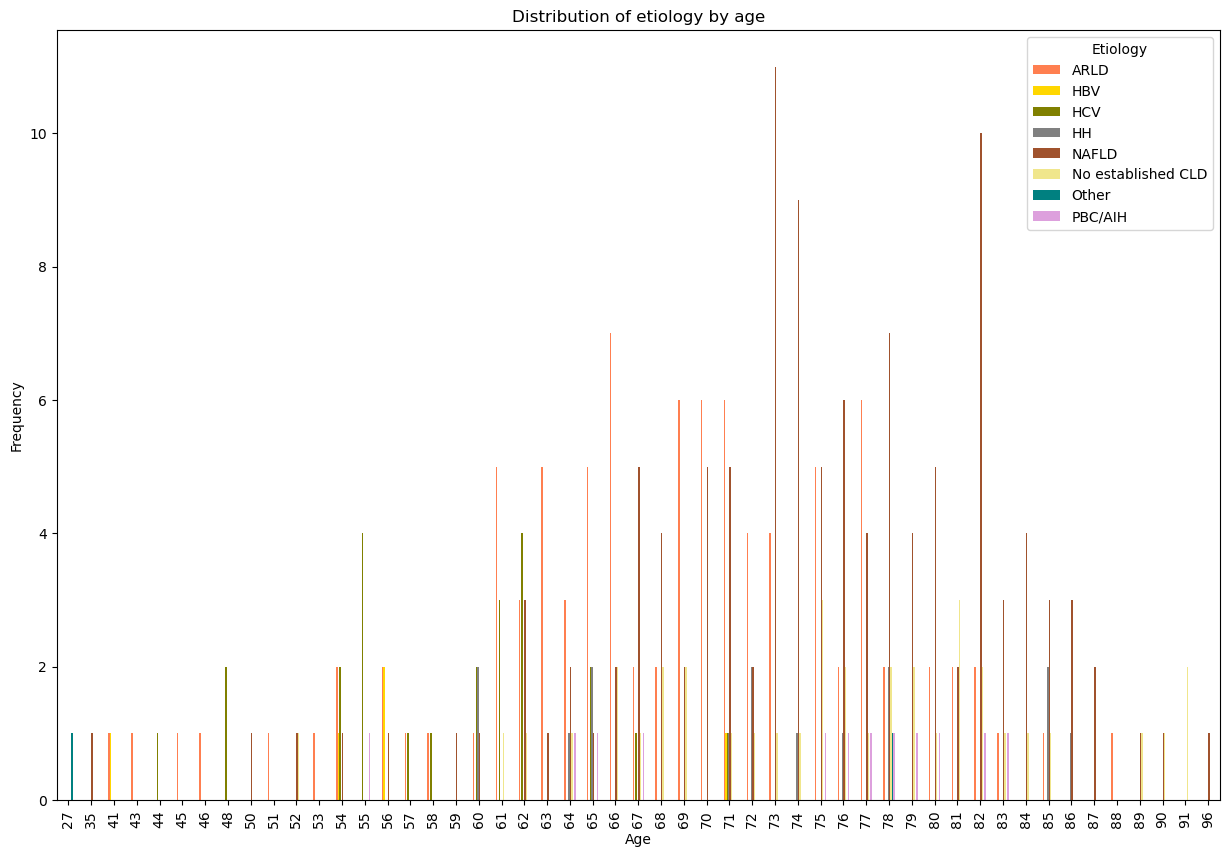

In [25]:
pd.crosstab(data_covid.Age, data_covid.Etiology).plot(kind="bar",figsize=(15,10), color = ['coral', 'gold', 'olive', 'grey', 'sienna', 'khaki', 'teal', 'plum'])
plt.title("Distribution of etiology by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

пиши коммент. 

In [26]:
pd.crosstab(data_covid.Etiology,
            [data_covid.Age])

Age                 27  35  41  43  44  45  46  48  50  51  ...  83  84  85  \
Etiology                                                    ...               
ARLD                 0   0   1   1   0   1   1   0   0   1  ...   1   0   1   
HBV                  0   0   1   0   0   0   0   0   0   0  ...   0   0   0   
HCV                  0   0   0   0   1   0   0   2   0   0  ...   0   0   0   
HH                   0   0   0   0   0   0   0   0   0   0  ...   0   0   2   
NAFLD                0   1   0   0   0   0   0   0   1   0  ...   3   4   3   
No established CLD   0   0   0   0   0   0   0   0   0   0  ...   1   1   1   
Other                1   0   0   0   0   0   0   0   0   0  ...   0   0   0   
PBC/AIH              0   0   0   0   0   0   0   0   0   0  ...   1   0   0   

Age                 86  87  88  89  90  91  96  
Etiology                                        
ARLD                 0   0   1   0   0   0   0  
HBV                  0   0   0   0   0   0   0  
HCV                  0   0   0   0   0   0   0  
HH                   1   0   0   0   0   0   0  
NAFLD                3   2   0   1   1   0   1  
No established CLD   0   0   0   1   1   2   0  
Other                0   0   0   0   0   0   0  
PBC/AIH              0   0   0   0   0   0   0  

[8 rows x 51 columns]

<AxesSubplot:xlabel='Age', ylabel='Etiology'>

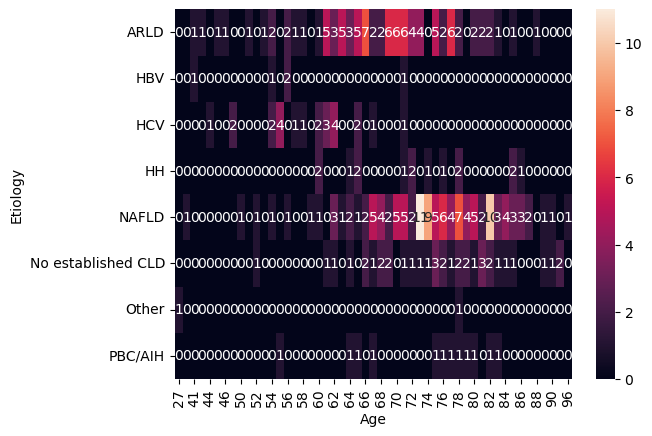

In [27]:
sns.heatmap(pd.crosstab([data_covid.Etiology],
                        [data_covid.Age]), annot=True, fmt = 'd')

## Etiology Vs Year

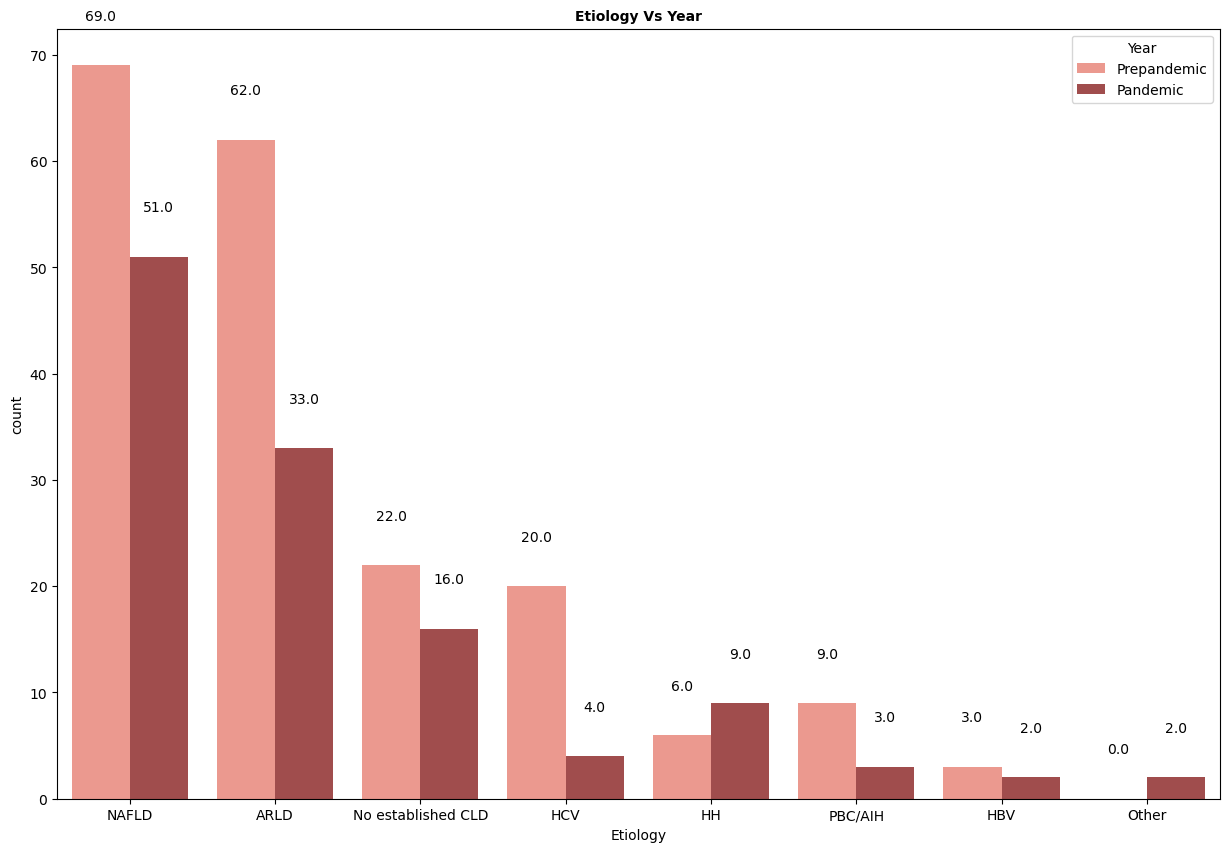

In [28]:
order = data_covid['Etiology'].value_counts().index
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Etiology Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Etiology', hue = 'Year', data = data_covid, palette = ['salmon', 'brown'], order=order, alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. There is also a decrease in liver cancer by etiology during the pandemic. 

## Cirrhosis - Underlying liver disease (основное заболевание)

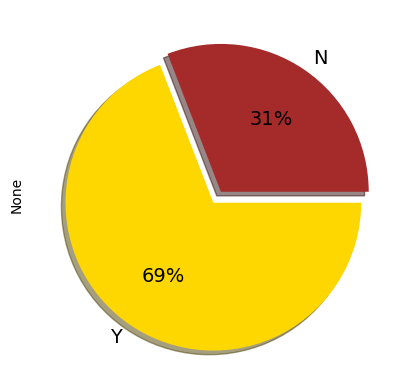

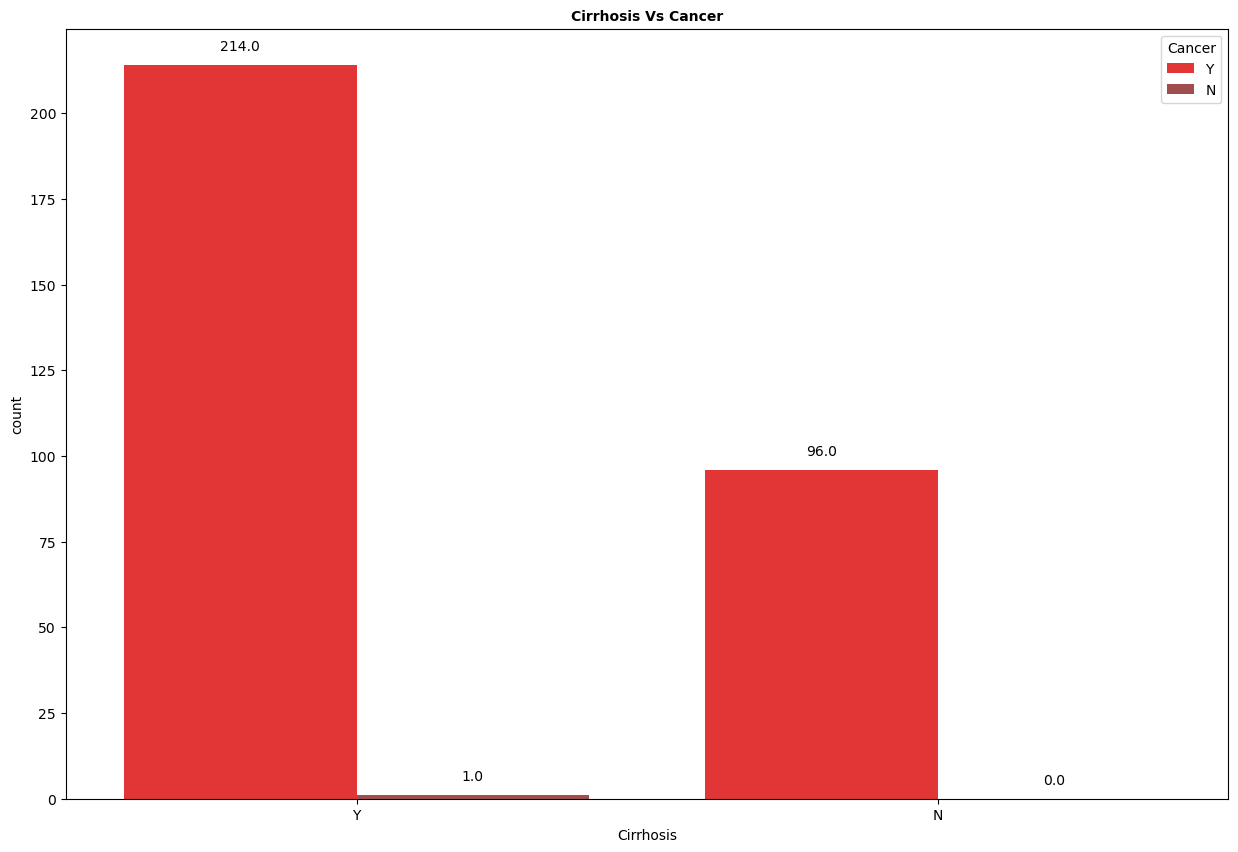

In [29]:
data_covid.groupby('Cirrhosis').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['brown', 'gold',])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Cirrhosis Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Cirrhosis', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. Liver cancer is more often diagnosed if the patient has cirrhosis and it is considered to be the underlying disease  

## Distribution of cirrhosis by Year

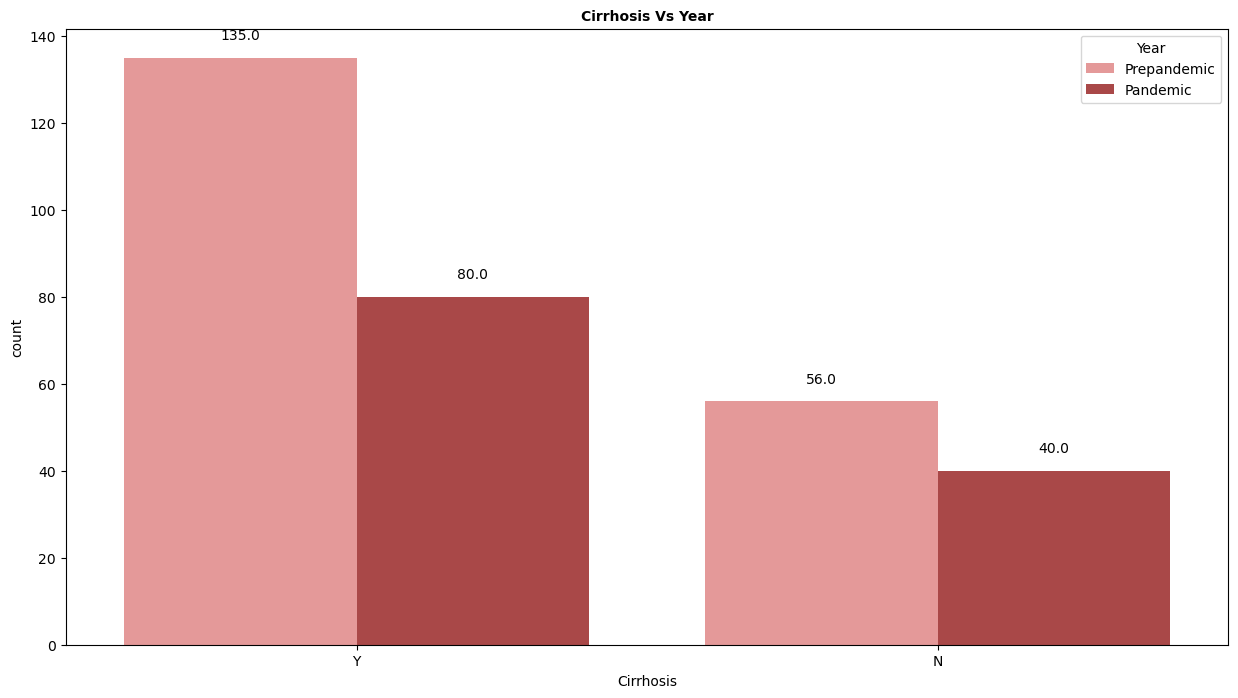

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Cirrhosis Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Cirrhosis', hue = 'Year', data = data_covid, palette = ['lightcoral', 'firebrick'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    The detection of liver cirrhosis during the pandemic is low. 

## Distribution of cirrhosis by age

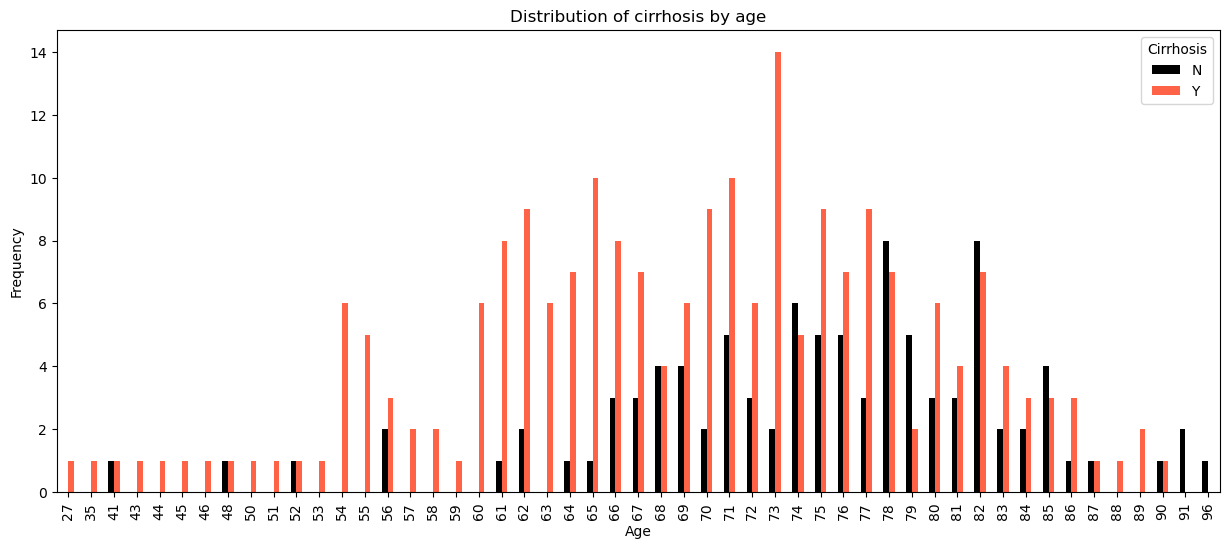

In [31]:
pd.crosstab(data_covid.Age, data_covid.Cirrhosis).plot(kind="bar",figsize=(15,6), color = [ 'black', 'tomato',])
plt.title("Distribution of cirrhosis by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

     cirrhosis affects people between the ages of 27 and 90.

## Distribution of liver cirrhosis by age and cancer

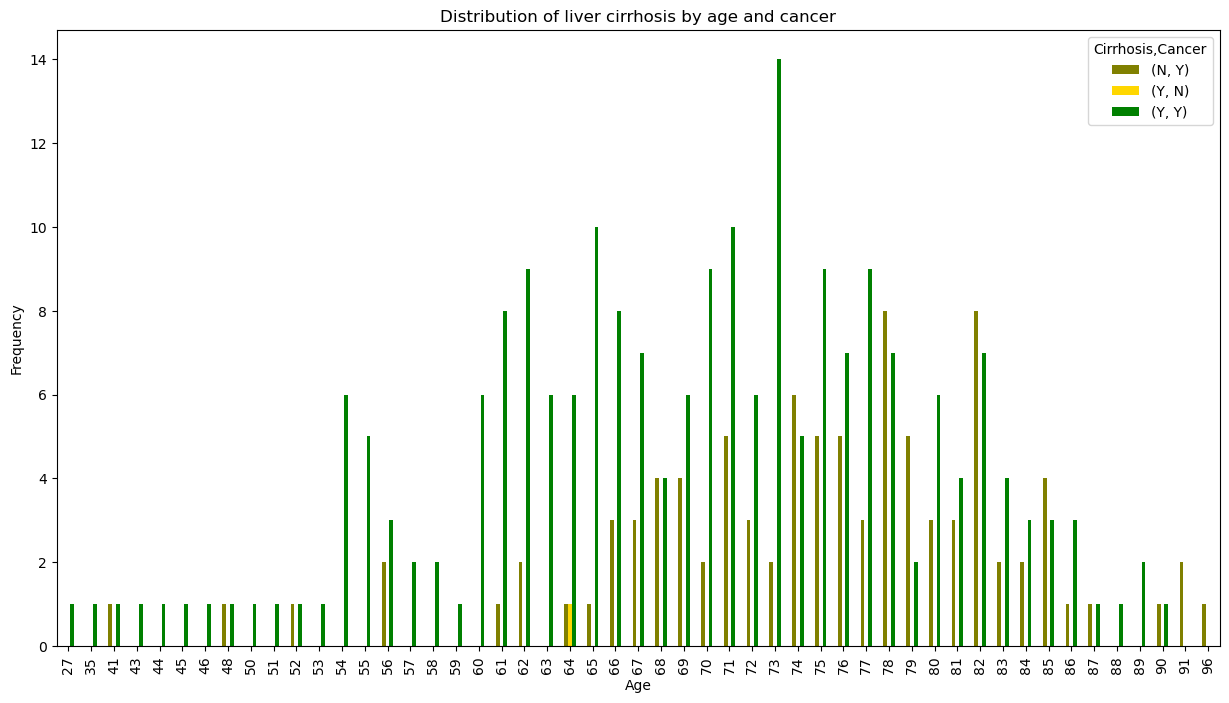

In [32]:
pd.crosstab(data_covid.Age, [data_covid.Cirrhosis, data_covid.Cancer]).plot(kind="bar",figsize=(15,8), color = ['olive', 'gold', 'g'])
plt.title("Distribution of liver cirrhosis by age and cancer")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. from the age of 27 until the age of 90, cirrhosis of the liver is considered to be the main disease against which liver cancer developed
    2. at 64 years of age there is cirrhosis of the liver but liver cancer is not diagnosed. 
    3. from the age of 41 to 96 years old have liver cancer and cirrhosis is not the main disease. 

## Cirrhosis Vs Gender

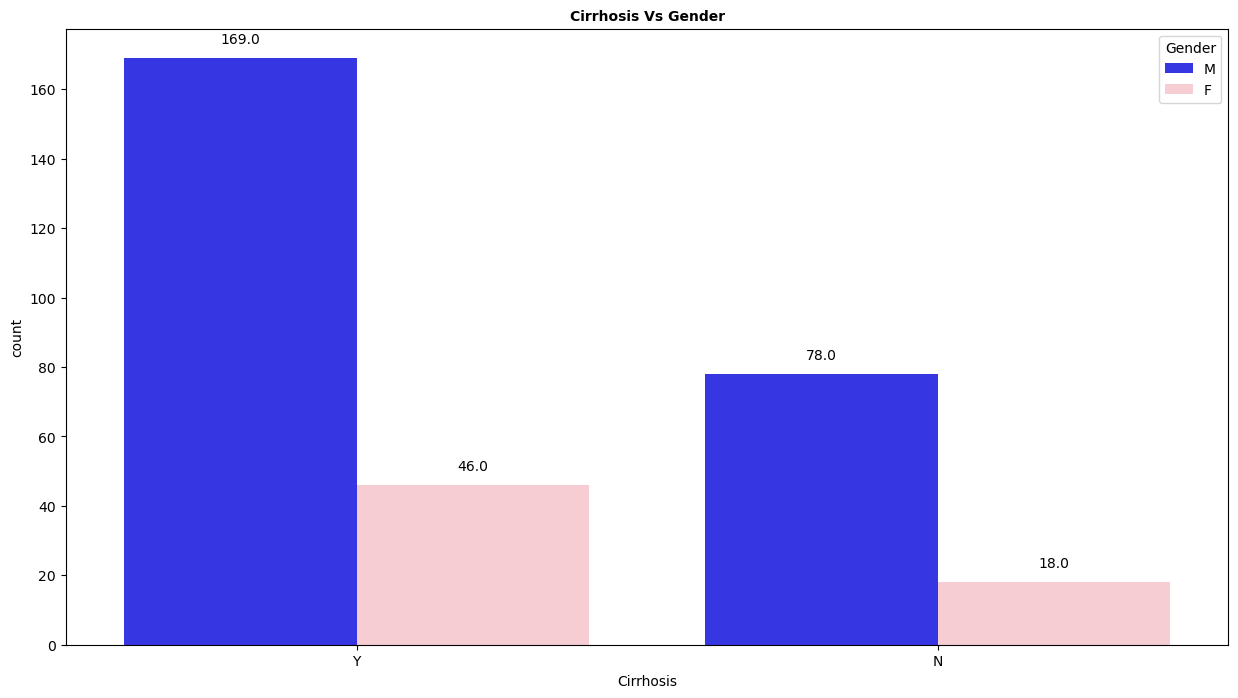

In [33]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Cirrhosis Vs Gender', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Cirrhosis', hue = 'Gender', data = data_covid, palette = ['blue', 'pink'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Liver cirrhosis is more common in men.

## Size

<AxesSubplot:xlabel='Size', ylabel='Density'>

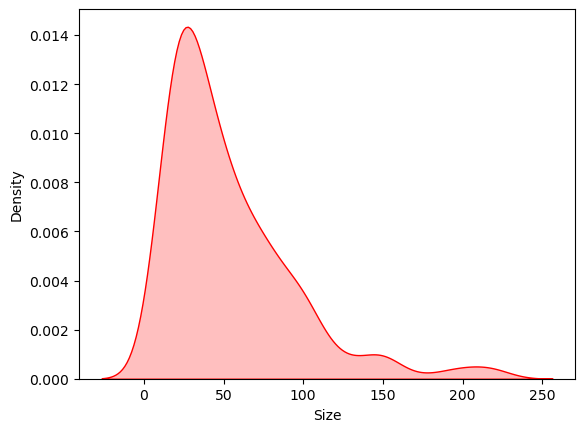

In [34]:
sns.kdeplot(data_covid['Size'], label = 'Size', fill = True, color = 'red')

    Tumor sizes ranging from 10 to 65 mm in diameter are more common. 

In [35]:
data_covid['Size'].max(), data_covid['Size'].min(), data_covid['Size'].mean()

(220.0, 10.0, 53.355)

Text(0.5, 0.98, 'Distribution of liver cancer by tumor size and age')

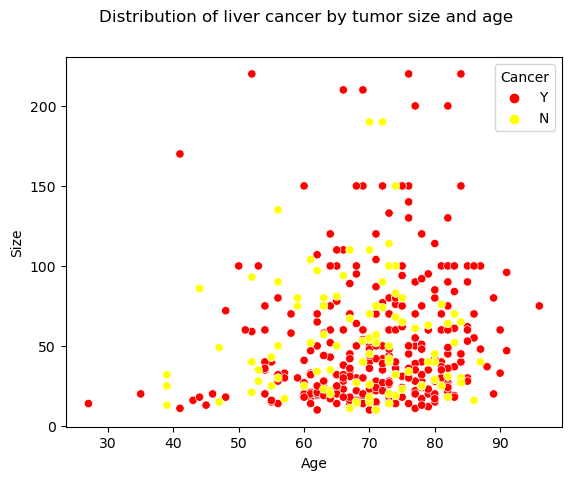

In [36]:
sns.scatterplot(x = data_covid['Age'], y = data_covid['Size'], hue = data_covid['Cancer'], palette = ['red', 'yellow'])
plt.suptitle('Distribution of liver cancer by tumor size and age')

    Liver cancer is more common between the ages of 60 and 85 with tumor sizes up to 50 mm. 

## HCC_TNM_Stage - Стадирование по системе TNM 

      1. T – первичная опухоль. 
            Т1 – одиночная опухоль.
            T1a – одиночная опухоль ≤2 см в наибольшем измерении с сосудистой инвазией или без нее.
            T1b – одиночная опухоль >2 см в наибольшем измерении без сосудистой инвазии.
            T2 – одиночная опухоль размером >2 см с сосудистой инвазией или множественныеопухоли ≤5 см 
     в наибольшем   измерении.
            T3 – множественные опухоли, в том числе хотя бы одна опухоль >5 см в наибольшем  измерении.
            T4 – одиночная опухоль или множественные опухоли любого размера с прорастанием в крупную ветвь воротной вены либо в печеночную вену, или с прорастанием в соседние органы, включая диафрагму (кроме желчного пузыря), или с прорастанием в висцеральную брюшину.
      2. N – вовлечение регионарных лимфатических узлов. Регионарными лимфатическими узлами являются лимфатические узлы ворот печени (расположенные в печеночнодвенадцатиперстной связке).
            NX – недостаточно данных для оценки состояния регионарных лимфатических узлов.
            N0 – нет признаков метастатического поражения регионарных лимфатических узлов.
            N1 – имеется поражение регионарных лимфатических узлов метастазами.
      3. M – отдаленные метастазы.
            МХ – недостаточно данных для определения отдаленных метастазов.
            M0 – отдаленных метастазов нет.
            M1 – имеются отдаленные метастазы.


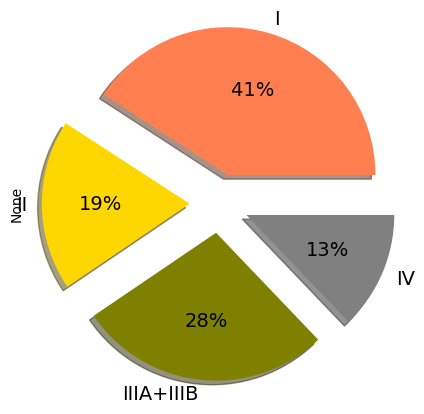

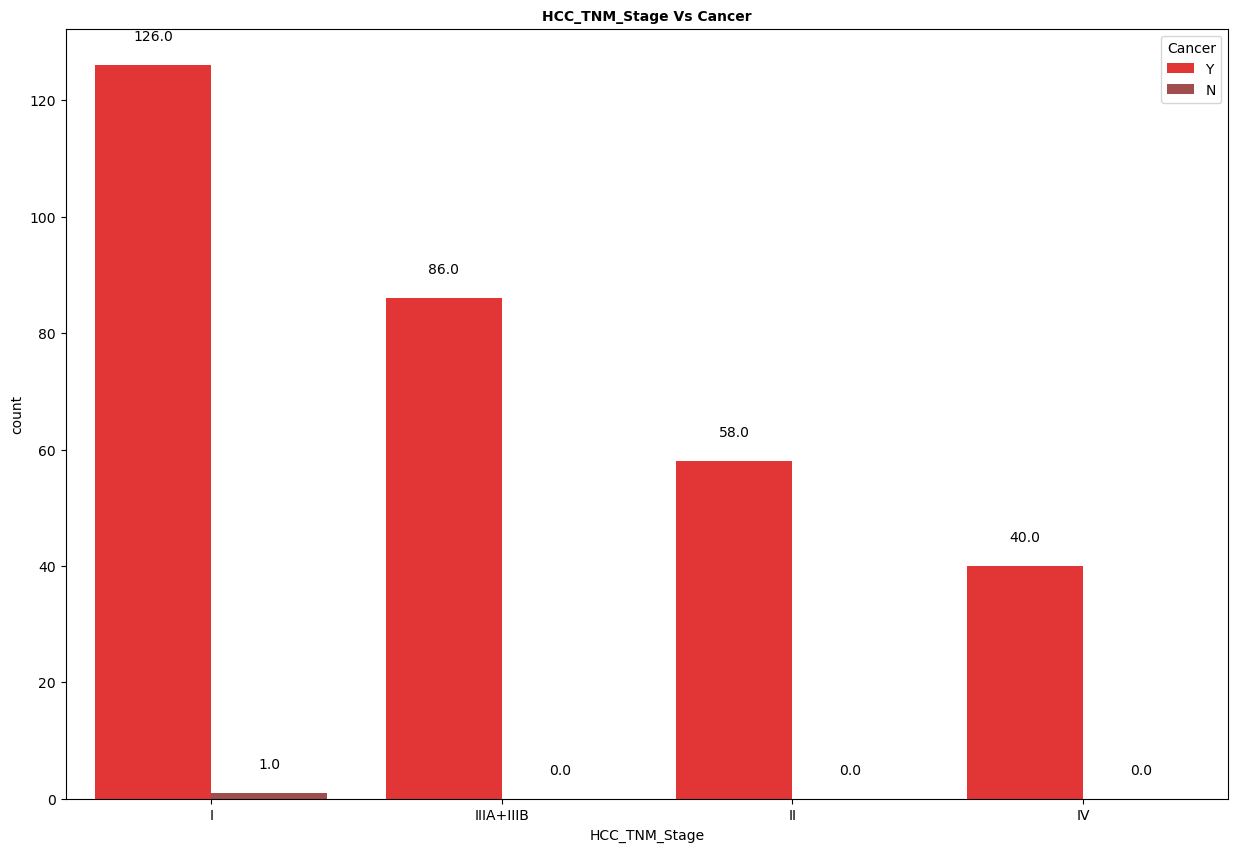

In [37]:
order = data_covid['HCC_TNM_Stage'].value_counts().index

data_covid.groupby('HCC_TNM_Stage').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.2, 0.2, 0.2, 0.2],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('HCC_TNM_Stage Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'HCC_TNM_Stage', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

     Liver cancer is detected in its early stages according to the TNM system.

## HCC_TNM_Stage Vs Year

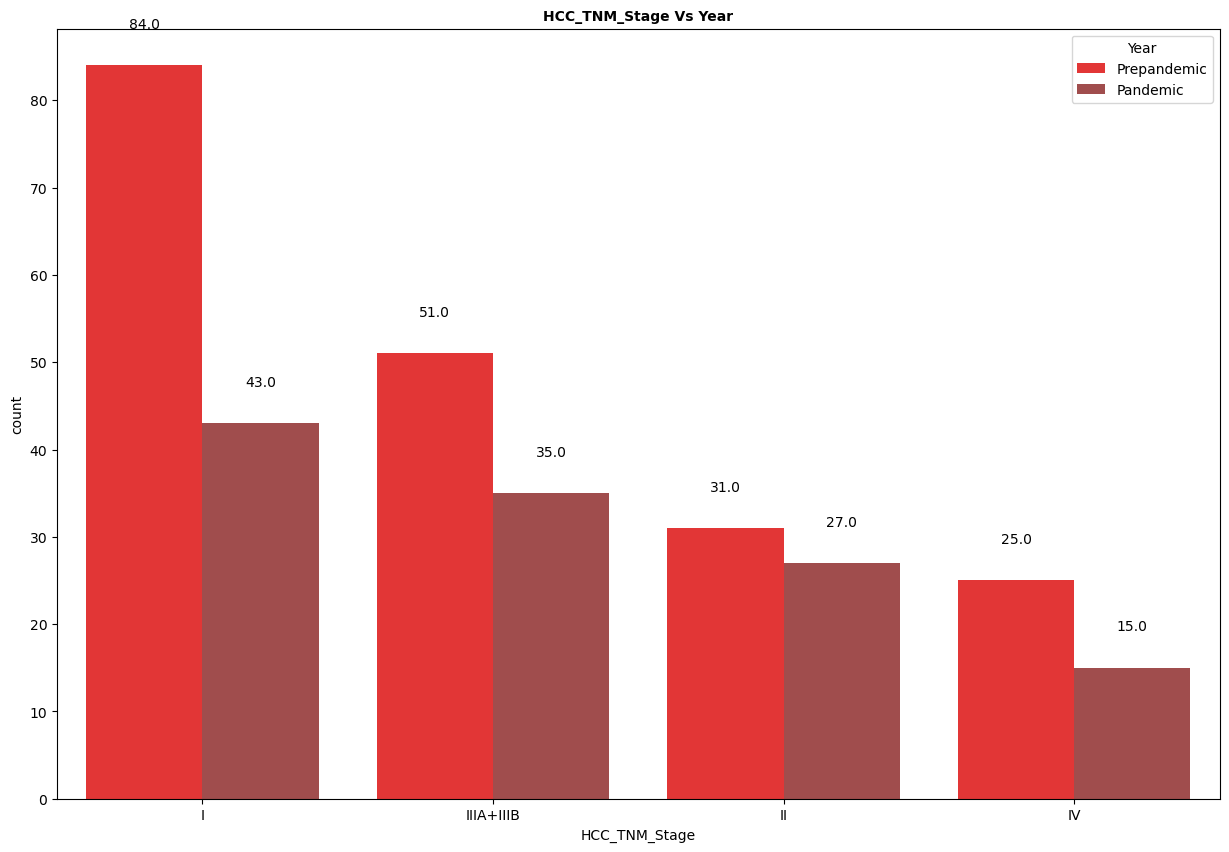

In [38]:
order = data_covid['HCC_TNM_Stage'].value_counts().index
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('HCC_TNM_Stage Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'HCC_TNM_Stage', hue = 'Year', data = data_covid, palette = ['red', 'brown'], order=order, alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    The detection of early stage liver cancer was higher before the pandemic than during the pandemic. 

## Distribution of HCC_TNM_Stage by age

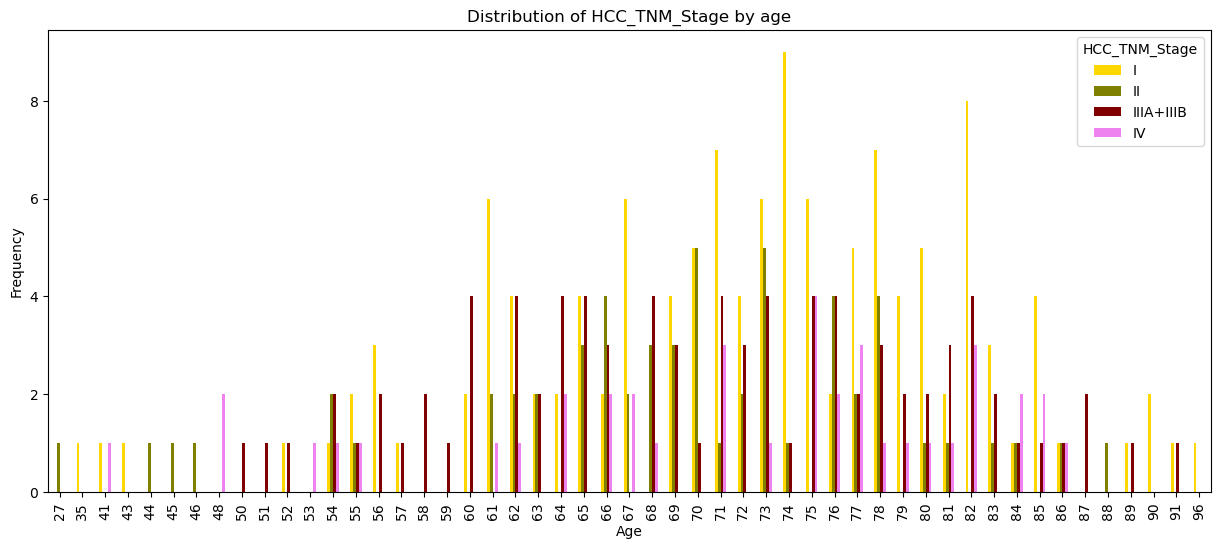

In [39]:
pd.crosstab(data_covid.Age, data_covid.HCC_TNM_Stage).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet'])
plt.title("Distribution of HCC_TNM_Stage by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. In this dataset, the TNM staging is dominated by the initial stage - stage I. 
    2. from 27 years to 88 years of age, stage II is observed.
    3. from 50 years to 91 years of age, stage IIIA-IIIB is diagnosed.
    4. from 41 years to 86 years of age stage IV is observed 

## HCC_BCLC_Stage - Барселонская система стадирования рака печени 

        1. Очень ранняя стадия (BCLC 0) – солитарная опухоль печени <2 см в диаметре.
        2. Ранняя стадия (BCLC A) – солитарная опухоль печени любого размера или не более 3 узлов размером до 3 см, не распространяющиеся на магистральные сосуды печени, соседние анатомические структуры, у пациента без опухолеспецифических жалоб в удовлетворительном объективном состоянии (ECOG 0) при сохранной функции печени.
        3. Промежуточная стадия (BCLC В) – случаи изолированного бессимптомного множественного опухолевого поражения печени без макрососудистой инвазии у пациентов в удовлетворительном состоянии (ECOG 0) при сохранной функции печени.
        4. Распространенная стадия (BCLC С) – симптомная опухоль, ухудшающая объективное состояние пациента (ECOG 0–2), любого размера с инвазией или без инвазии в магистральные печеночные сосуды и/или с внепеченочным распространением при сохранной функции печени.
        5. Терминальная стадия (BCLC D) – случаи заболевания со значимым ухудшением объективного состояния (опухоль/цирроз), декомпенсацией цирроза (класс C по Child – Pugh). Но при выявлении малой опухоли (солитарной размером <5 см или не более 3 узлов размером <3 см) при соответствии так называемым миланским критериям возможна ортотопическая трансплантация печени.


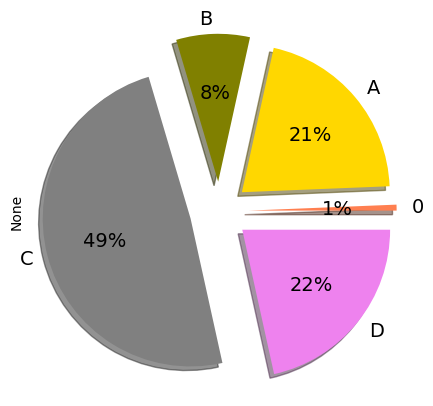

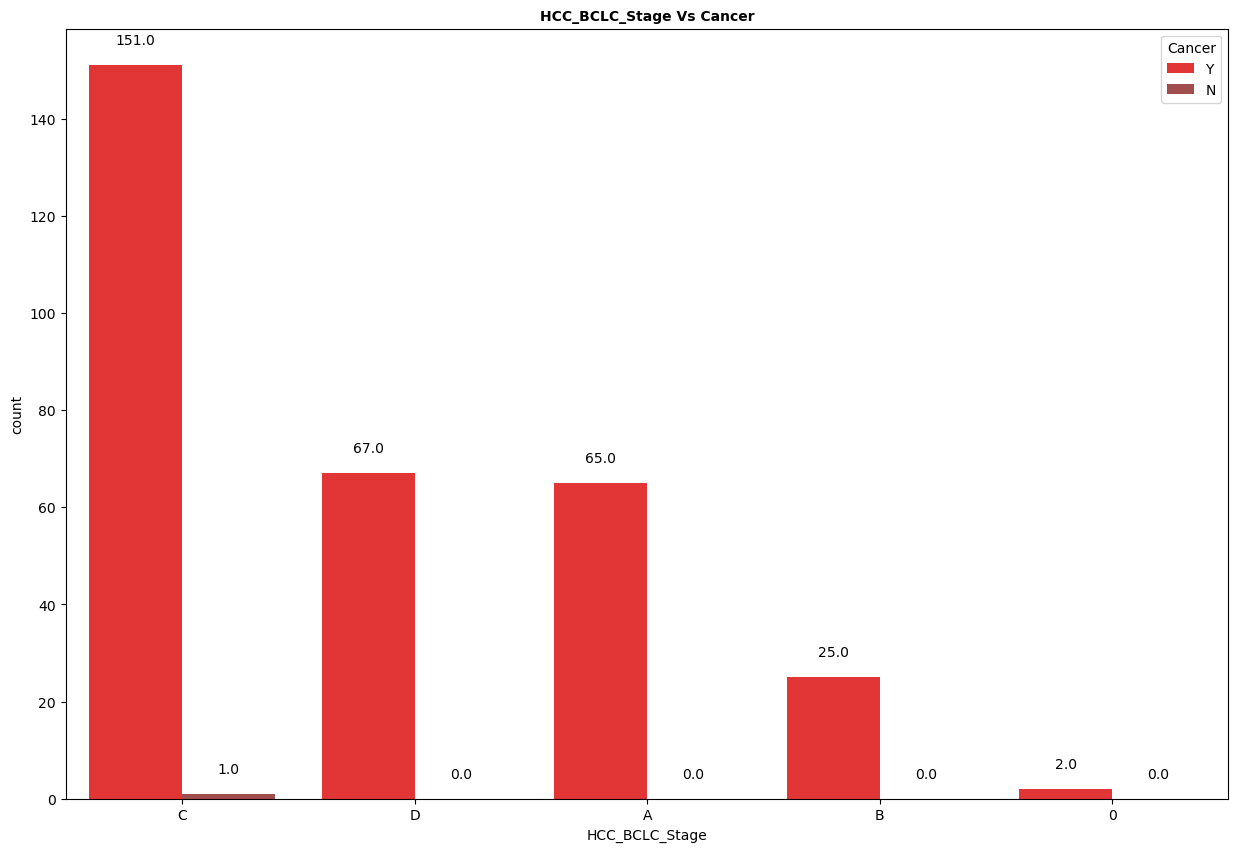

In [40]:
order = data_covid['HCC_BCLC_Stage'].value_counts().index

data_covid.groupby('HCC_BCLC_Stage').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.2, 0.2, 0.2, 0.2, 0.2],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey', 'violet'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('HCC_BCLC_Stage Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'HCC_BCLC_Stage', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

## HCC_BCLC_Stage Vs Year

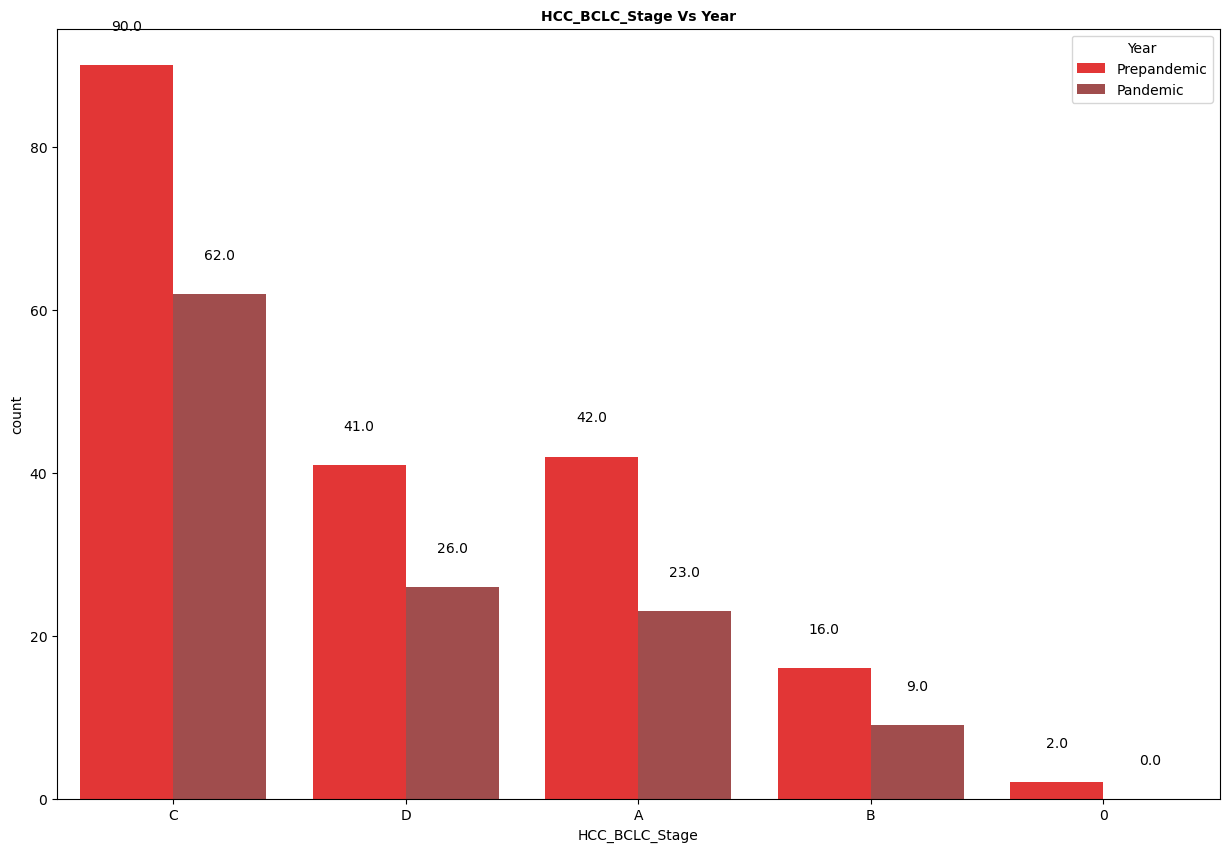

In [41]:
order = data_covid['HCC_BCLC_Stage'].value_counts().index

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('HCC_BCLC_Stage Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'HCC_BCLC_Stage', hue = 'Year', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

     According to the Barcelona staging system, liver cancer is more often detected at advanced stage C, i.e. there is a worsening of the patient's general condition. Tumor of any size with or without invasion of the hepatic trunk vessels and/or extrahepatic spread with preserved liver function. This was the case before and during the pandemic.

## Distribution of HCC_BCLC_Stage by age

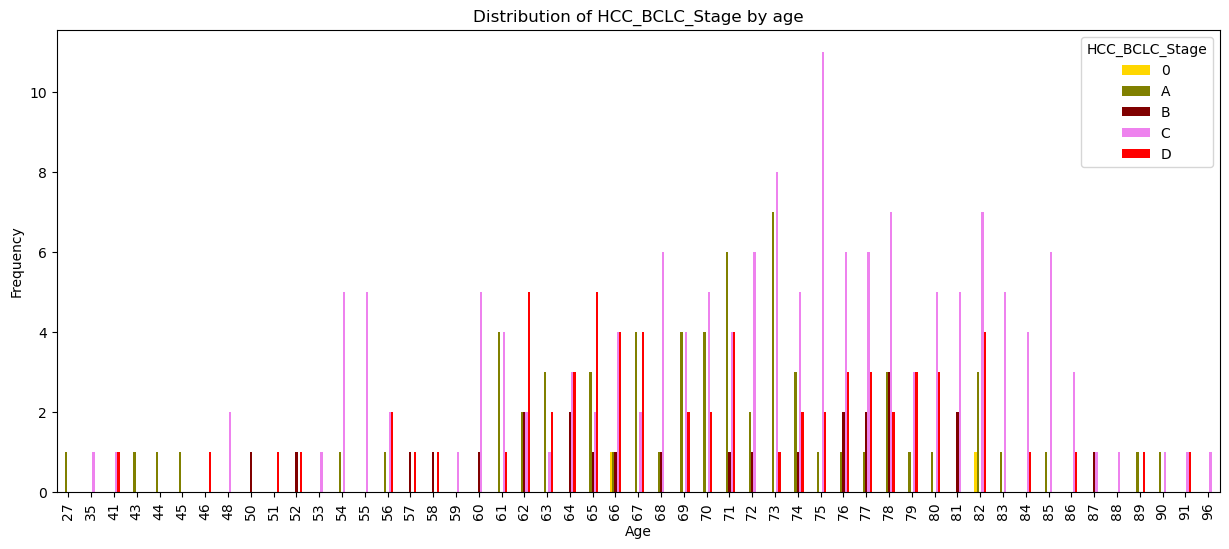

In [42]:
pd.crosstab(data_covid.Age, data_covid.HCC_BCLC_Stage).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet', 'red'])
plt.title("Distribution of HCC_BCLC_Stage by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. According to the Barcelona classification system for liver cancer, advanced stage (BCLC C) predominates, from 35 years to 96 years of age. 
    2. from 41 years to 91 years of age, terminal stage (BCLC D) is diagnosed. 
    3. from 50 years of age to 87 years of age, intermediate stage (BCLC B) 
    4. from 27 to 90 years of age the early stage is observed (BCLC A) 
    5. at 66, 82 years of age, very early stage 0 is observed. 

## ICC_TNM_Stage -  Внутрипеченочная холангиокарцинома. Стадия метастазирования опухолевого узла («I», «II», «III», «IV»)

Рак желчных протоков (холангиокарцинома) – злокачественная опухоль,
происходящая из эпителия желчных протоков.
IV стадия - отдаленные метастазы:  наличие множественных метастазов в печень и в другие органы.


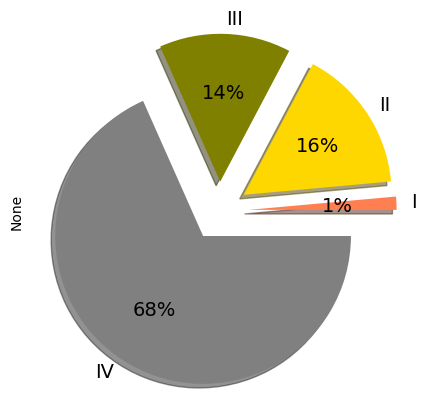

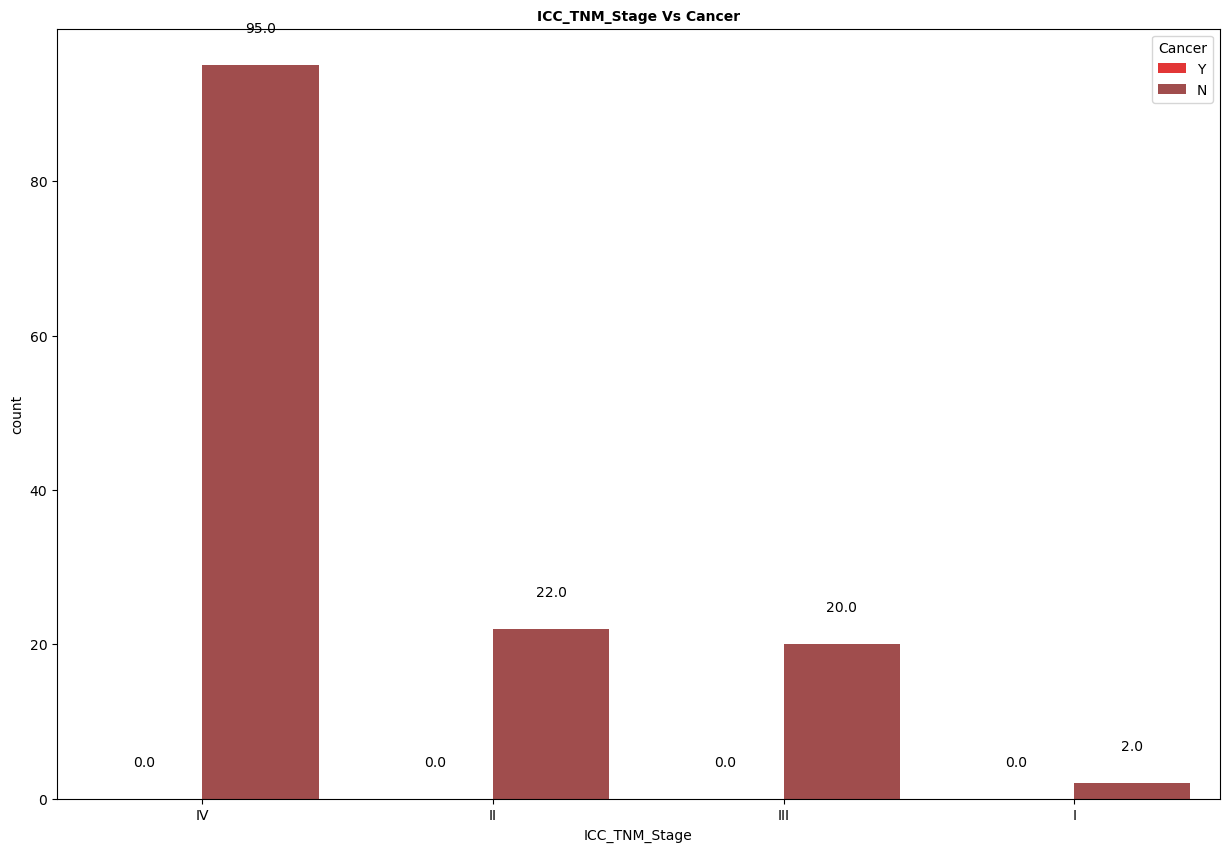

In [43]:
order = data_covid['ICC_TNM_Stage'].value_counts().index

data_covid.groupby('ICC_TNM_Stage').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.2, 0.2, 0.2, 0.2],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('ICC_TNM_Stage Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'ICC_TNM_Stage', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1.  In this case, intrahepatic cholangiocarcinoma is considered as primary independent disease and liver cancer as distant metastasis and therefore in relation to the variable "Cancer" - it is not identified.   
    2. Intrahepatic cholangiocarcinoma predominates in stage IV - 68%, i.e. there are distant metastases, stage III - 14%, stage II - 16%, stage I - 1%. 

## Distribution of ICC_TNM_Stage by age

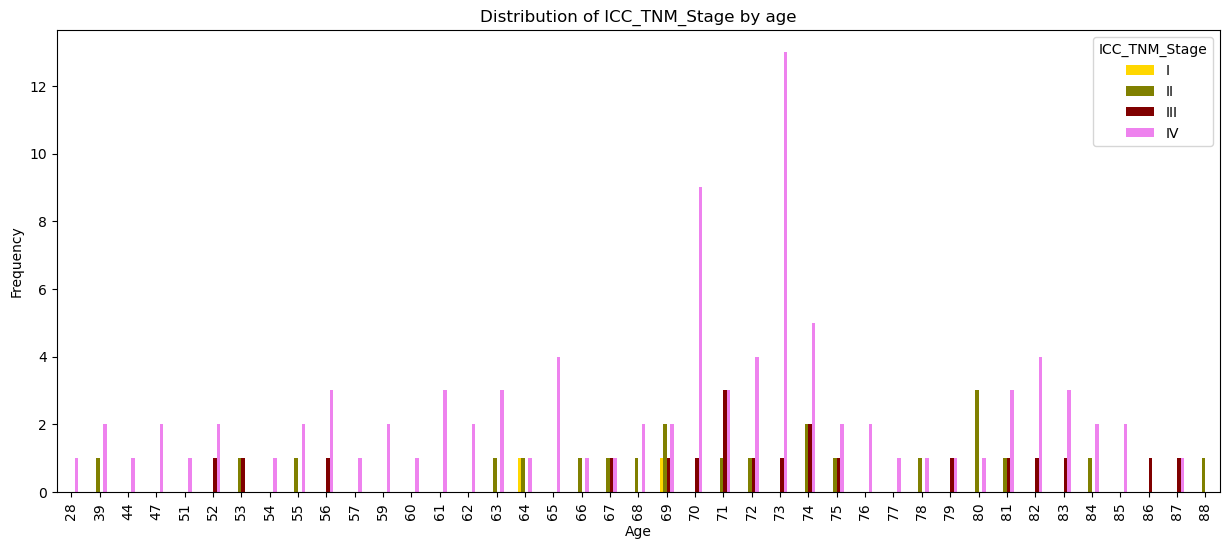

In [44]:
pd.crosstab(data_covid.Age, data_covid.ICC_TNM_Stage).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet', 'red'])
plt.title("Distribution of ICC_TNM_Stage by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. From 28 to 87 years of age, patients have intrahepatic cholangiocarcinoma - stage IV.
    2. 52 to 87 years of age = stage III. 
    3. From 39 to 88 years of age = stage II.
    4. at 64, 69 years of age diagnosed - Stage I. 

## ICC_TNM_Stage Vs Year'

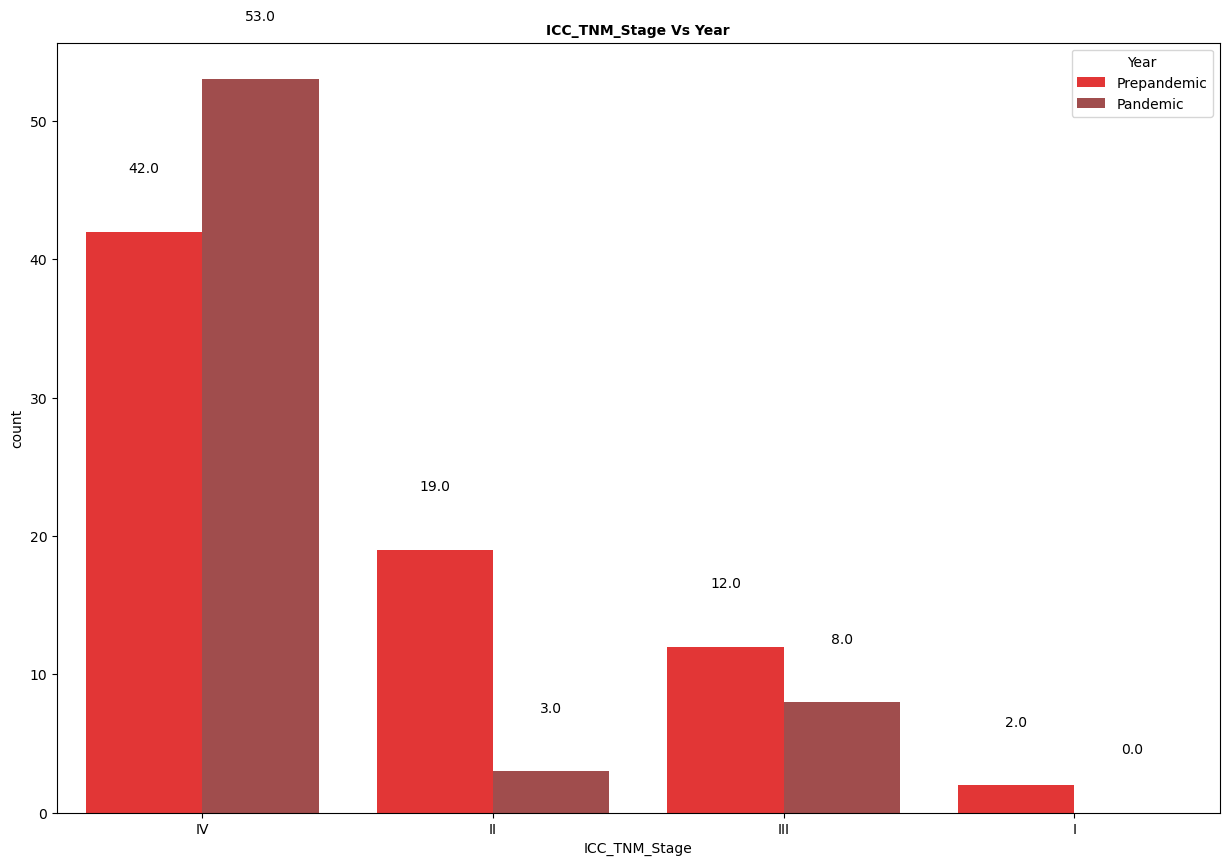

In [45]:
order = data_covid['ICC_TNM_Stage'].value_counts().index

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('ICC_TNM_Stage Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'ICC_TNM_Stage', hue = 'Year', data = data_covid, palette = ['red', 'brown'], order=order,   alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

In [46]:
year_TNM = pd.crosstab(data_covid['ICC_TNM_Stage'], data_covid['Year'])
year_TNM

Year           Pandemic  Prepandemic
ICC_TNM_Stage                       
I                     0            2
II                    3           19
III                   8           12
IV                   53           42

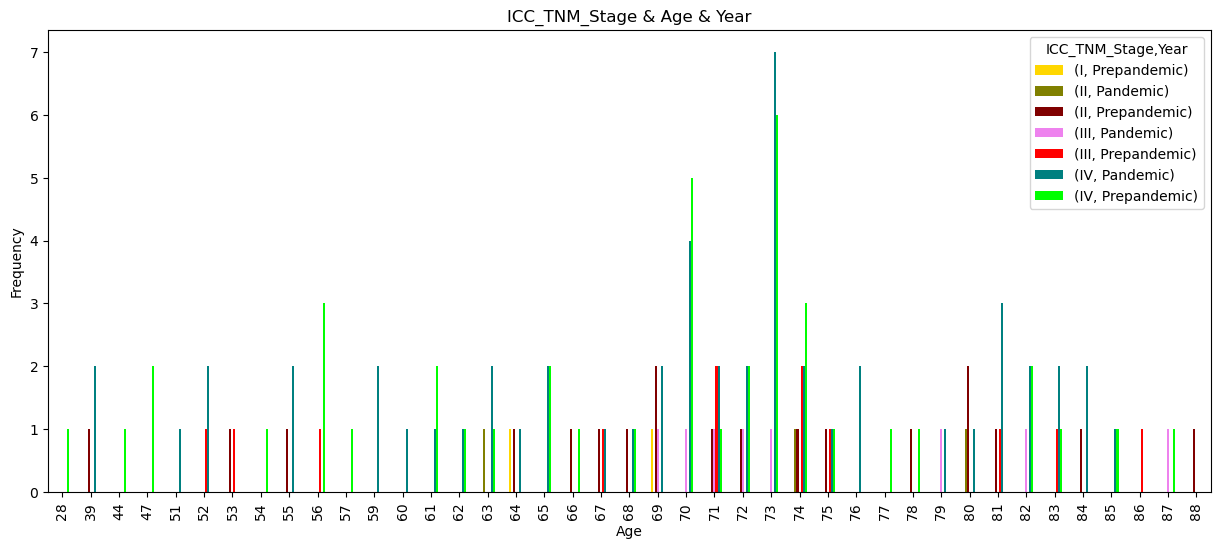

In [47]:
pd.crosstab(data_covid.Age,[data_covid.ICC_TNM_Stage, data_covid.Year]).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet', 'red', 'teal', 'lime'])
plt.title("ICC_TNM_Stage & Age & Year")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. Intrahepatic cholangiocarcinoma diagnosed during the pandemic. 
    2. at age 28, diagnosed before the pandemic.  

## PS - Performance Status. ECOG.

0 - Пациент полностью активен, способен выполнять все, как и до заболевания (90 - 100% по шкале Карновского)

1 - Пациент неспособен выполнять тяжелую, но может выполнять легкую или сидячую работу (например, легкую домашнюю или канцелярскую работу, 70 - 80% по шкале Карновского)

2 - Пациент лечится амбулаторно, способен к самообслуживанию, но не может выполнять работу. Более 50% времени бодрствования проводит активно - в вертикальном положении (50 - 60% по шкале Карновского)

3 - Пациент способен лишь к ограниченному самообслуживанию, проводит в кресле или постели более 50% времени бодрствования (30 - 40% по шкале Карновского)

4 - Инвалид, совершенно не способен к самообслуживанию, прикован к креслу или постели (10 - 20% по шкале Карновского)

5 - Смерть

In [48]:
data_covid.PS.unique()

array([ 0.,  2.,  1.,  3.,  4., nan])

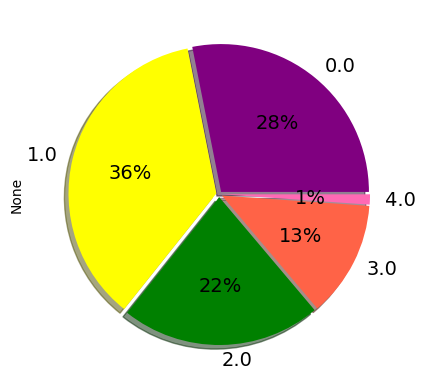

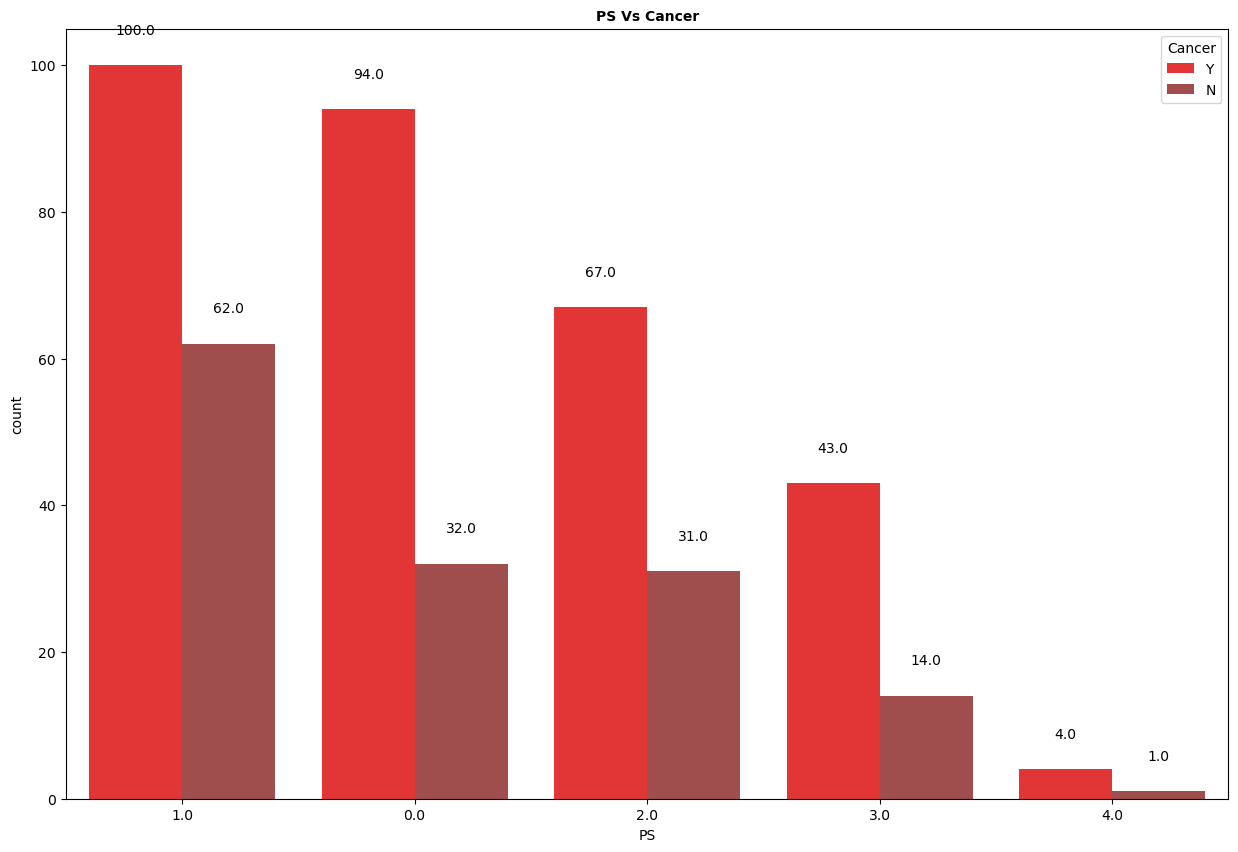

In [49]:

data_covid.groupby('PS').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02, 0.02, 0.02, 0.02],shadow=True,
                                           colors =['purple', 'yellow', 'green', 'tomato', 'hotpink'])

order = data_covid['PS'].value_counts().index
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('PS Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'PS', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order=order,   alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. In this case ECOG 1 status prevails, cancer patients are unable to do heavy work but can do light or sedentary work and ECOG 0 - when the patient is fully active, able to do everything as before the disease. 

## PS & Age

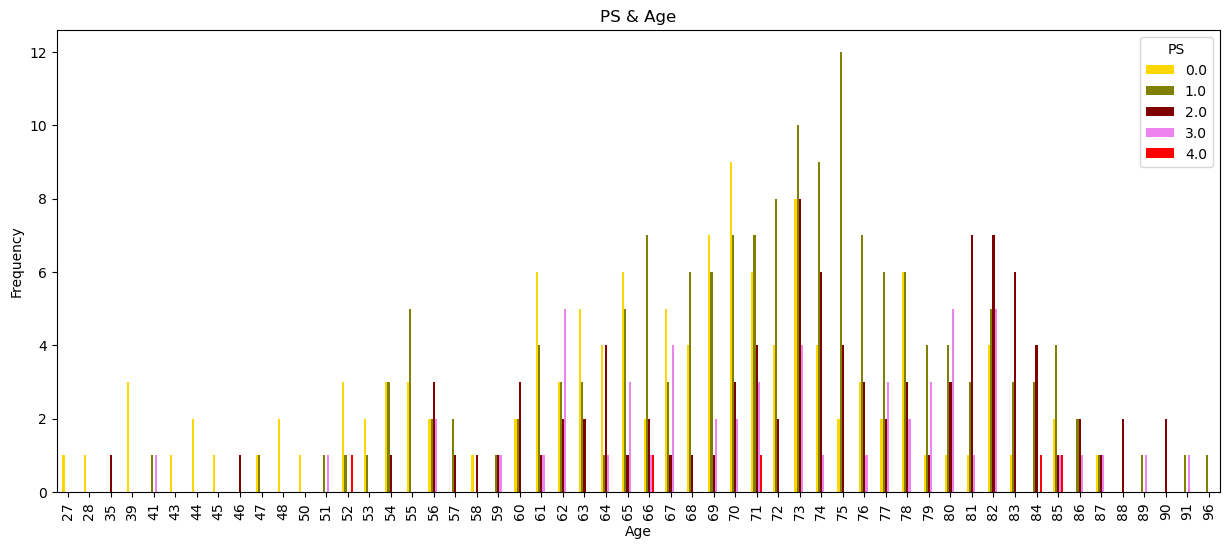

In [50]:
pd.crosstab(data_covid.Age, data_covid.PS).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet', 'red'])
plt.title("PS & Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

     1. from 27 to 87 years of age patients' general condition according to ECOG 0 
     2. from 41 to 96 years of age - ECOG 1. 
     3. at 52, 65, 71, 84, 85 years of age patients' condition is estimated as ECOG 4. 

## Alive Dead: "Alive", "Dead"

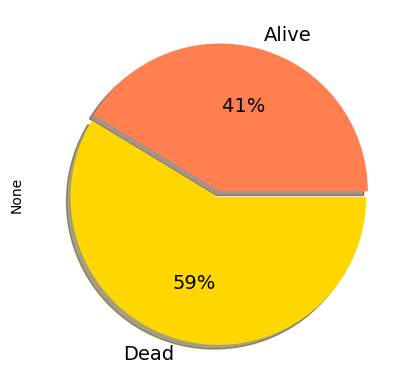

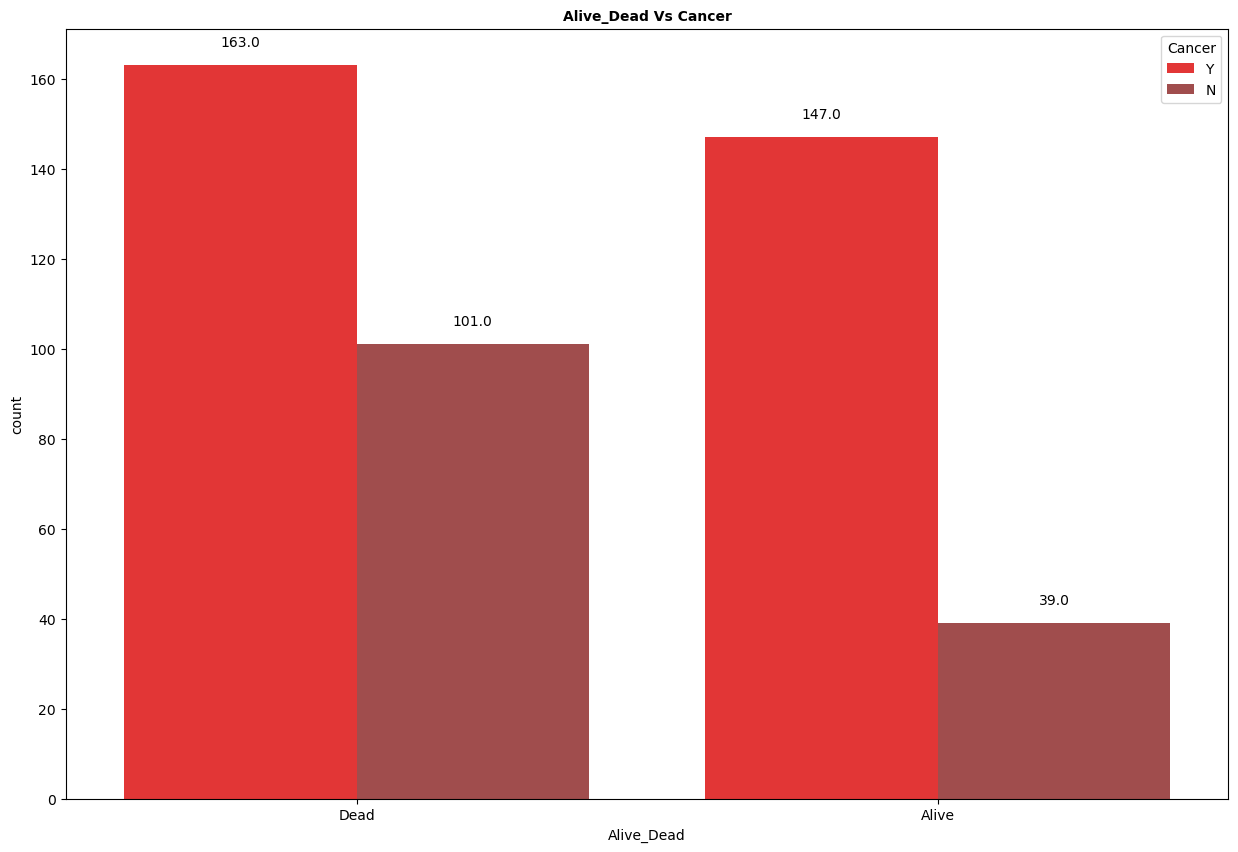

In [51]:
order = data_covid['Alive_Dead'].value_counts().index

data_covid.groupby('Alive_Dead').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Alive_Dead Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Alive_Dead', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    59% died of liver cancer. 

## Alive_Dead Vs Year

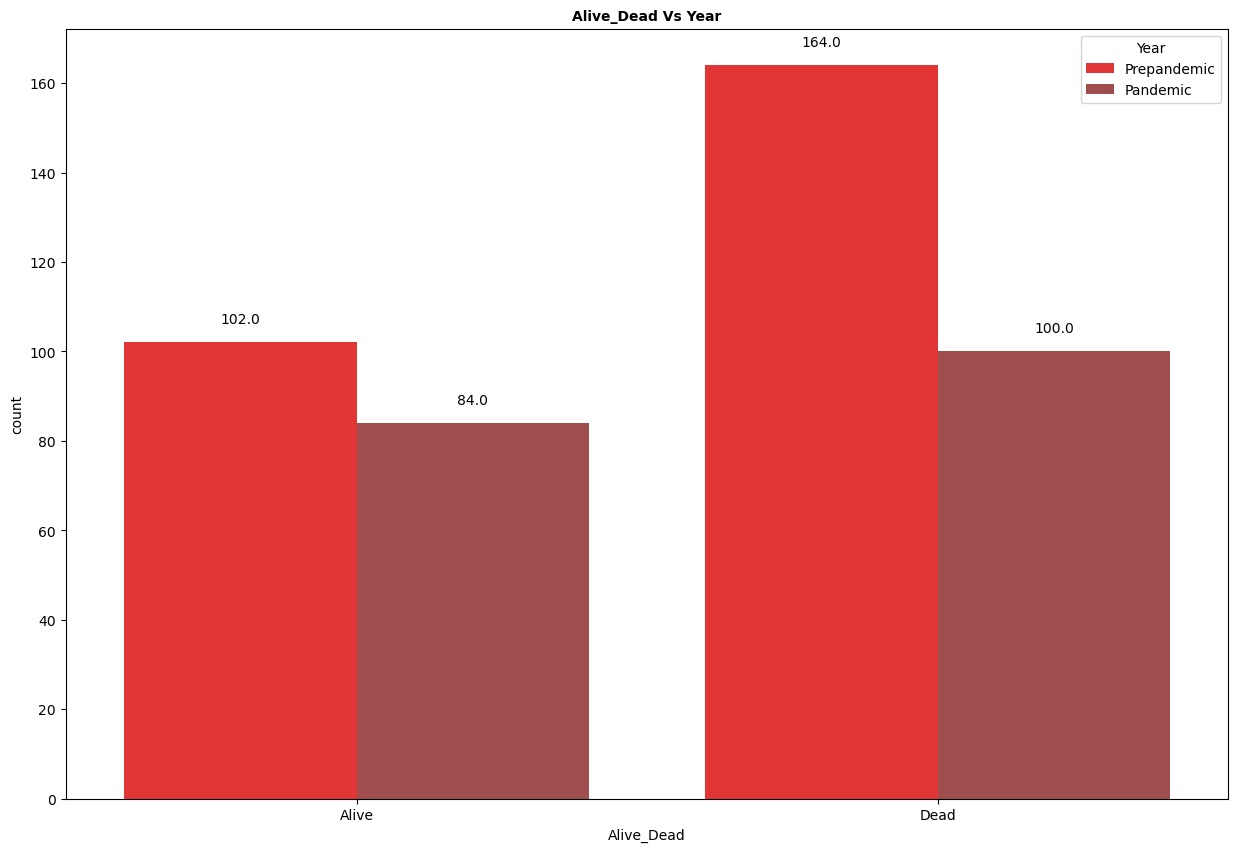

In [52]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Alive_Dead Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Alive_Dead', hue = 'Year', data = data_covid, palette = ['red', 'brown'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

In [53]:
year_AD = pd.crosstab(data_covid['Alive_Dead'], data_covid['Year'])
year_AD

Year        Pandemic  Prepandemic
Alive_Dead                       
Alive             84          102
Dead             100          164

    most patients died of liver cancer before the pandemic

In [54]:
TNM_AD = pd.crosstab(data_covid['Alive_Dead'], data_covid['HCC_TNM_Stage'])
TNM_AD

HCC_TNM_Stage   I  II  IIIA+IIIB  IV
Alive_Dead                          
Alive          88  32         20   8
Dead           39  26         66  32

In [55]:
HCC_AD = pd.crosstab(data_covid['Alive_Dead'], data_covid['HCC_BCLC_Stage'])
HCC_AD

HCC_BCLC_Stage  0   A   B   C   D
Alive_Dead                       
Alive           2  54  14  66  12
Dead            0  11  11  86  55

In [56]:
ICC_AD = pd.crosstab(data_covid['Alive_Dead'], data_covid['ICC_TNM_Stage'])
ICC_AD

ICC_TNM_Stage  I  II  III  IV
Alive_Dead                   
Alive          1  11    4  23
Dead           1  11   16  72

    We see that the higher the stage of the disease, the greater the risk of death.

## Distribution of Alive_Dead by age

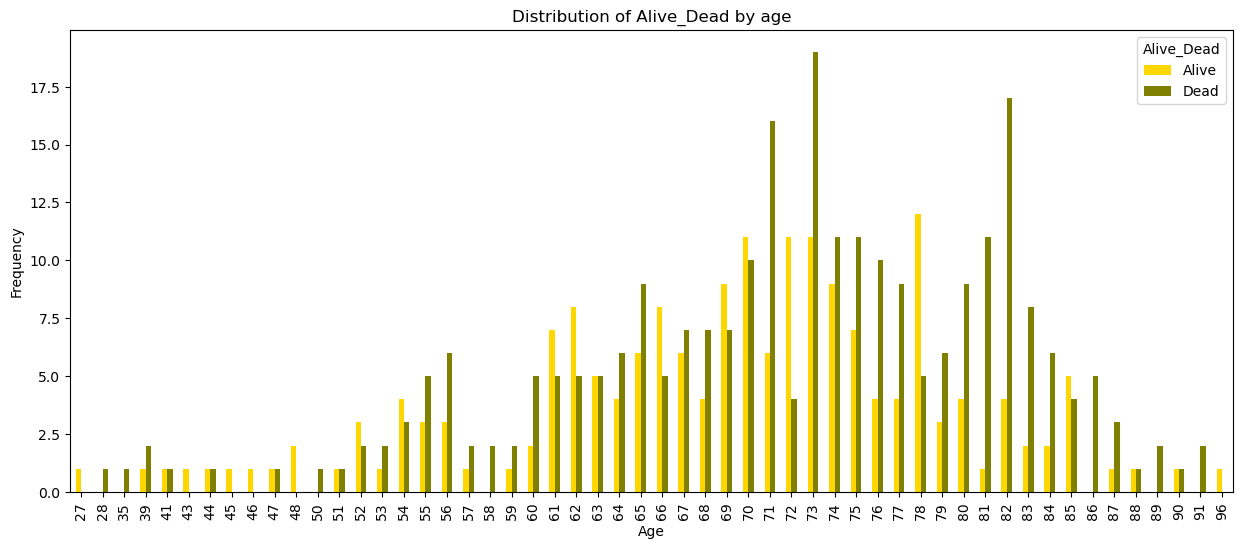

In [57]:
pd.crosstab(data_covid.Age, data_covid.Alive_Dead).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive'])
plt.title("Distribution of Alive_Dead by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Most patients diagnosed with liver cancer and intrahepatic cholangiocarcinoma died.  

## Alive_Dead & Age & Year

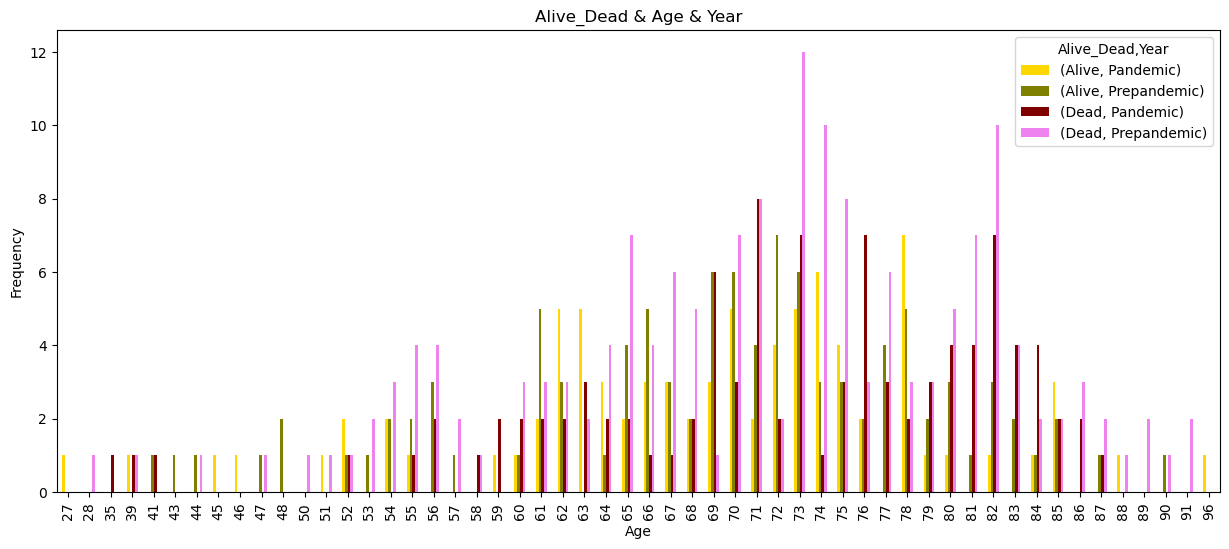

In [58]:
pd.crosstab(data_covid.Age,[data_covid.Alive_Dead, data_covid.Year]).plot(kind="bar",figsize=(15,6), color = [ 'gold', 'olive', 'maroon', 'violet'])
plt.title("Alive_Dead & Age & Year")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Most patients, regardless of age, died before the pandemic. 

## Type of incidental finding: ("Primary care-routine", "Secondary care-routine", "Primary care-acute", "Secondary care-acute")

C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


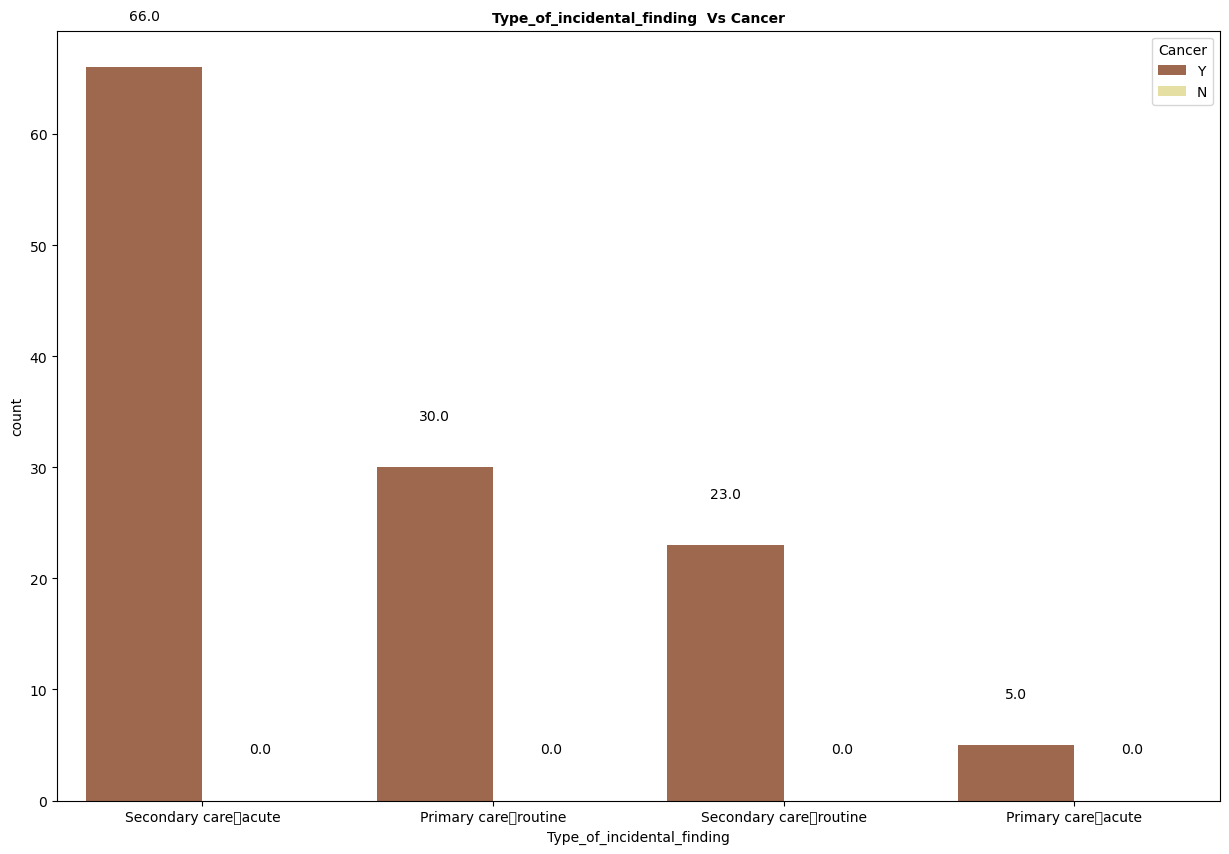

In [59]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Type_of_incidental_finding  Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Type_of_incidental_finding', hue = 'Cancer', data = data_covid, palette = ['sienna', 'khaki'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    liver cancer is more likely to be detected in a secondary care-acute setting.

## Type_of_incidental_finding​ Vs Year

C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


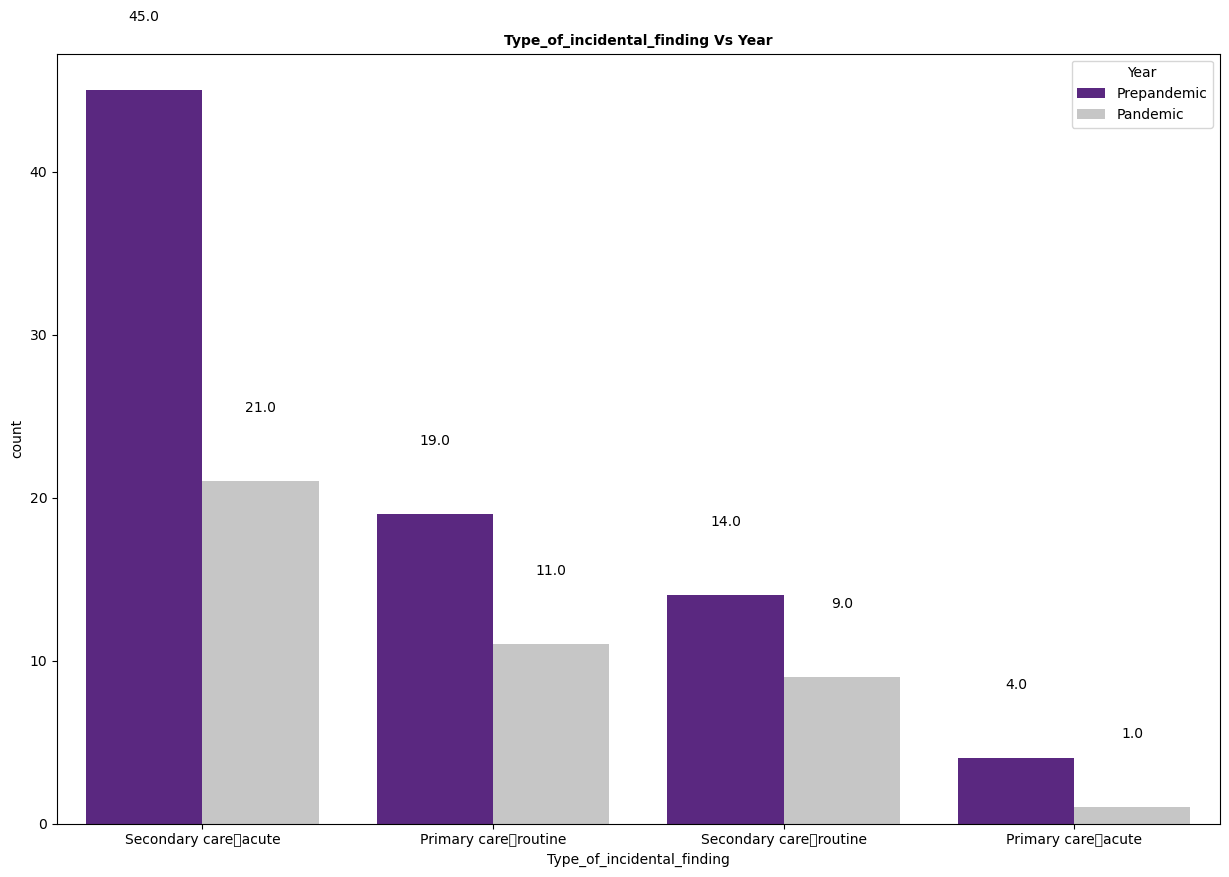

In [60]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Type_of_incidental_finding​ Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Type_of_incidental_finding', hue = 'Year', data = data_covid, palette = ['indigo', 'silver'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. Frequent detection of liver cancer was observed before the pandemic, while rates decreased during the pandemic. This suggests that all specialized hospitals were closed during the pandemic. 

## Treatment grps: 
1. First-line treatment received "OLTx" (orthotopic liver transplantation), 
2. Resection - резекция печени. 
3. Ablation  - введении в ткань новообразования электродов и воздействие на него радиочастотными колебаниями, которые вызывают значительное местное повышение температуры. В результате патологические клетки разрушаются, а здоровые ткани организма не повреждаются. , 
4. TACE - transarterial chemoembolisation/
5. SIRT- selective internal radiation therapy, 
6. Medical 
7. Supportive care - поддерживающая терапия 

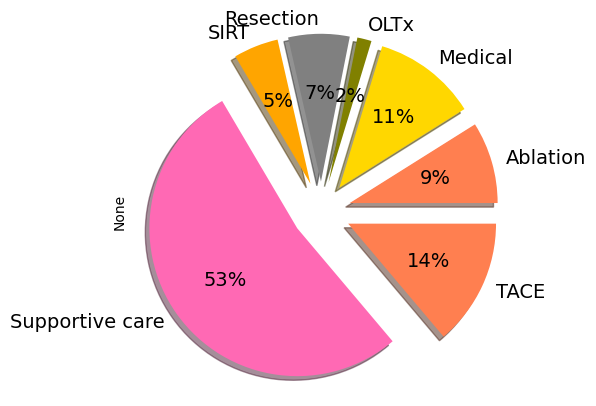

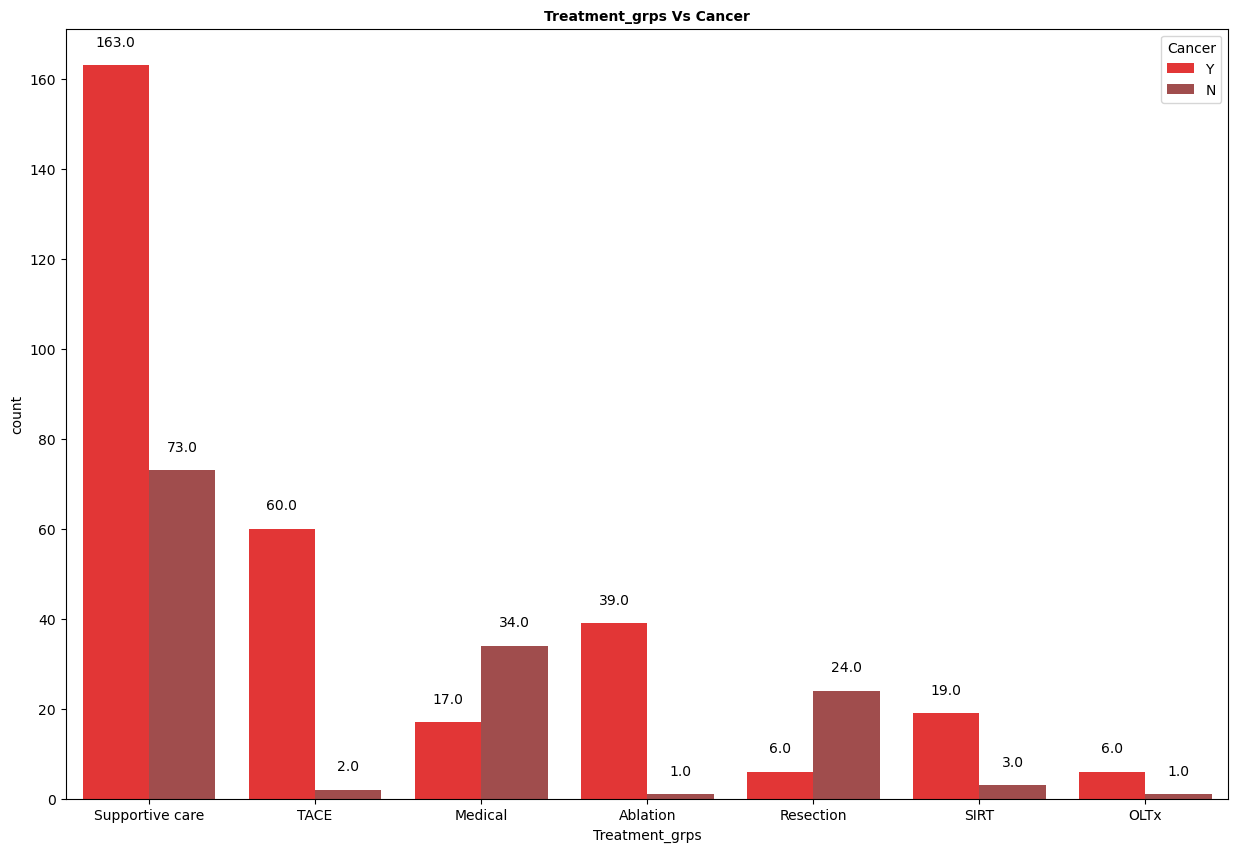

In [61]:
order = data_covid['Treatment_grps'].value_counts().index

data_covid.groupby('Treatment_grps').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],shadow=True,
                                           colors =['coral', 'gold', 'olive', 'grey', 'orange', 'hotpink'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Treatment_grps Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Treatment_grps', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    53% of liver cancer patients receive supportive care 

In [62]:
cancer_Tg = pd.crosstab(data_covid['Treatment_grps'], data_covid['Cancer'])
cancer_Tg

Cancer            N    Y
Treatment_grps          
Ablation          1   39
Medical          34   17
OLTx              1    6
Resection        24    6
SIRT              3   19
Supportive care  73  163
TACE              2   60

## Distribution of Treatment_grps by age

<AxesSubplot:xlabel='Age', ylabel='count'>

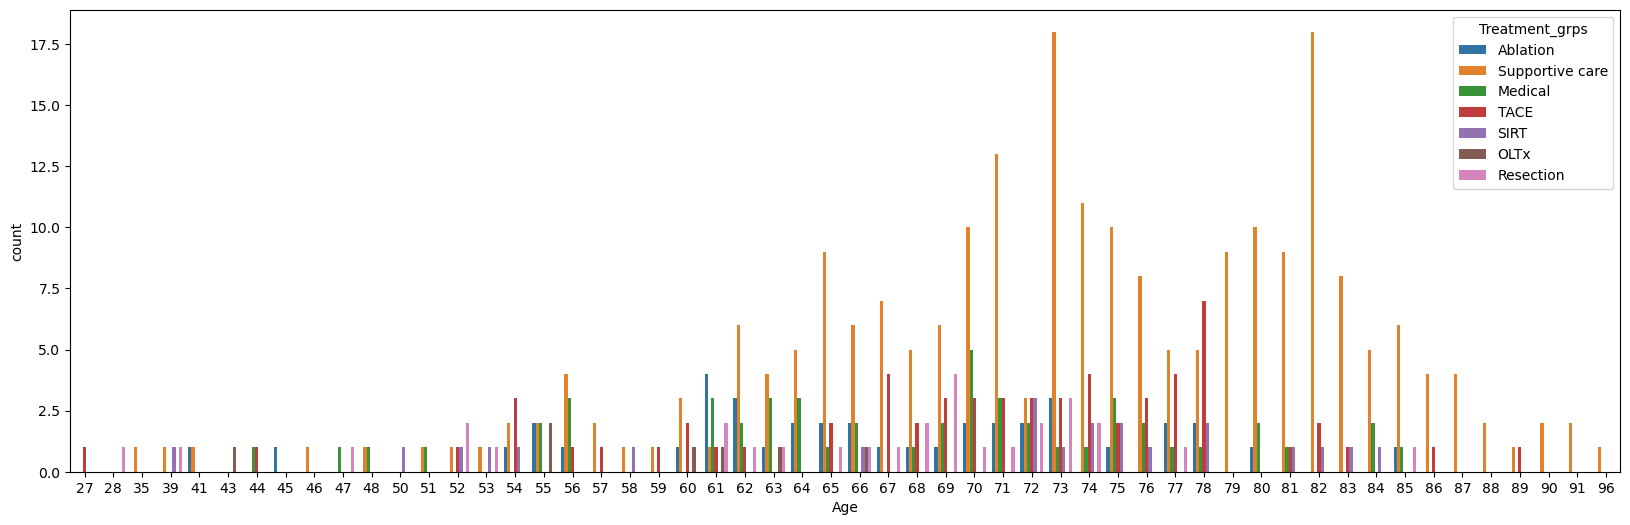

In [63]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'Age', hue = 'Treatment_grps', data = data_covid)

    1. most patients received supportive care. 
    2. TACE - transarterial chemoembolization was performed at 27 years of age
    3. at the age of 28, surgical treatment was performed for intrahepatic cholangiocarcinoma. 

## Treatment_grps Vs Year

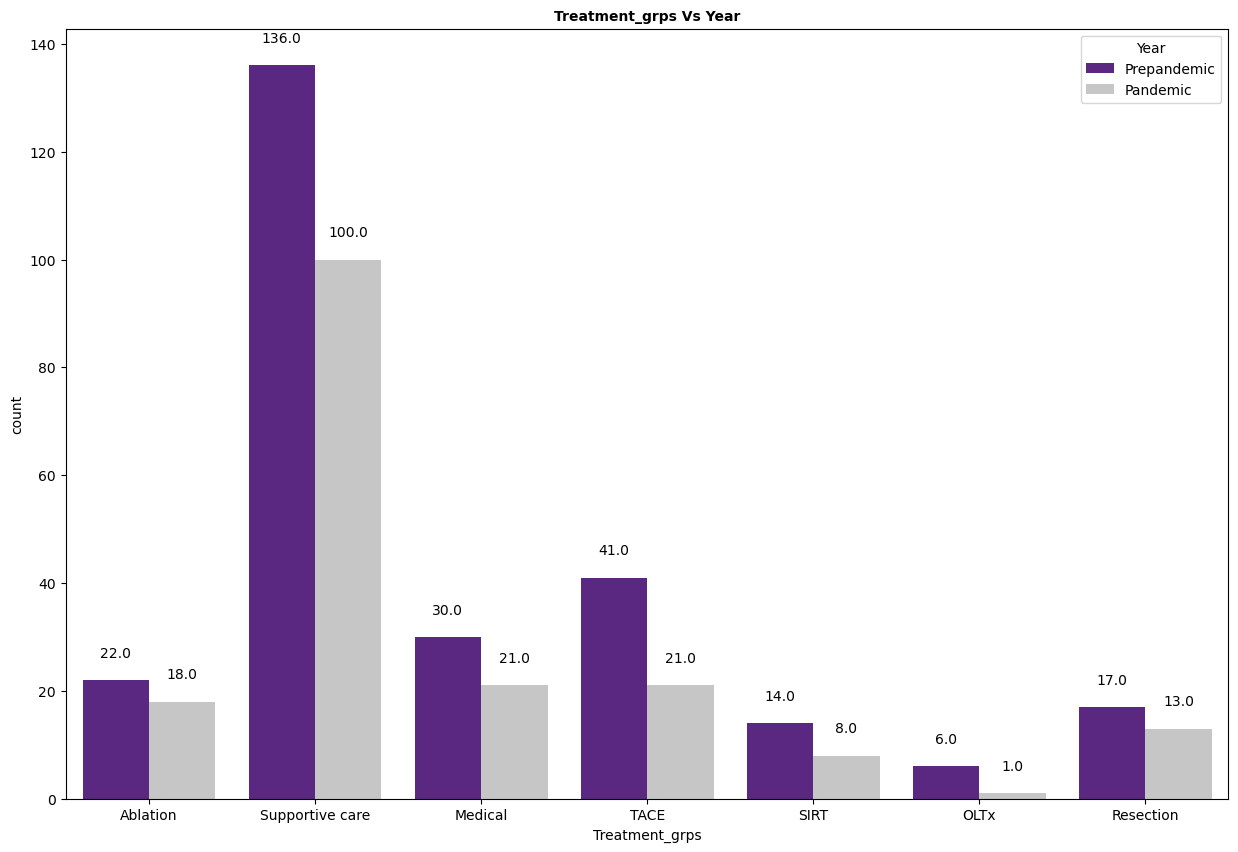

In [64]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Treatment_grps Vs Year', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Treatment_grps', hue = 'Year', data = data_covid, palette = ['indigo', 'silver'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    supportive care  is relevant before and during the pandemic. 

## Treatment_grps Vs HCC_TNM_Stage

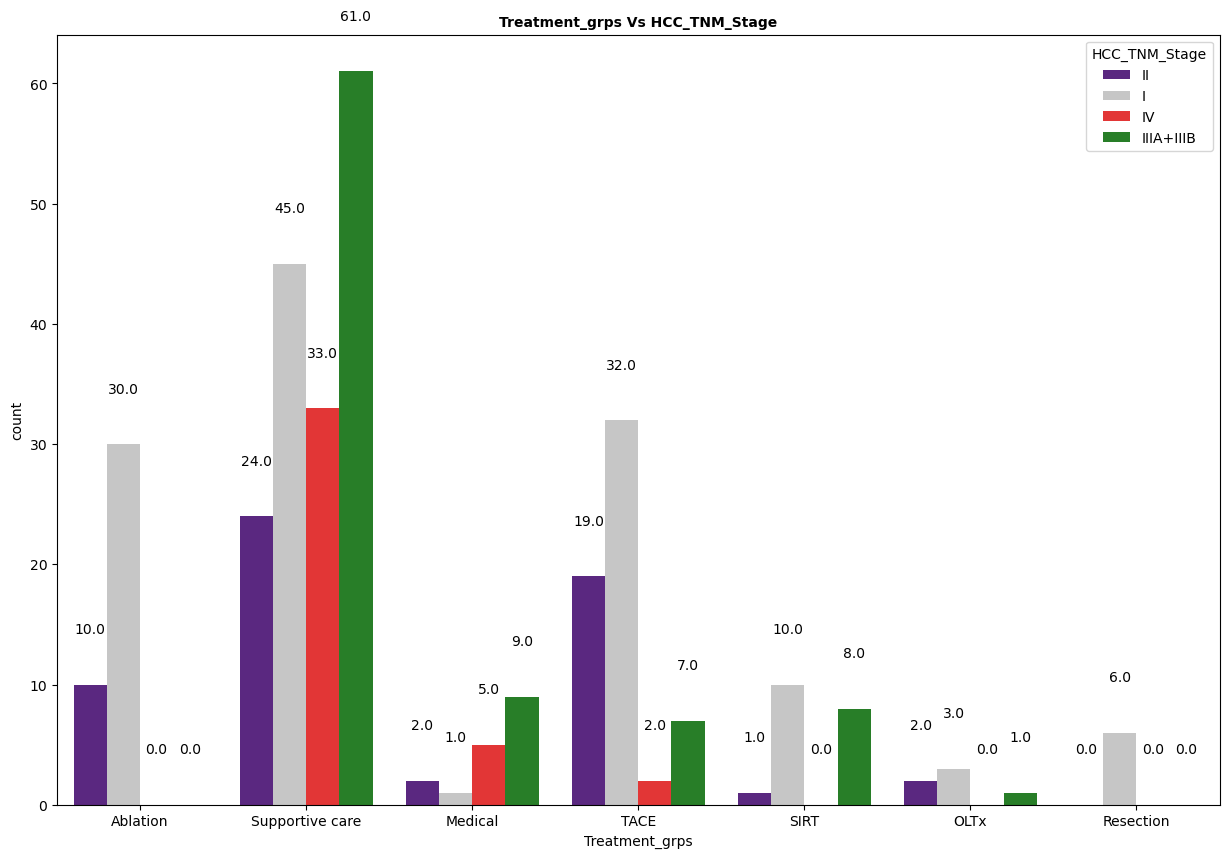

In [65]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Treatment_grps Vs HCC_TNM_Stage', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Treatment_grps', hue = 'HCC_TNM_Stage', data = data_covid, palette = ['indigo', 'silver', 'red', 'green'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

In [66]:
TNM_Tg = pd.crosstab(data_covid['Treatment_grps'], data_covid['HCC_TNM_Stage'])
TNM_Tg

HCC_TNM_Stage     I  II  IIIA+IIIB  IV
Treatment_grps                        
Ablation         30  10          0   0
Medical           1   2          9   5
OLTx              3   2          1   0
Resection         6   0          0   0
SIRT             10   1          8   0
Supportive care  45  24         61  33
TACE             32  19          7   2

    According to TNM classification: 
    1. supportive care was prescribed for all stages of liver cancer.
    2. Surgical treatment (liver resection) was performed at stage I.
    3. Liver transplantation was performed for stages I, II, III.
    4. At stage IV supportive care, medical, TACE are recommended.
    5. Ablation is done only in the initial stages of liver cancer - I, II

## Treatment_grps Vs HCC_BCLC_Stage

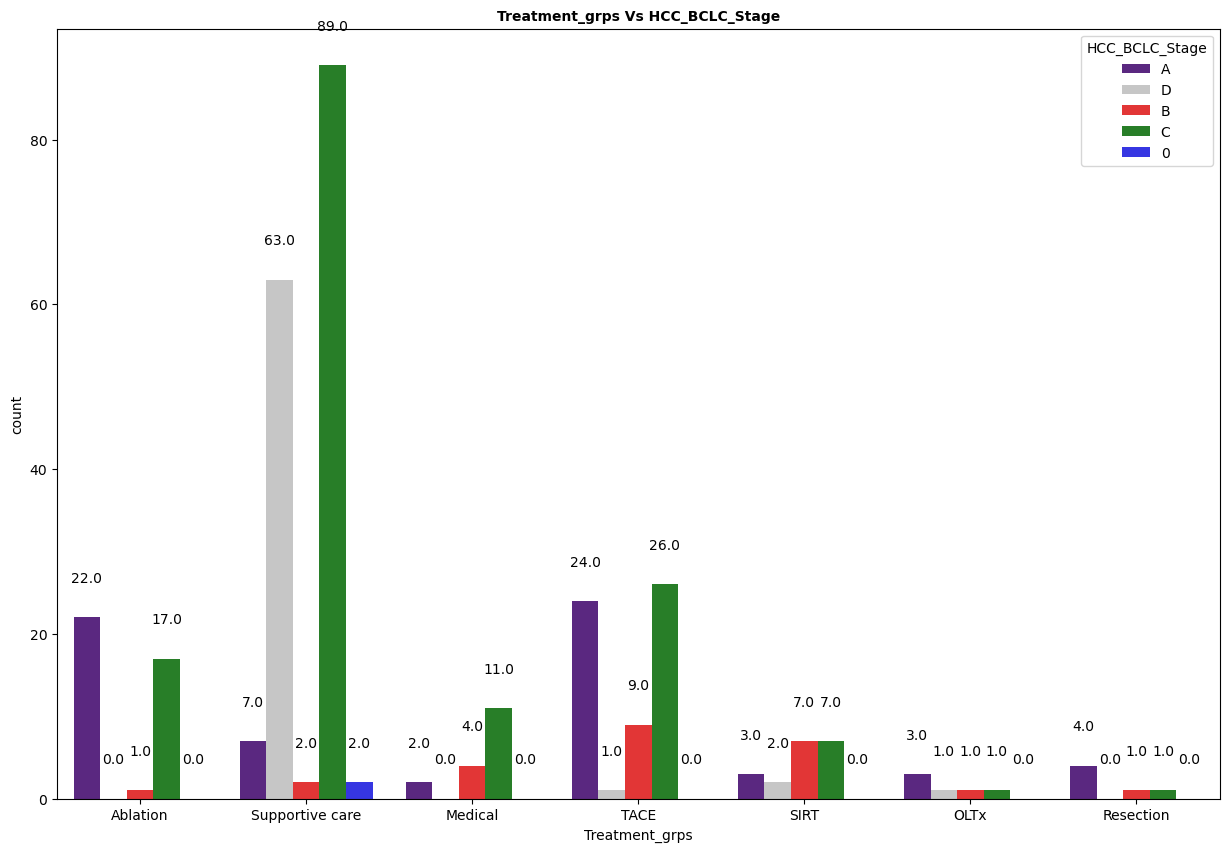

In [67]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Treatment_grps Vs HCC_BCLC_Stage', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Treatment_grps', hue = 'HCC_BCLC_Stage', data = data_covid, palette = ['indigo', 'silver', 'red', 'green', 'blue'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    According to the Barcelona staging system for liver cancer:
    1. At very early stage (stage 0), there is supportive care.
    2. At A, B, C stage all types of treatment are recommended according to indications. 
    3. In terminal stage D, supportive care, TACE, SIRT, OLTx are performed.

## Treatment_grps Vs ICC_TNM_Stage

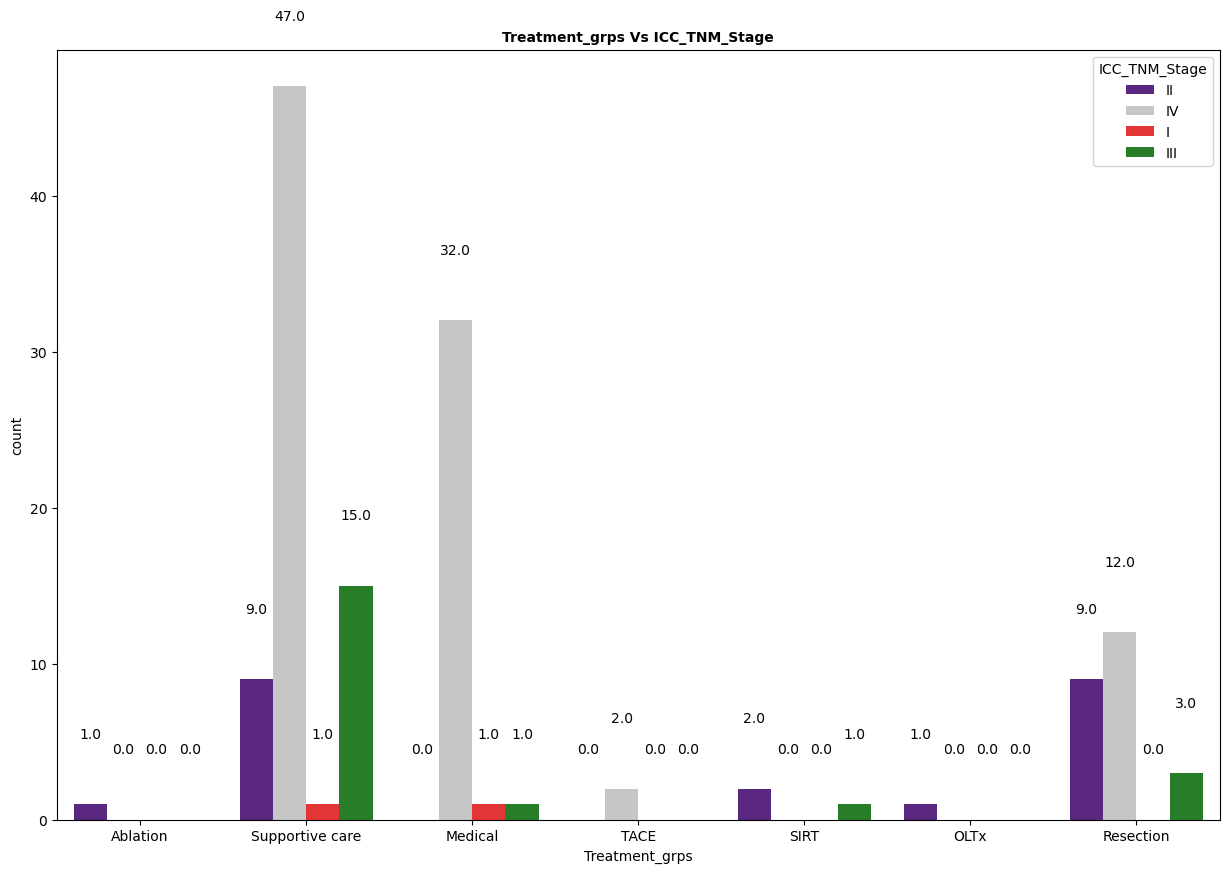

In [68]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Treatment_grps Vs ICC_TNM_Stage', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Treatment_grps', hue = 'ICC_TNM_Stage', data = data_covid, palette = ['indigo', 'silver', 'red', 'green'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Treatment for intrahepatic cholangiocarcinoma: 
     1. In stage I - supportive care, medical
     2. At stage II - supportive care, Ablation, SIRT, OLTx, Resection
     3. In stage III - supportive care, Medical, SIRT, Resection
     4. In stage IV - supportive care, Medical, TACE, Resection 

## Surveillance programme: Patient in a formal surveillance programme ("Y", "N")

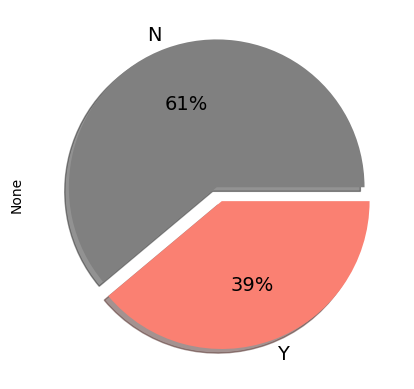

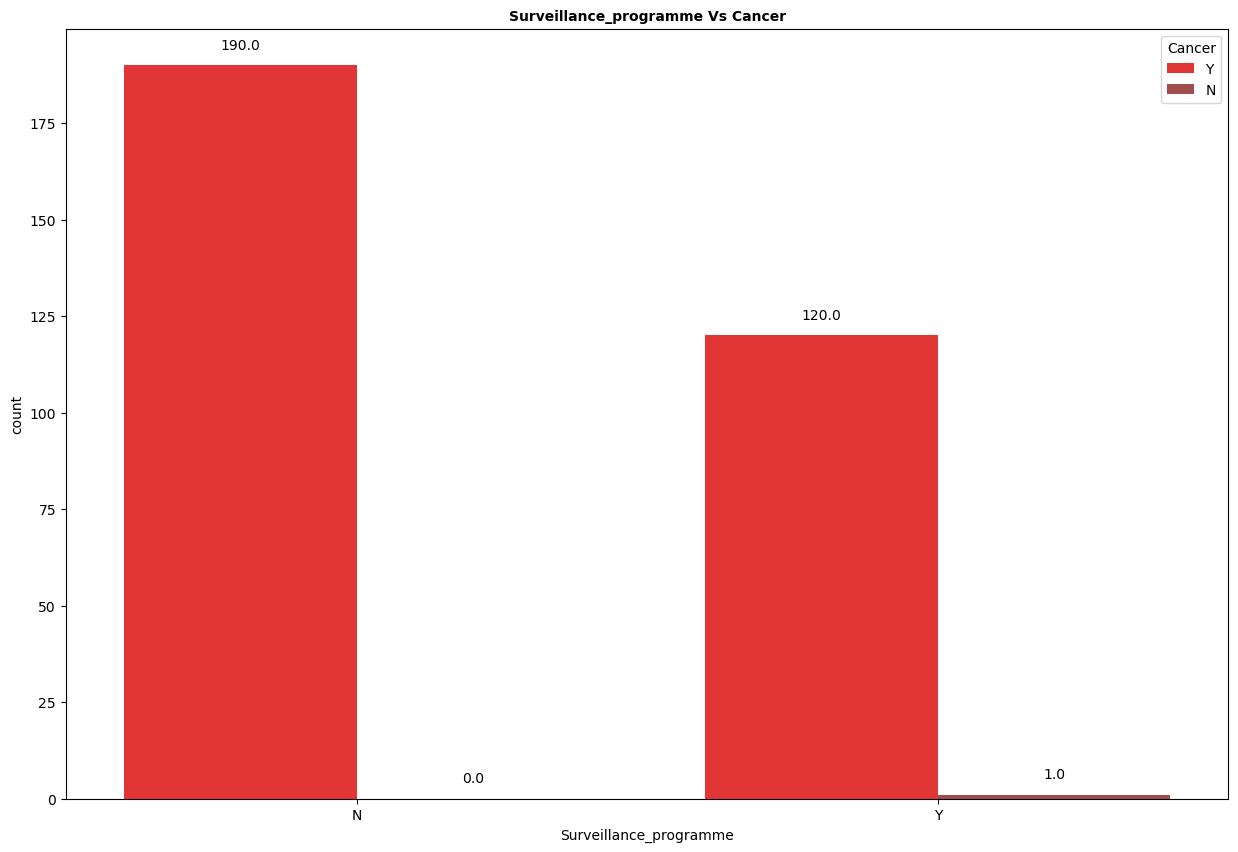

In [69]:
order = data_covid['Surveillance_programme'].value_counts().index

data_covid.groupby('Surveillance_programme').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.05, 0.05],shadow=True,
                                           colors =['grey', 'salmon'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Surveillance_programme Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Surveillance_programme', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    61% of patients were not observed by the official surveillance program, probably these are first time cases. 

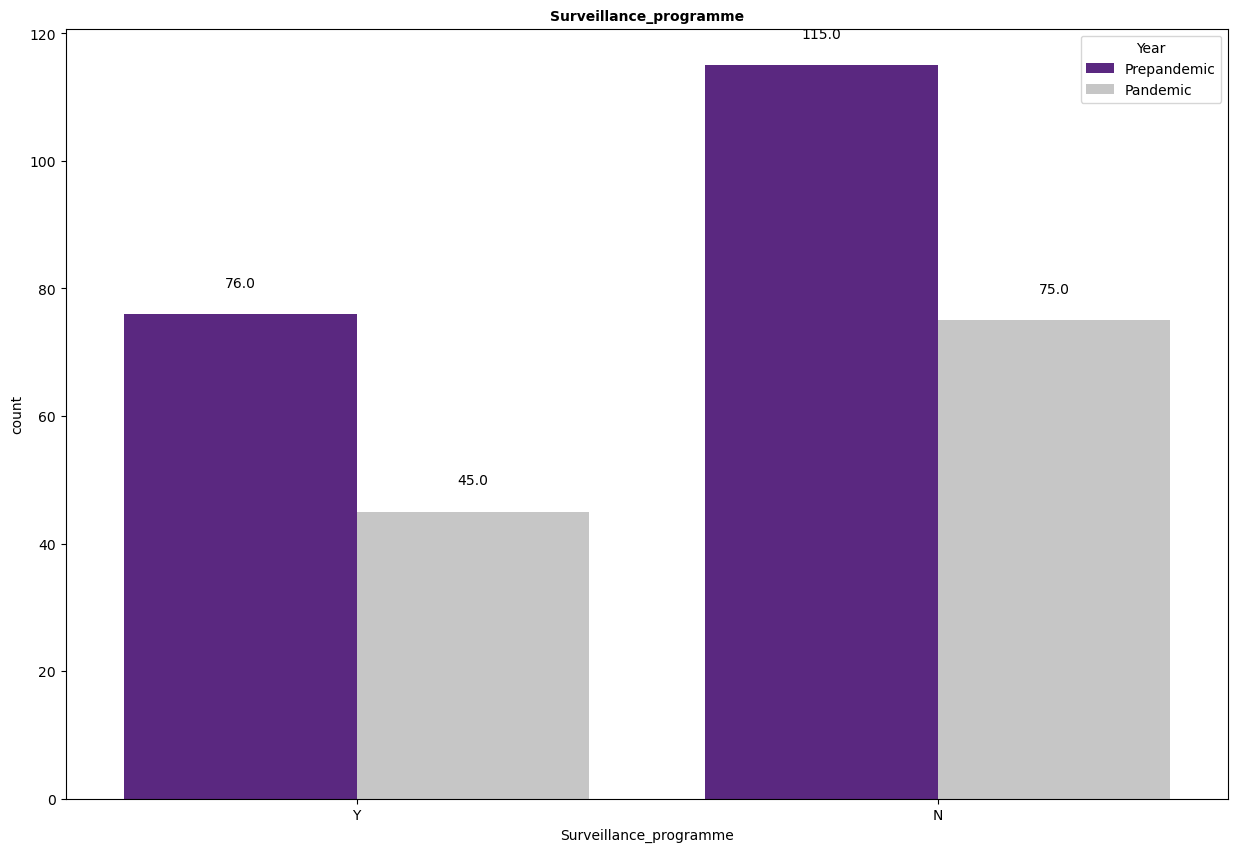

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Surveillance_programme', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Surveillance_programme', hue = 'Year', data = data_covid, palette = ['indigo', 'silver'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Patients were similarly unobserved before and during the pandemic.

## Prev_known_cirrhosis  ["Y", "N"] ранее известный цирроз печени.

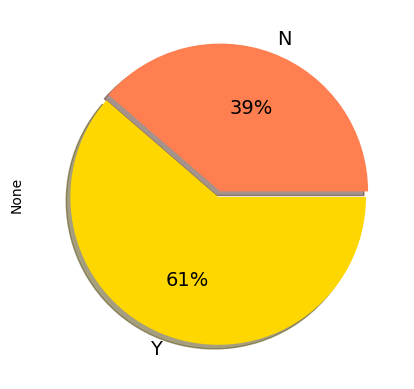

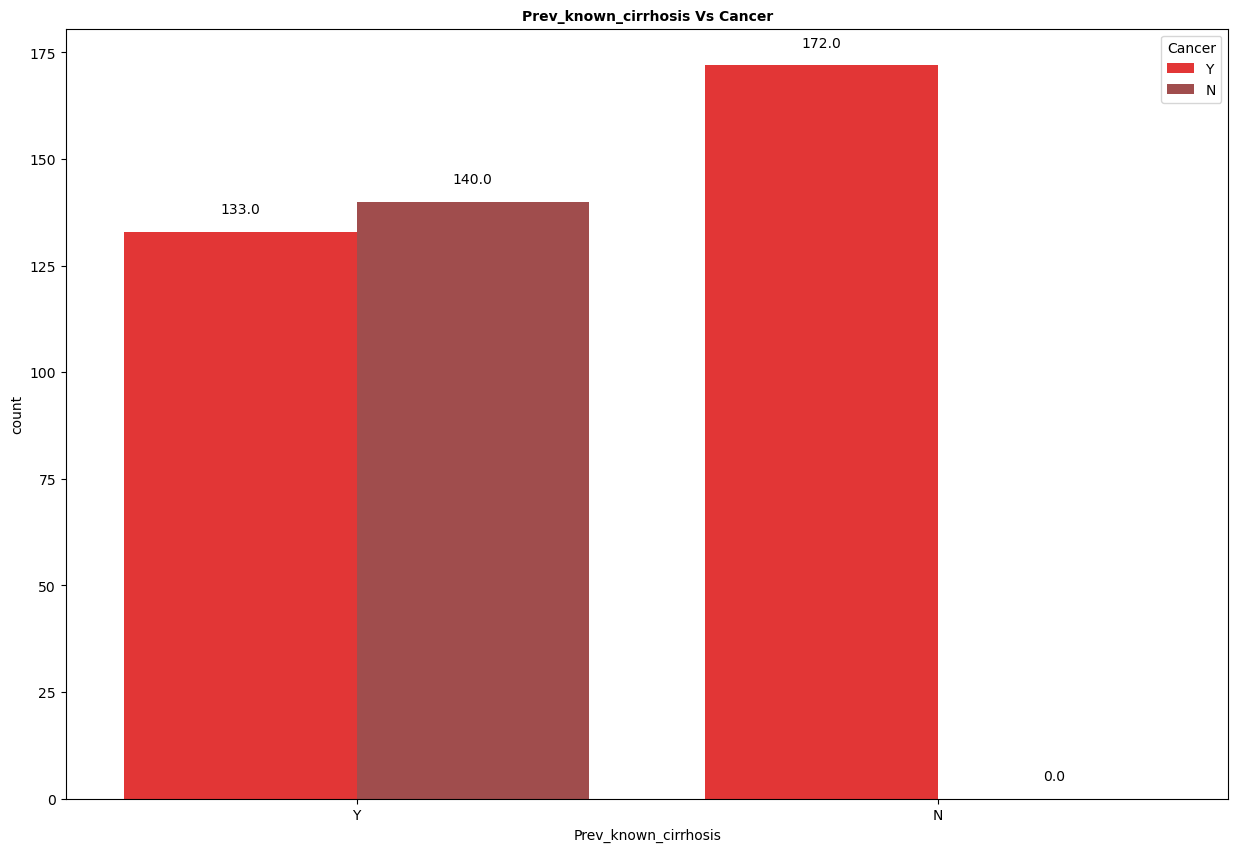

In [71]:
order = data_covid['Prev_known_cirrhosis'].value_counts().index

data_covid.groupby('Prev_known_cirrhosis').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02],shadow=True,
                                           colors =['coral', 'gold'])

plt.figure(figsize=(15, 10))
plt.subplot()
plt.title('Prev_known_cirrhosis Vs Cancer', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Prev_known_cirrhosis', hue = 'Cancer', data = data_covid, palette = ['red', 'brown'], order = order,  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. 61% of patients initially have cirrhosis. 
    2. liver cancer occurs whether or not cirrhosis has been diagnosed before. Patients without cirrhosis also have liver cancer (see etiology). 

## Distribution of Prev_known_cirrhosis by age"

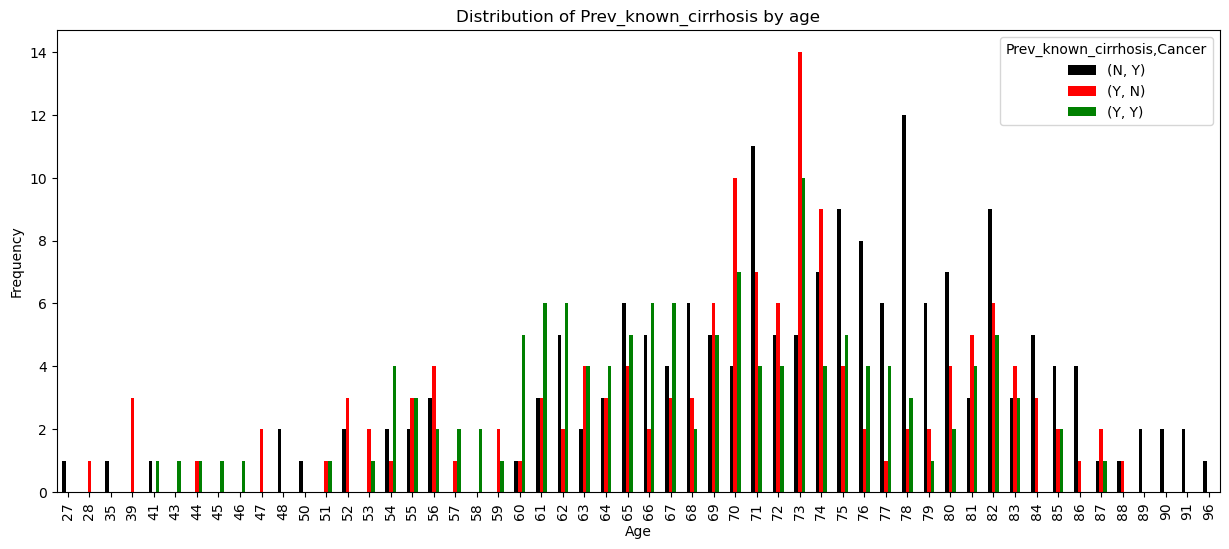

In [72]:
pd.crosstab(data_covid.Age, [data_covid.Prev_known_cirrhosis, data_covid.Cancer]).plot(kind="bar",figsize=(15,6), color = [ 'black', 'red', 'green',])
plt.title("Distribution of Prev_known_cirrhosis by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    1. From 28 years to 88 years of age previously having cirrhosis are free of liver cancer. Since most of them are diagnosed with intrahepatic cholangiocarcinoma. 
    2. at age 27, previously not having cirrhosis has liver cancer, but has previously been shown (by the variable "Cirrhosis") to have cirrhosis as the underlying disease as first diagnosed. 

 #### сравнение 

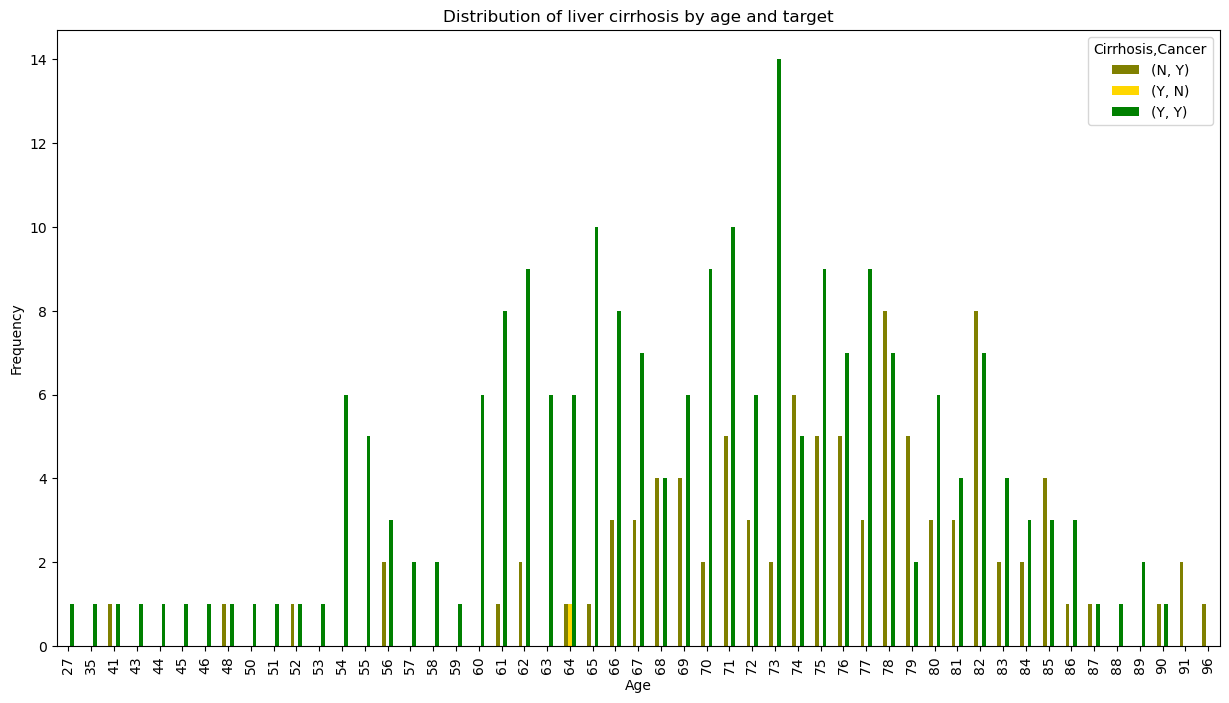

In [73]:
pd.crosstab(data_covid.Age, [data_covid.Cirrhosis, data_covid.Cancer]).plot(kind="bar",figsize=(15,8), color = ['olive', 'gold', 'g'])
plt.title("Distribution of liver cirrhosis by age and target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Feature engineering 

In [74]:
data_covid.Cancer.replace({"Y":1,"N":0}, inplace=True)
data_covid.Year.replace({"Prepandemic":0,"Pandemic": 1}, inplace=True)
data_covid.Gender.replace({'M': 1, 'F': 0}, inplace = True)
data_covid.Cirrhosis.replace({'Y': 1, 'N': 0}, inplace = True)
data_covid.Alive_Dead.replace({'Dead': 1, 'Alive': 0}, inplace = True)
data_covid.Surveillance_programme.replace({'Y': 1, 'N': 0}, inplace = True)
data_covid.Prev_known_cirrhosis.replace({"Y": 1, "N": 0}, inplace = True)
data_covid.Bleed.replace({'Y': 1, 'N': 0}, inplace = True)

In [75]:
features_categorical = [i for i in data_covid.columns if data_covid[i].dtypes == 'O']
features_numerical = [i for i in data_covid.columns if data_covid[i].dtypes != 'O' and i != 'Year']

In [76]:
print("There ate {} categorical variables".format(len(features_categorical)))

There ate 10 categorical variables


In [77]:
print("There ate {} numerical variables".format(len(features_numerical)))

There ate 16 numerical variables


In [78]:
data_covid['Year'].dtypes

dtype('int64')

In [79]:
def diagnostic_plots(df, variable):
    fig = plt.figure(figsize = (18, 5))
   
    plt.subplot(1, 3, 1)
    fig = df[variable].hist(bins = 30)
    fig.set_ylabel ('Count')
    fig.set_xlabel(variable)

    plt.subplot(1, 3, 2)
    stats.probplot(x = df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    fig = df.boxplot(column = variable)
    fig.set_title('Box-plot')
    fig.set_ylabel(variable)

    plt.show()

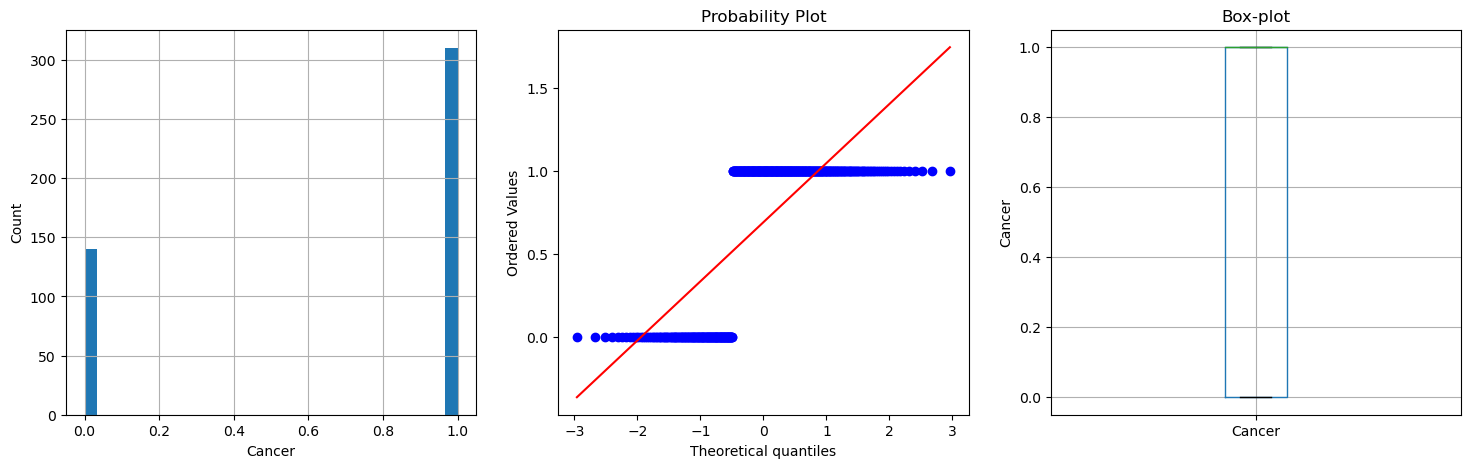

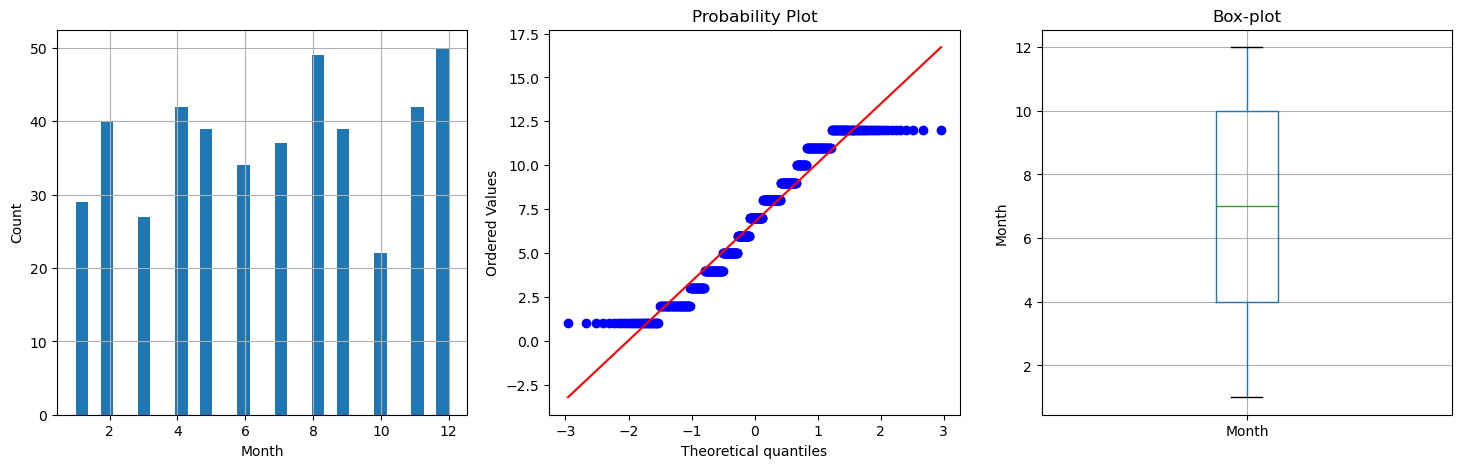

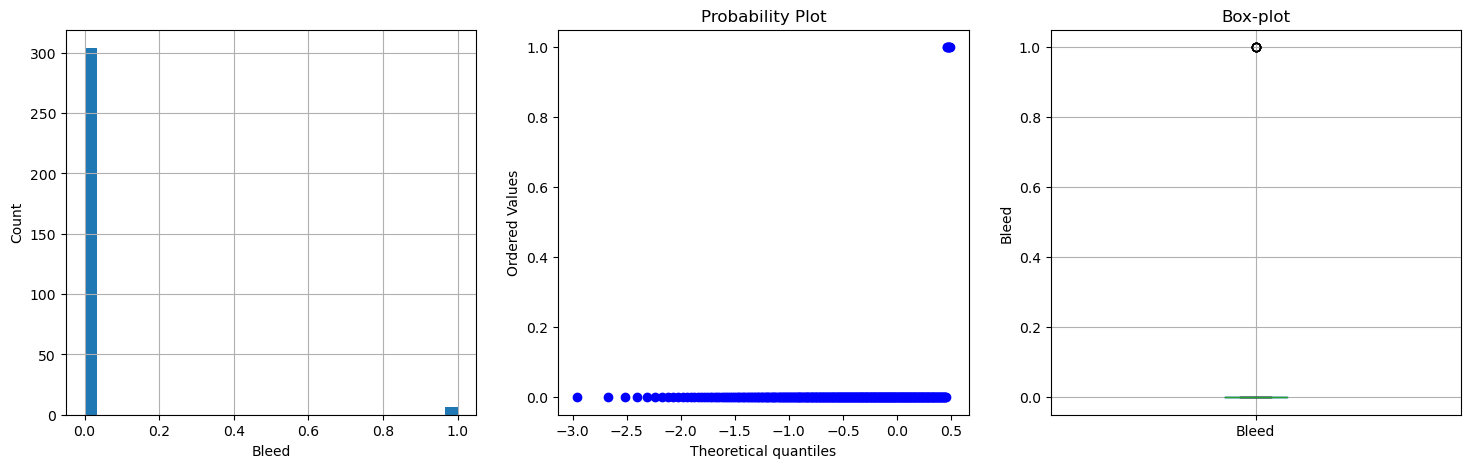

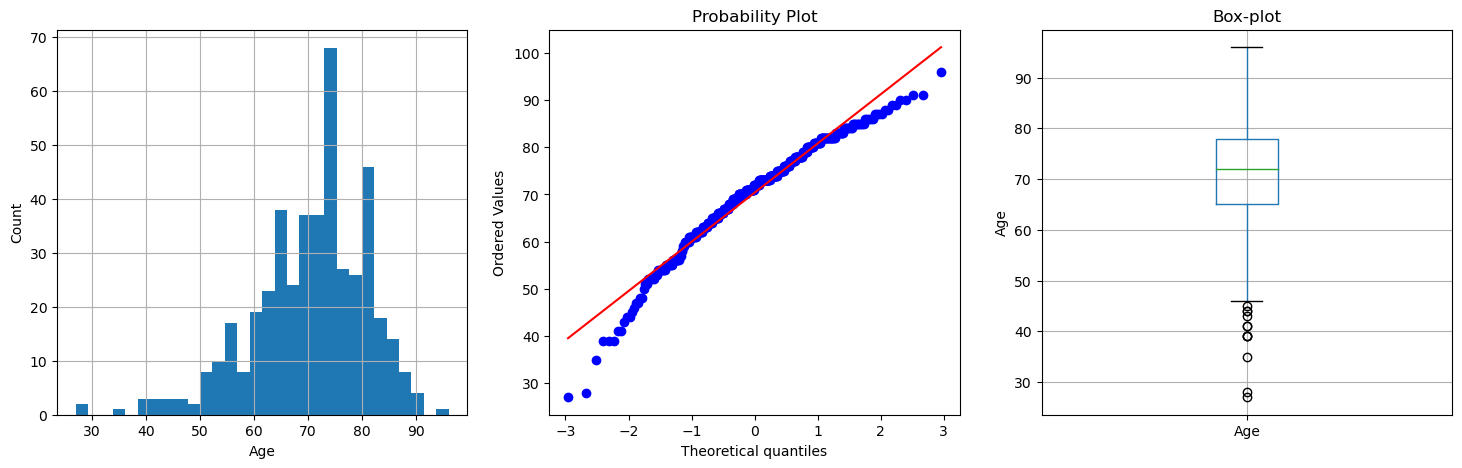

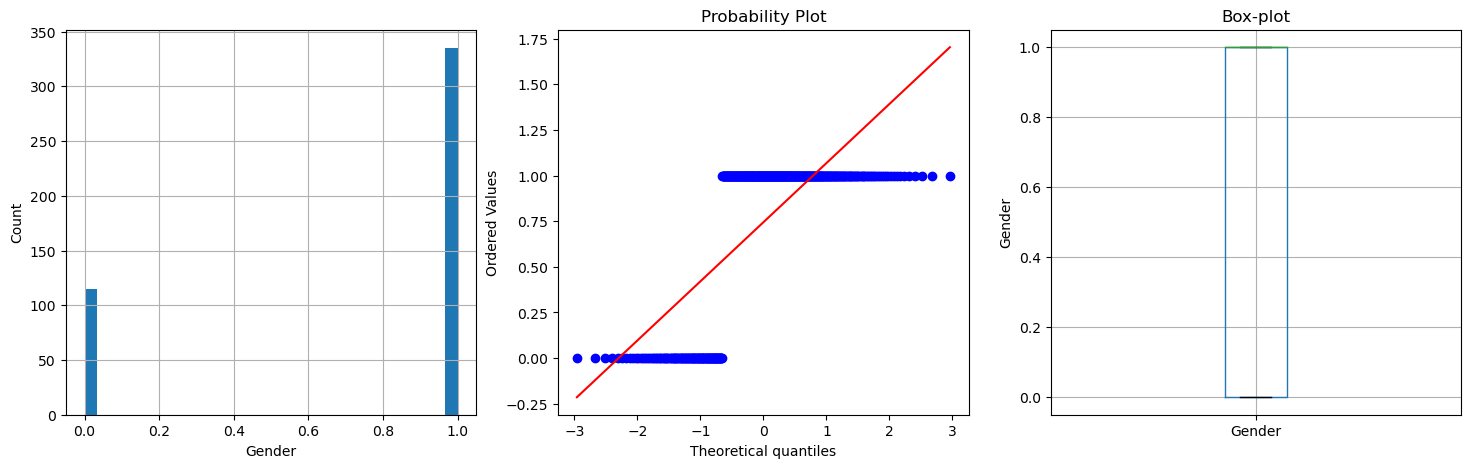

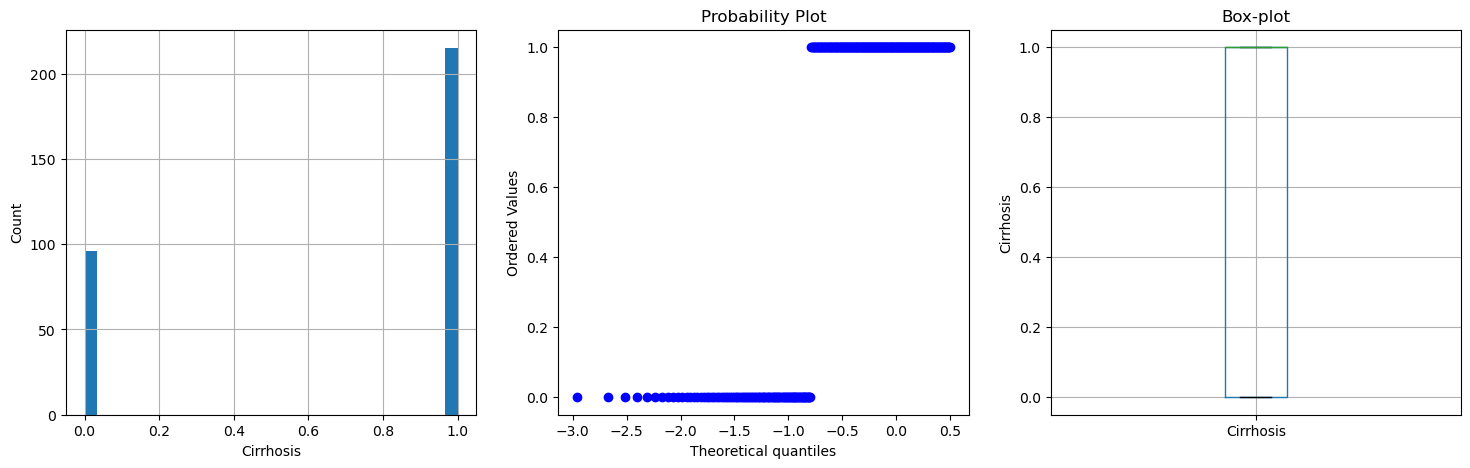

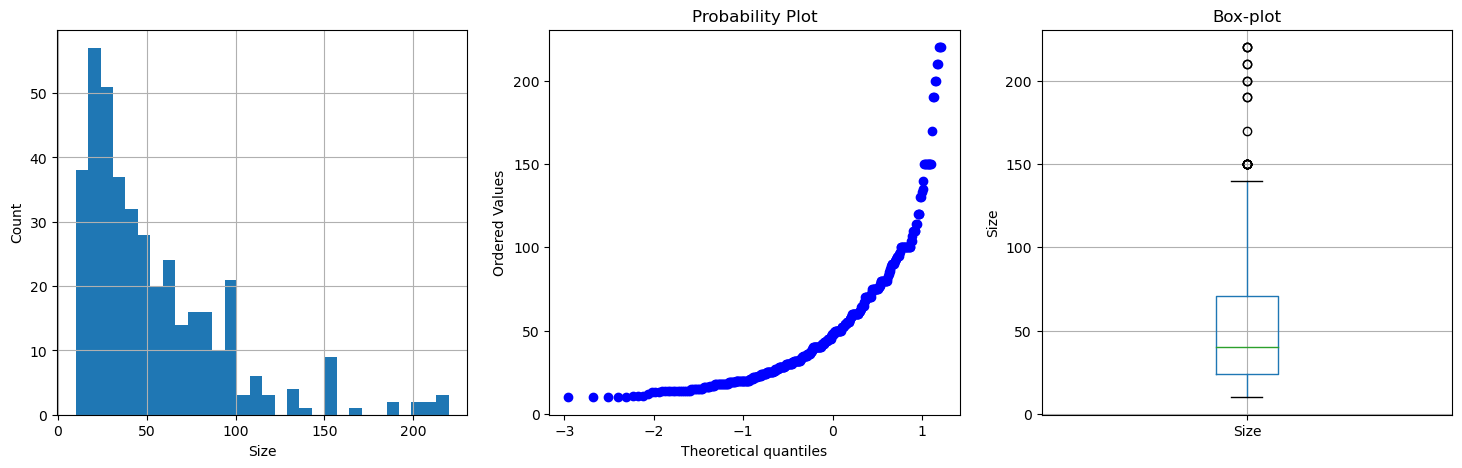

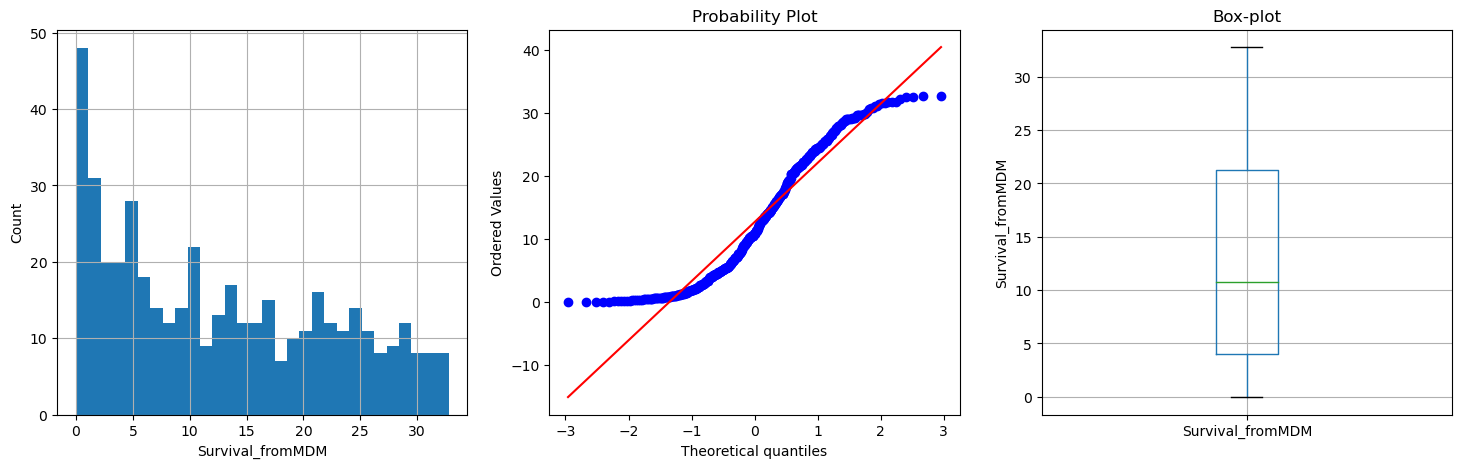

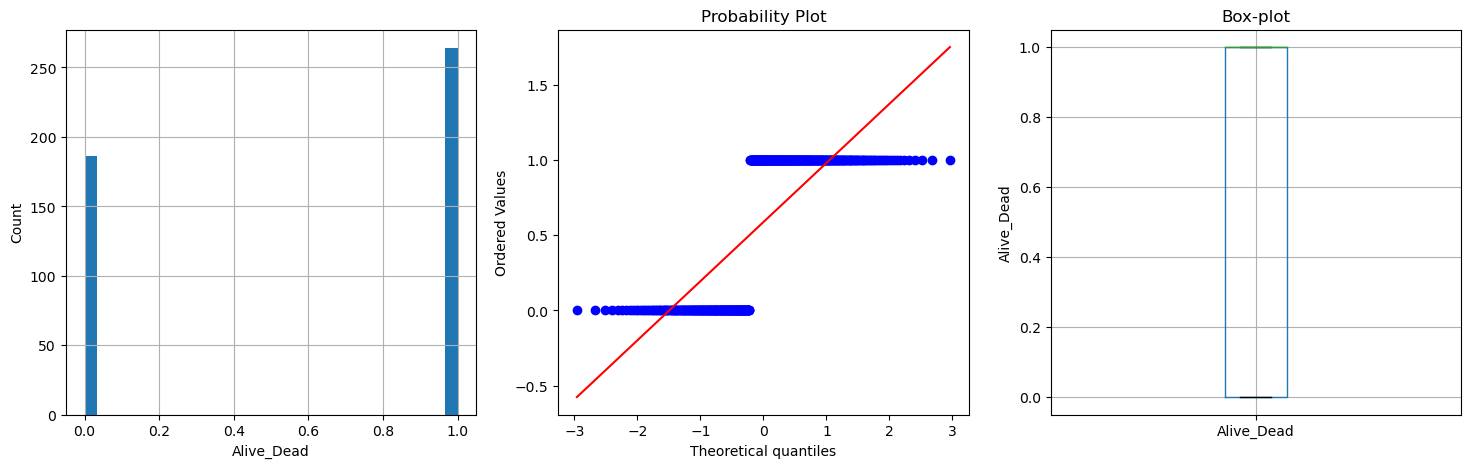

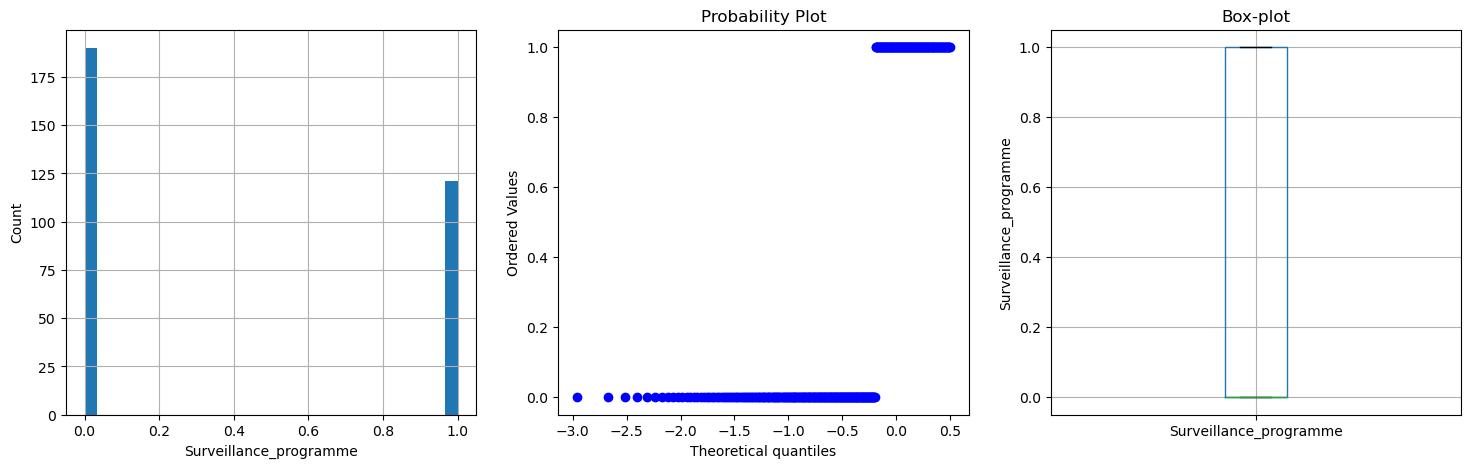

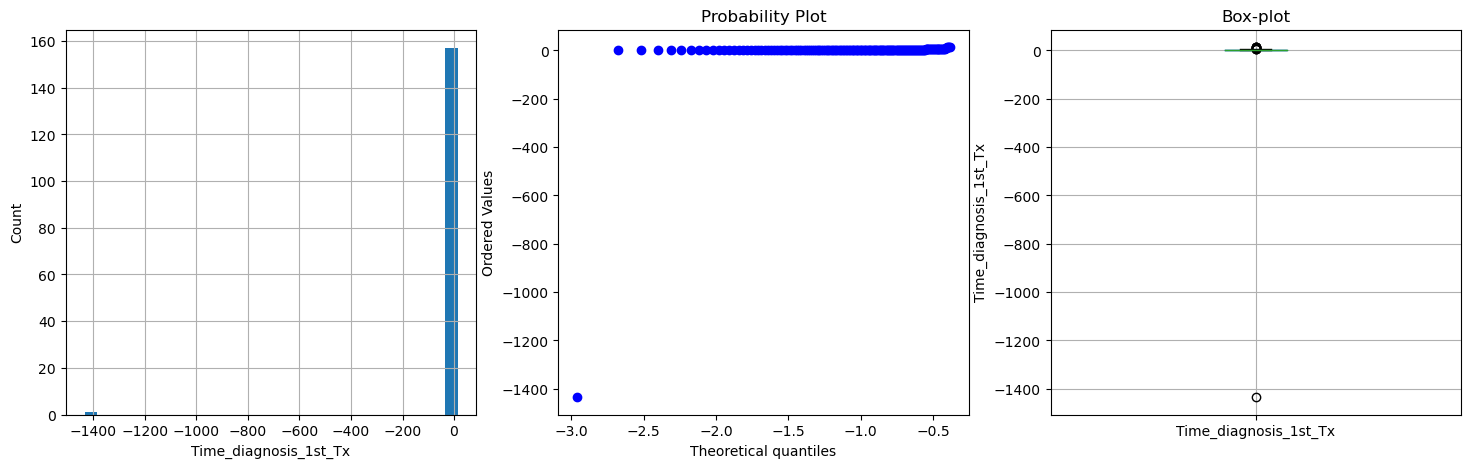

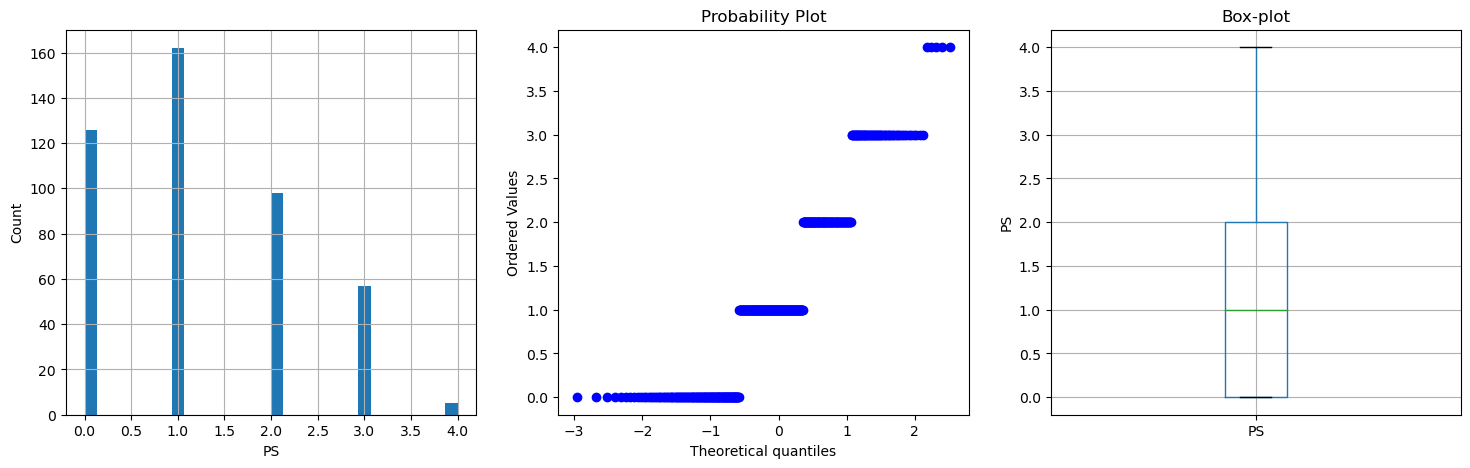

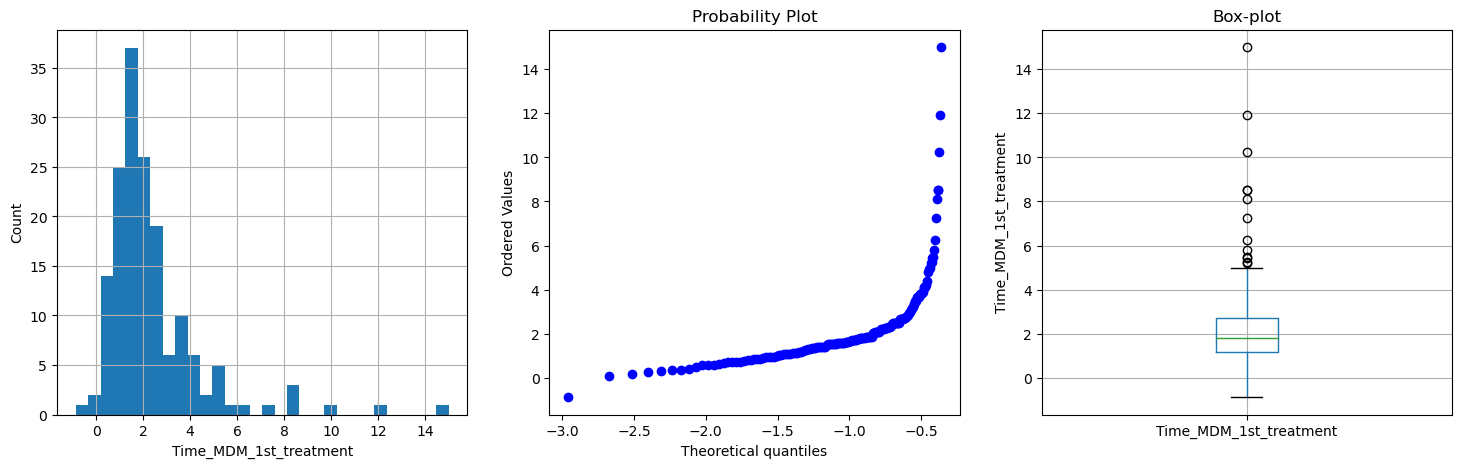

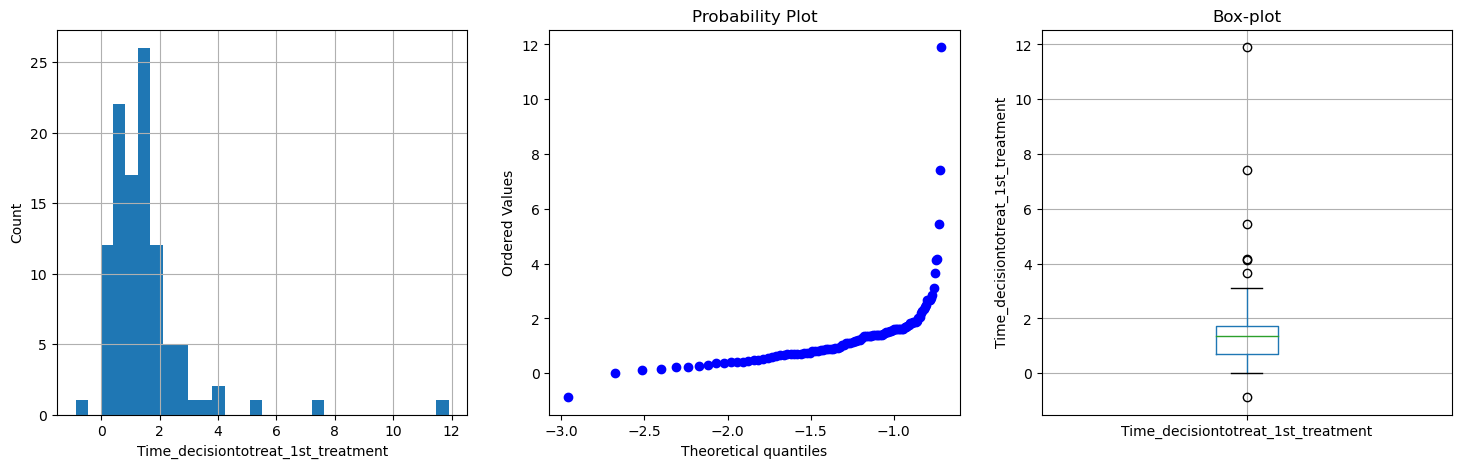

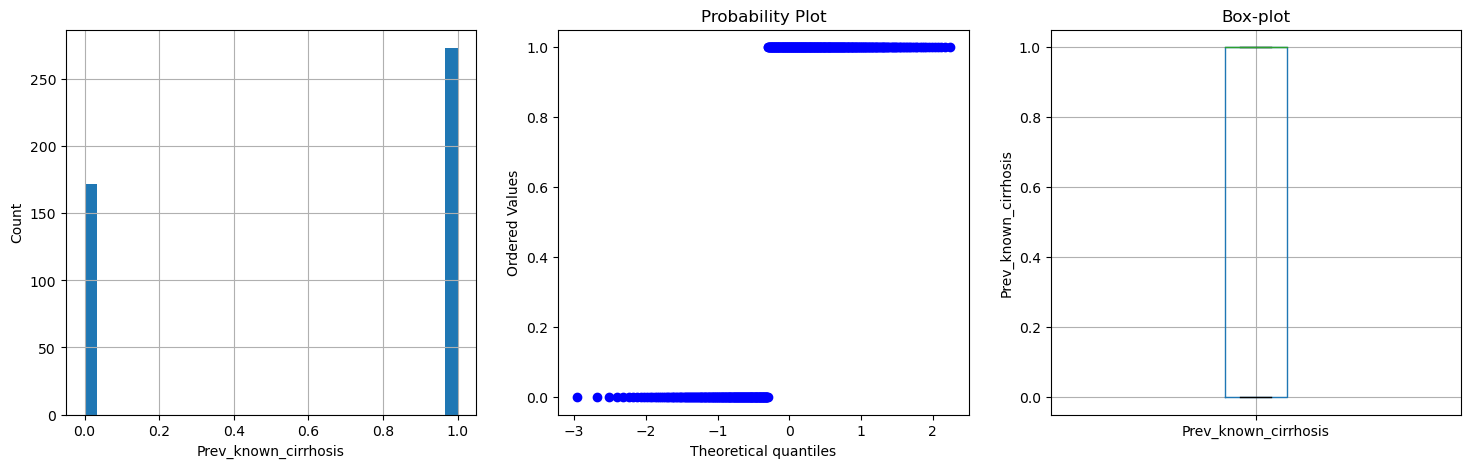

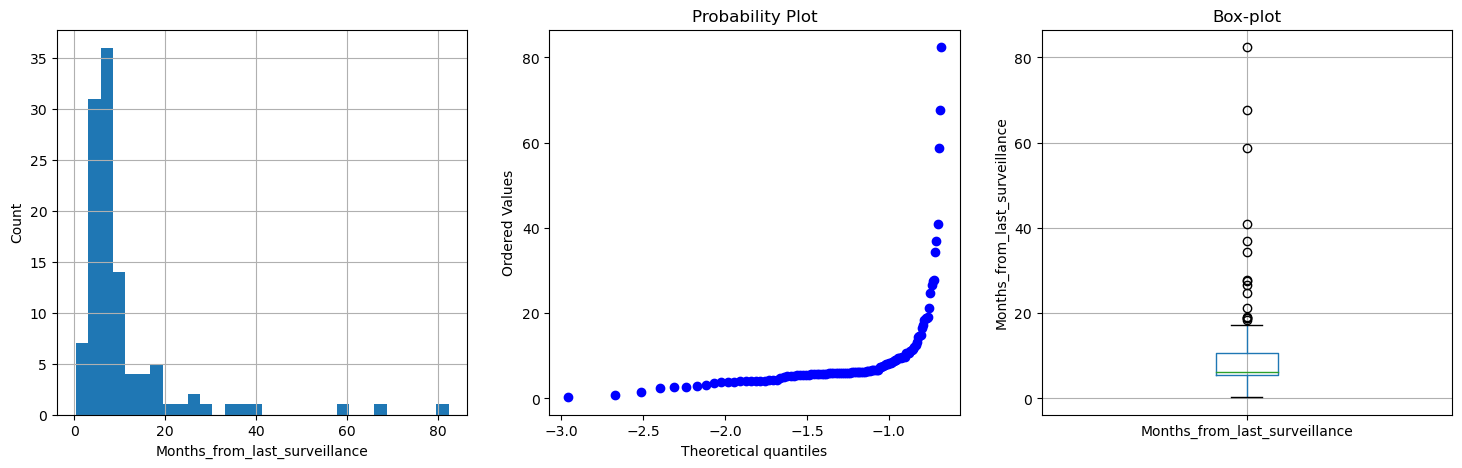

In [80]:
for var in features_numerical:
    diagnostic_plots(data_covid, var)

In [81]:
data_covid.isnull().sum().sort_values(ascending=False)

Date_incident_surveillance_scan       417
Mode_of_surveillance_detection        352
Time_decisiontotreat_1st_treatment    343
Months_from_last_surveillance         338
Surveillance_effectiveness            333
Type_of_incidental_finding            326
ICC_TNM_Stage                         311
Time_diagnosis_1st_Tx                 292
Time_MDM_1st_treatment                288
Bleed                                 140
HCC_BCLC_Stage                        139
Surveillance_programme                139
HCC_TNM_Stage                         139
Cirrhosis                             139
Etiology                              139
Size                                   50
Prev_known_cirrhosis                    5
PS                                      2
Treatment_grps                          2
Alive_Dead                              0
Survival_fromMDM                        0
Year                                    0
Gender                                  0
Age                               

In [82]:
missing_values = data_covid.isnull().sum().sort_values(ascending=False)
percent = (data_covid.isnull().sum() / data_covid.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent], axis = 1, keys = ['Total', 'Percent %'])
missing_data.head(30)

Total  Percent %
Date_incident_surveillance_scan       417   0.926667
Mode_of_surveillance_detection        352   0.782222
Time_decisiontotreat_1st_treatment    343   0.762222
Months_from_last_surveillance         338   0.751111
Surveillance_effectiveness            333   0.740000
Type_of_incidental_finding            326   0.724444
ICC_TNM_Stage                         311   0.691111
Time_diagnosis_1st_Tx                 292   0.648889
Time_MDM_1st_treatment                288   0.640000
Bleed                                 140   0.311111
HCC_BCLC_Stage                        139   0.308889
Surveillance_programme                139   0.308889
HCC_TNM_Stage                         139   0.308889
Cirrhosis                             139   0.308889
Etiology                              139   0.308889
Size                                   50   0.111111
Prev_known_cirrhosis                    5   0.011111
PS                                      2   0.004444
Treatment_grps                          2   0.004444
Alive_Dead                              0   0.000000
Survival_fromMDM                        0   0.000000
Year                                    0   0.000000
Gender                                  0   0.000000
Age                                     0   0.000000
Mode_Presentation                       0   0.000000
Month                                   0   0.000000
Cancer                                  0   0.000000

<AxesSubplot:title={'center':'missing values'}>

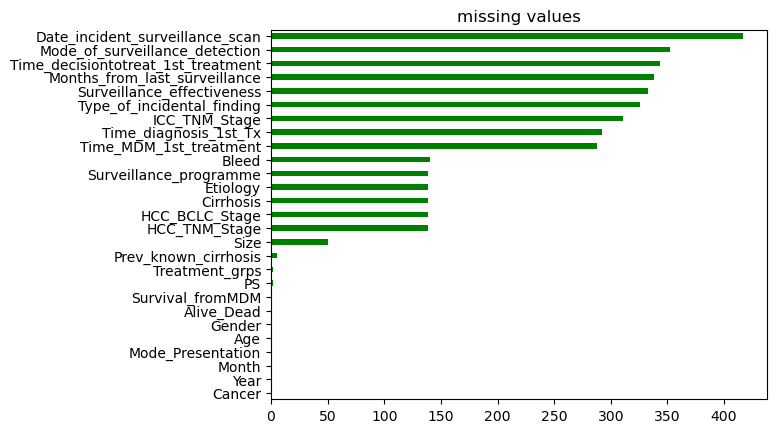

In [83]:
missing_values = data_covid.isnull().sum().sort_values(ascending=True)
missing_values.plot.barh(width = 0.4,color ='green', title = 'missing values')

In [84]:
correlation = data_covid.corr()
correlation

Cancer      Year     Month     Bleed  \
Cancer                              1.000000 -0.065960  0.036345       NaN   
Year                               -0.065960  1.000000  0.054532  0.128706   
Month                               0.036345  0.054532  1.000000  0.069135   
Bleed                                    NaN  0.128706  0.069135  1.000000   
Age                                 0.062250  0.007154  0.016699  0.093150   
Gender                              0.178528  0.062409 -0.033795  0.070951   
Cirrhosis                          -0.037952 -0.042299 -0.017878 -0.108471   
Size                               -0.017689  0.088413  0.097257  0.078607   
Survival_fromMDM                    0.152405 -0.315165 -0.126023 -0.083213   
Alive_Dead                         -0.183910 -0.072944 -0.070794  0.039631   
Surveillance_programme             -0.071171 -0.022871 -0.066421 -0.063578   
Time_diagnosis_1st_Tx               0.109026  0.055682  0.011012       NaN   
PS                                  0.007313  0.029762  0.075531  0.013544   
Time_MDM_1st_treatment              0.158421 -0.189110 -0.131972 -0.079428   
Time_decisiontotreat_1st_treatment -0.208358 -0.079378 -0.004294       NaN   
Prev_known_cirrhosis               -0.537771 -0.045739 -0.071571 -0.061456   
Months_from_last_surveillance       0.053518  0.117094  0.076578 -0.009697   

                                         Age    Gender  Cirrhosis      Size  \
Cancer                              0.062250  0.178528  -0.037952 -0.017689   
Year                                0.007154  0.062409  -0.042299  0.088413   
Month                               0.016699 -0.033795  -0.017878  0.097257   
Bleed                               0.093150  0.070951  -0.108471  0.078607   
Age                                 1.000000 -0.072519  -0.254813  0.099969   
Gender                             -0.072519  1.000000  -0.030227  0.078359   
Cirrhosis                          -0.254813 -0.030227   1.000000 -0.363965   
Size                                0.099969  0.078359  -0.363965  1.000000   
Survival_fromMDM                   -0.120455  0.051267   0.012060 -0.275757   
Alive_Dead                          0.125213 -0.098634   0.018329  0.248669   
Surveillance_programme             -0.275699 -0.099508   0.419036 -0.391839   
Time_diagnosis_1st_Tx               0.107329 -0.042522   0.178559  0.024200   
PS                                  0.226920 -0.074867   0.048199  0.100413   
Time_MDM_1st_treatment              0.004613  0.051497   0.038400 -0.134439   
Time_decisiontotreat_1st_treatment -0.164421  0.019042   0.068213 -0.080157   
Prev_known_cirrhosis               -0.186583 -0.180385   0.559182 -0.253788   
Months_from_last_surveillance      -0.119515  0.120632  -0.128667  0.120726   

                                    Survival_fromMDM  Alive_Dead  \
Cancer                                      0.152405   -0.183910   
Year                                       -0.315165   -0.072944   
Month                                      -0.126023   -0.070794   
Bleed                                      -0.083213    0.039631   
Age                                        -0.120455    0.125213   
Gender                                      0.051267   -0.098634   
Cirrhosis                                   0.012060    0.018329   
Size                                       -0.275757    0.248669   
Survival_fromMDM                            1.000000   -0.721876   
Alive_Dead                                 -0.721876    1.000000   
Surveillance_programme                      0.196143   -0.150784   
Time_diagnosis_1st_Tx                       0.027200   -0.117253   
PS                                         -0.440474    0.399691   
Time_MDM_1st_treatment                      0.172388    0.010499   
Time_decisiontotreat_1st_treatment          0.088311   -0.009573   
Prev_known_cirrhosis                        0.015390    0.036368   
Months_from_last_surveillance              -0.115075  

<AxesSubplot:>

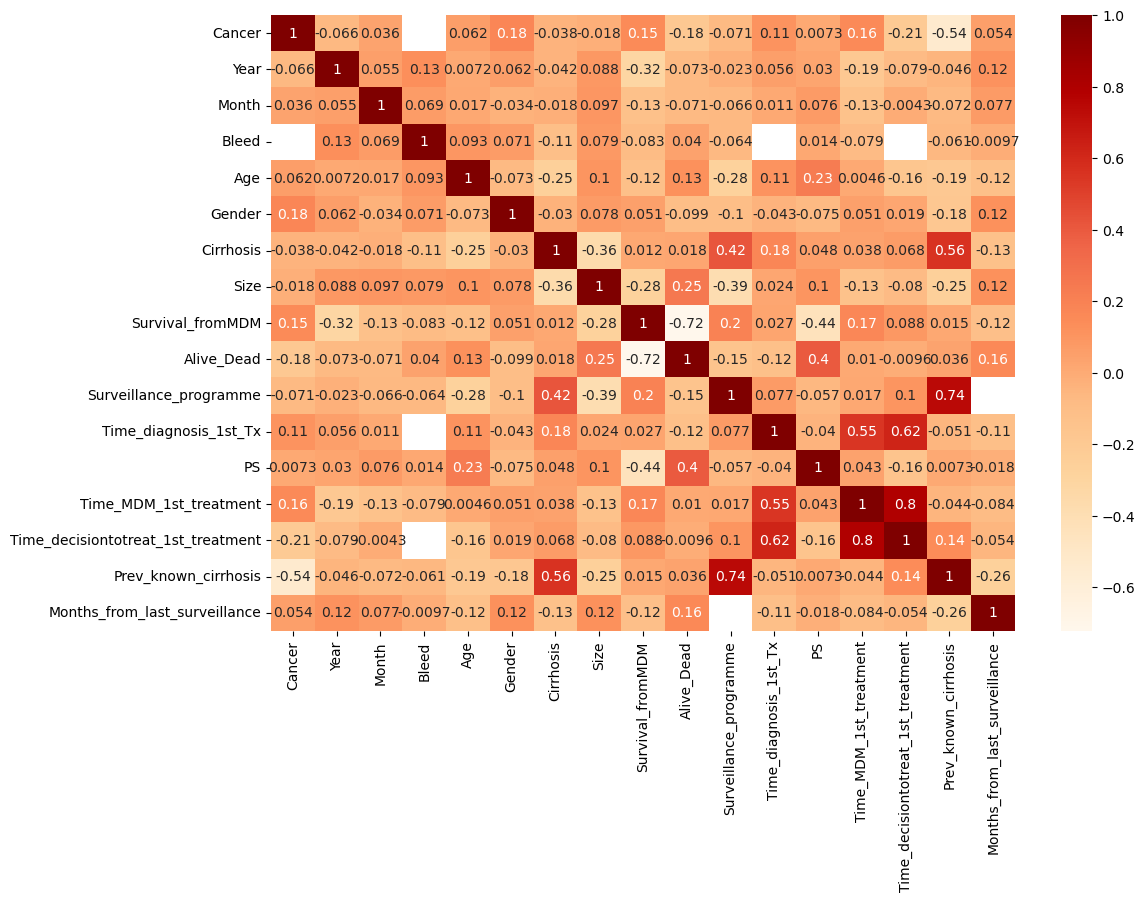

In [85]:
plt.subplots(figsize = (12, 8))
sns.heatmap(correlation, cmap = 'OrRd', annot = True)

### Delete Nan

In [86]:
data_covid.drop(labels = ['Date_incident_surveillance_scan', 'Time_decisiontotreat_1st_treatment', 'Mode_of_surveillance_detection', 'Months_from_last_surveillance', 'Bleed'], axis = 1, inplace = True)

In [87]:
data_covid.isnull().sum().sort_values(ascending=False)

Surveillance_effectiveness    333
Type_of_incidental_finding    326
ICC_TNM_Stage                 311
Time_diagnosis_1st_Tx         292
Time_MDM_1st_treatment        288
Surveillance_programme        139
Etiology                      139
Cirrhosis                     139
HCC_TNM_Stage                 139
HCC_BCLC_Stage                139
Size                           50
Prev_known_cirrhosis            5
Treatment_grps                  2
PS                              2
Survival_fromMDM                0
Alive_Dead                      0
Year                            0
Gender                          0
Age                             0
Mode_Presentation               0
Month                           0
Cancer                          0
dtype: int64

## Split dataset

In [88]:
X = data_covid.drop('Year', axis = 1)
y = data_covid['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((360, 21), (90, 21))

## Pipeline 
## Logistic Regression

In [89]:
lr_pipe = Pipeline([ 
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat', OneHotEncoder(variables= features_categorical, top_categories= None,
                       drop_last = True)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state = 10, max_iter = 150, C = 0.01, solver = 'liblinear'))])


In [90]:
lr_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat':[OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'lr__max_iter': [100, 150, 200],
    'lr__solver': ['lbfgs', 'liblinear']
   
}]

In [91]:
lr_grid_search = GridSearchCV(
              lr_pipe,
              lr_param_grid, cv = 5, n_jobs= -1, scoring = 'roc_auc')

In [92]:
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'lr__max_iter': [100, 150, 200],
                          'lr__solver': ['lbfgs', 'liblinear'],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()]}],
             scoring='roc_auc')

In [93]:
lr_grid_search.best_params_

{'encoder_cat': CountFrequencyEncoder(),
 'imputer_cat': CategoricalImputer(imputation_method='frequent'),
 'imputer_num': MeanMedianImputer(),
 'lr__max_iter': 100,
 'lr__solver': 'liblinear',
 'scaler': StandardScaler()}

Training score is 0.7333333333333333.
Testing score is 0.7222222222222222.


<AxesSubplot:>

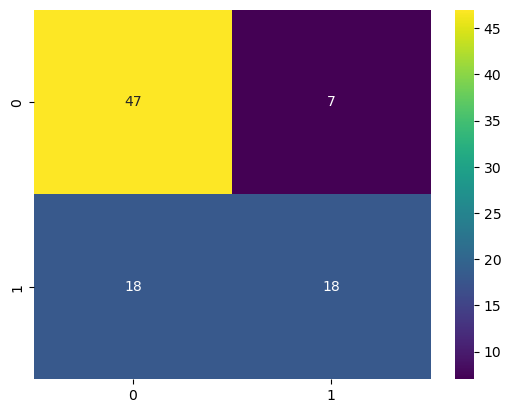

In [94]:
y_train_pred_lr = lr_grid_search.predict(X_train)
y_test_pred_lr = lr_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_lr)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_lr)))
cm = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'viridis')

In [141]:
print('LogisticRegression test set')
print(classification_report(y_test, y_test_pred_lr))

LogisticRegression test set
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        54
           1       0.72      0.50      0.59        36

    accuracy                           0.72        90
   macro avg       0.72      0.69      0.69        90
weighted avg       0.72      0.72      0.71        90



In [140]:
print('LogisticRegression train set')
print(classification_report(y_train, y_train_pred_lr))

LogisticRegression train set
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       212
           1       0.68      0.66      0.67       148

    accuracy                           0.73       360
   macro avg       0.72      0.72      0.72       360
weighted avg       0.73      0.73      0.73       360



## AdaBoostClassifier 

In [96]:
adaboost_pipe = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  CountFrequencyEncoder(encoding_method = 'frequency',
                                           variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(n_estimators = 100, learning_rate = 0.2))
])


In [97]:
adaboost_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat': [OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.1, 0.2, 0.3, 0.4],
}]

In [98]:
adaboost_grid_search = GridSearchCV(
              adaboost_pipe,
              adaboost_param_grid, cv = 5, n_jobs= -1, scoring = 'roc_auc')

In [99]:
adaboost_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
                          'adaboost__n_estimators': [50, 100, 150],
                          'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()]}],
             scoring='roc_auc')

In [100]:
adaboost_grid_search.best_params_

{'adaboost__learning_rate': 0.1,
 'adaboost__n_estimators': 150,
 'encoder_cat': OneHotEncoder(drop_last=True),
 'imputer_cat': CategoricalImputer(),
 'imputer_num': MeanMedianImputer(),
 'scaler': StandardScaler()}

In [142]:
y_train_pred_adaboost = adaboost_grid_search.predict(X_train)
y_test_pred_adaboost = adaboost_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_adaboost)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_adaboost)))


Training score is 0.8583333333333333.
Testing score is 0.8111111111111111.


In [143]:
print('AdaBoostClassifier test set')
print(classification_report(y_test, y_test_pred_adaboost))

AdaBoostClassifier test set
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        54
           1       0.81      0.69      0.75        36

    accuracy                           0.81        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.81      0.81      0.81        90



In [145]:
print('AdaBoostClassifier train set')
print(classification_report(y_train, y_train_pred_adaboost))

AdaBoostClassifier train set
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       212
           1       0.90      0.74      0.81       148

    accuracy                           0.86       360
   macro avg       0.87      0.84      0.85       360
weighted avg       0.86      0.86      0.86       360



<AxesSubplot:>

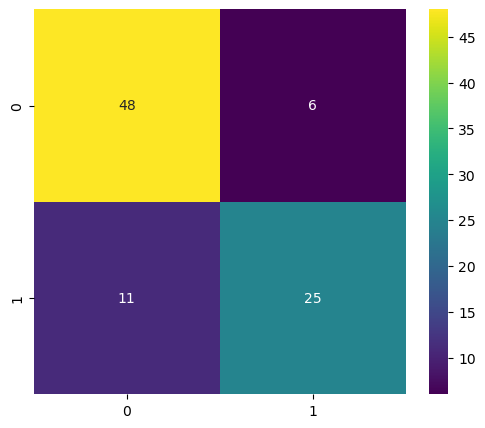

In [102]:
cm = confusion_matrix(y_test, y_test_pred_adaboost)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

## Random Forest Classifier

In [103]:
rf_pipe = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  CountFrequencyEncoder(encoding_method = 'frequency',
                                           variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators= 80, max_depth= 2, random_state= 10))
])

In [104]:
rf_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat': [OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'rf__n_estimators': [80, 100, 150],
    'rf__max_depth': [2, 3, 4]
}]

In [105]:
rf_grid_search = GridSearchCV(
              rf_pipe,
              rf_param_grid, cv = 5, n_jobs= -1, scoring = 'roc_auc')

In [106]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'rf__max_depth': [2, 3, 4],
                          'rf__n_estimators': [80, 100, 150],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()]}],
             scoring='roc_auc')

In [107]:
rf_grid_search.best_params_

{'encoder_cat': CountFrequencyEncoder(),
 'imputer_cat': CategoricalImputer(),
 'imputer_num': MeanMedianImputer(),
 'rf__max_depth': 4,
 'rf__n_estimators': 100,
 'scaler': StandardScaler()}

In [146]:
y_train_pred_rf = rf_grid_search.predict(X_train)
y_test_pred_rf = rf_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_rf)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_rf)))

Training score is 0.8722222222222222.
Testing score is 0.7777777777777778.


In [147]:
print('RandomForestClassifier test set')
print(classification_report(y_test, y_test_pred_rf))

RandomForestClassifier​ test set
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        54
           1       0.79      0.61      0.69        36

    accuracy                           0.78        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.78      0.78      0.77        90



In [148]:
print('RandomForestClassifier train set')
print(classification_report(y_train, y_train_pred_rf))

RandomForestClassifier train set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       212
           1       0.95      0.73      0.82       148

    accuracy                           0.87       360
   macro avg       0.89      0.85      0.86       360
weighted avg       0.88      0.87      0.87       360



<AxesSubplot:>

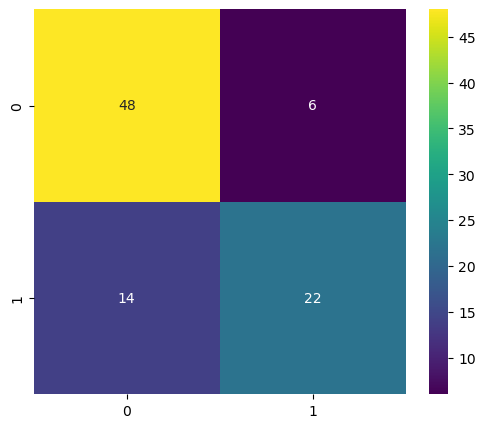

In [109]:
cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

## SVC

In [110]:
svc_pipe = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  CountFrequencyEncoder(encoding_method = 'frequency',
                                           variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel = 'rbf', gamma = 'scale',  C = 1, degree = 1))
])

In [111]:
svc_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
     
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat':[OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'svc__tol': [0.001, 0.002],
    'svc__gamma': ['scale', 'auto'], 
    'svc__degree': [1, 2, 3],
}]

In [112]:
svc_grid_search = GridSearchCV(
              svc_pipe,
              svc_param_grid, cv = 5, n_jobs= -1, scoring = 'roc_auc')

In [113]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()],
                          'svc__degree': [1, 2, 3],
                          'svc__gamma': ['scale', 'auto'],
                          'svc__tol': [0.001, 0.002]}],
             scoring='roc_auc')

In [114]:
svc_grid_search.best_params_

{'encoder_cat': CountFrequencyEncoder(),
 'imputer_cat': CategoricalImputer(imputation_method='frequent'),
 'imputer_num': MeanMedianImputer(),
 'scaler': StandardScaler(),
 'svc__degree': 1,
 'svc__gamma': 'scale',
 'svc__tol': 0.001}

In [150]:
y_train_pred_svc = svc_grid_search.predict(X_train)
y_test_pred_svc = svc_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_svc)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_svc)))


Training score is 0.8611111111111112.
Testing score is 0.8.


In [149]:
print("SVC test set")
print(classification_report(y_test, y_test_pred_svc))

SVC test set
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.78      0.69      0.74        36

    accuracy                           0.80        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.80      0.80      0.80        90



In [152]:
print("SVC train set")
print(classification_report(y_train, y_train_pred_svc))

SVC train set
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       212
           1       0.86      0.79      0.82       148

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



<AxesSubplot:>

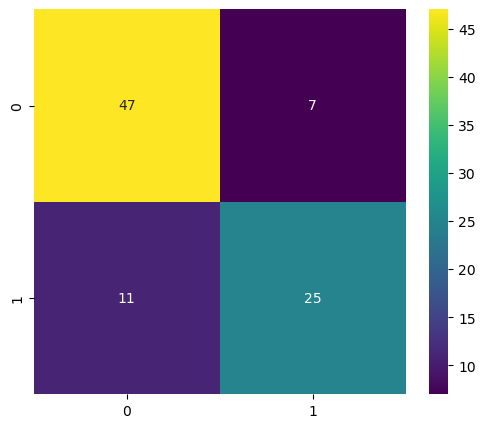

In [116]:
cm = confusion_matrix(y_test, y_test_pred_svc)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

## XGBClassifier

In [117]:
xgb_pipe = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  CountFrequencyEncoder(encoding_method = 'frequency',
                                           variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(gamma = 0.1, learning_rate = 0.01,
                          n_estimators = 500))
])

In [118]:
xgb_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat':[OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'xgb__n_estimators': [200, 300],
    'xgb__gamma': [0.01, 0.1, 1]
}]

In [119]:
xgb_grid_search = GridSearchCV(
                       xgb_pipe,
                       xgb_param_grid,
                       cv = 5, n_jobs = -1, scoring = 'r2')

In [120]:
xgb_grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()],
                          'xgb__gamma': [0.01, 0.1, 1],
                          'xgb__n_estimators': [200, 300]}],
             scoring='r2')

In [121]:
xgb_grid_search.best_params_

{'encoder_cat': OneHotEncoder(drop_last=True),
 'imputer_cat': CategoricalImputer(),
 'imputer_num': MeanMedianImputer(),
 'scaler': StandardScaler(),
 'xgb__gamma': 0.1,
 'xgb__n_estimators': 300}

In [122]:
y_train_pred_xgb = xgb_grid_search.predict(X_train)
y_test_pred_xgb = xgb_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_xgb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_xgb)))

Training score is 0.9138888888888889.
Testing score is 0.7888888888888889.
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        54
           1       0.81      0.61      0.70        36

    accuracy                           0.79        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90



In [153]:
print('XGBClassifier test set')
print(classification_report(y_test, y_test_pred_xgb))

XGBClassifier test set
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        54
           1       0.81      0.61      0.70        36

    accuracy                           0.79        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90



In [154]:
print('XGBClassifier train set')
print(classification_report(y_train, y_train_pred_xgb))

XGBClassifier train set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       212
           1       0.91      0.87      0.89       148

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360



<AxesSubplot:>

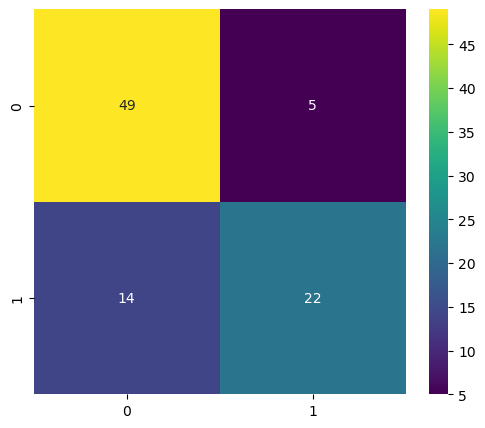

In [123]:
cm = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

## KNeighborsClassifier

In [124]:
knn_pipe = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  CountFrequencyEncoder(encoding_method = 'frequency',
                                           variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 5, p = 2))
])

In [125]:
knn_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat':[OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'knn__n_neighbors': [3, 4, 5, 6],
    'knn__p': [1, 2]
}]

In [126]:
knn_grid_search = GridSearchCV(
                       knn_pipe,
                       knn_param_grid,
                       cv = 5, n_jobs = -1, scoring = 'roc_auc')

In [127]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'knn__n_neighbors': [3, 4, 5, 6], 'knn__p': [1, 2],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()]}],
             scoring='roc_auc')

In [128]:
knn_grid_search.best_params_

{'encoder_cat': CountFrequencyEncoder(),
 'imputer_cat': CategoricalImputer(imputation_method='frequent'),
 'imputer_num': MeanMedianImputer(),
 'knn__n_neighbors': 4,
 'knn__p': 1,
 'scaler': StandardScaler()}

In [155]:
y_train_pred_knn = knn_grid_search.predict(X_train)
y_test_pred_knn = knn_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_knn)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_knn)))

Training score is 0.7611111111111111.
Testing score is 0.6777777777777778.


In [157]:
print('KNeighborsClassifier test set')
print(classification_report(y_test, y_test_pred_knn))

KNeighborsClassifier test set
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        54
           1       0.71      0.33      0.45        36

    accuracy                           0.68        90
   macro avg       0.69      0.62      0.61        90
weighted avg       0.69      0.68      0.64        90



In [156]:
print('KNeighborsClassifier train set')
print(classification_report(y_train, y_train_pred_knn))

KNeighborsClassifier train set
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       212
           1       0.89      0.48      0.62       148

    accuracy                           0.76       360
   macro avg       0.81      0.72      0.72       360
weighted avg       0.79      0.76      0.74       360



<AxesSubplot:>

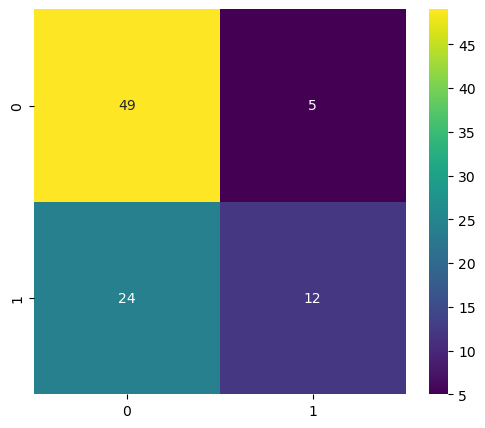

In [130]:
cm = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

## GaussianNB

In [131]:
nb_pipe  = Pipeline([
    ('imputer_num', MeanMedianImputer(variables= features_numerical)),
    ('imputer_cat', CategoricalImputer(variables= features_categorical)),
    ('encoder_cat',  OneHotEncoder(variables= features_categorical)),
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())

])

In [132]:
nb_param_grid = [{
    'imputer_num':[MeanMedianImputer(),
                  MeanMedianImputer(imputation_method = 'mean')],
    'imputer_cat':[CategoricalImputer(),
                   CategoricalImputer(imputation_method = 'frequent')], 
    'encoder_cat':[OneHotEncoder(drop_last = True), 
                    CountFrequencyEncoder()],
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
}]

In [133]:
nb_grid_search = GridSearchCV(
                       nb_pipe,
                       nb_param_grid,
                       cv = 5, n_jobs = -1, scoring = 'roc_auc')

In [134]:
nb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Cancer',
                                                                     'Month',
                                                                     'Bleed',
                                                                     'Age',
                                                                     'Gender',
                                                                     'Cirrhosis',
                                                                     'Size',
                                                                     'Survival_fromMDM',
                                                                     'Alive_Dead',
                                                                     'Surveillance_programme',
                                                                     'Time_diagnosis_1st_Tx',
                                                                     'PS',
                                                                     'Time_MDM_1st_treatment',
                                                                     'Time_decisiontotreat_1st_treatment',
                                                                     'Prev_known_cirrhosis',
                                                                     'Months_from_last_surveillance']...
                                       ('nb', GaussianNB())]),
             n_jobs=-1,
             param_grid=[{'encoder_cat': [OneHotEncoder(drop_last=True),
                                          CountFrequencyEncoder()],
                          'imputer_cat': [CategoricalImputer(),
                                          CategoricalImputer(imputation_method='frequent')],
                          'imputer_num': [MeanMedianImputer(),
                                          MeanMedianImputer(imputation_method='mean')],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     RobustScaler()]}],
             scoring='roc_auc')

In [135]:
nb_grid_search.best_params_

{'encoder_cat': CountFrequencyEncoder(),
 'imputer_cat': CategoricalImputer(imputation_method='frequent'),
 'imputer_num': MeanMedianImputer(imputation_method='mean'),
 'scaler': StandardScaler()}

In [158]:
y_train_pred_nb = knn_grid_search.predict(X_train)
y_test_pred_nb = knn_grid_search.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_train_pred_nb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_test_pred_nb)))

Training score is 0.7611111111111111.
Testing score is 0.6777777777777778.


In [159]:
print('GaussianNB test set')
print(classification_report(y_test, y_test_pred_nb))

GaussianNB test set
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        54
           1       0.71      0.33      0.45        36

    accuracy                           0.68        90
   macro avg       0.69      0.62      0.61        90
weighted avg       0.69      0.68      0.64        90



In [160]:
print('GaussianNB train set')
print(classification_report(y_train, y_train_pred_nb))

GaussianNB train set
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       212
           1       0.89      0.48      0.62       148

    accuracy                           0.76       360
   macro avg       0.81      0.72      0.72       360
weighted avg       0.79      0.76      0.74       360



<AxesSubplot:>

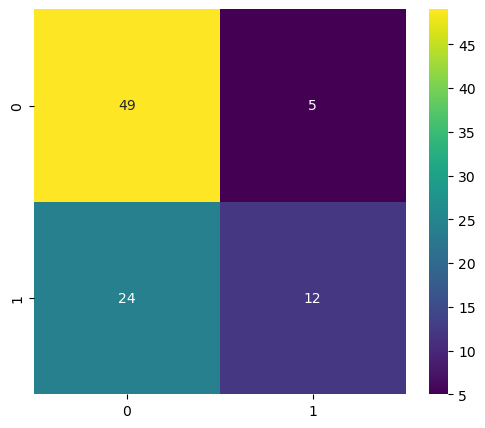

In [137]:
cm = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, cmap= 'viridis', annot = True)

In [138]:
data_model = pd.DataFrame(data = {'Model': ['LogisticRegression', 'AdaBoostClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier', 'KNeighborsClassifier',
                                             'GaussianNB'], 
                                  'Accuracy score': [accuracy_score(y_test, y_test_pred_lr),
                                                     accuracy_score(y_test, y_test_pred_adaboost),
                                                     accuracy_score(y_test, y_test_pred_rf),
                                                     accuracy_score(y_test,  y_test_pred_svc),
                                                     accuracy_score(y_test, y_test_pred_xgb),
                                                     accuracy_score(y_test, y_test_pred_knn),
                                                     accuracy_score(y_test, y_test_pred_nb)]}).sort_values(by = 'Accuracy score', ascending = False)

fig = px.bar(data_model, x = 'Model', y='Accuracy score', text = 'Accuracy score', color = 'Model')

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=13, l=13, r=13, b=13))
fig.show()

## Conclusion:

### I. Conclusions on data analysis:
          1. Before the pandemic, 59.11% were diagnosed with liver cancer than during the pandemic. This is explained by the fact that during the pandemic almost all medical institutions specializing in a subspecialty, their work was suspended or postponed. So, the liver cancer detection rates are lower.
          2. According to the etiology of liver cancer, NAFLD is more common - 39% of cases of non-alcoholic fatty liver disease, also Liver cancer is more likely to be diagnosed if the patient has cirrhosis and it is considered the underlying disease
          3. The youngest age in men with liver cancer is 27 years, the oldest 96 years. In women, the youngest age of liver cancer patients is 41 years old, the oldest is 87 years old. 
          4. 45% are symptomatically detected with liver cancer, 32% are incidentally detected, and 23% are observed. Those who were observed with other liver diseases, liver cancer was diagnosed more often - 96 cases. 120 times there is accidental detection of liver cancer. 107 cases had symptoms of liver cancer but was not diagnosed 
          5. During the pandemic, symptomatic detection of liver cancer is lower than before the pandemic. This is because, firstly, other hospitals were closed and people only went to the infectious disease department. Secondly, all symptoms of liver cancer could be attributed to COVID-19 symptoms.  
         6. Most patients died of liver cancer before the pandemic.
         7. The higher the stage of the disease, the greater the risk of death.
         8. Most patients received supportive care. 
         9.  According to the results of this dataset: The pandemic had a very strong impact on the detection of liver cancer, at that time most people did not receive specialized medical care. All forces were directed to fight COVID-19. 


### II. Conclusions after data training: 
    1. This dataset has 450 rows × 27 columns, which is considered small for analysis. 
    2. Dataset has very many Nan values, which some of them will be deleted or replaced after processing, resulting in data   reduction.
    3. For data training, I chose models: 'LogisticRegression',
                                           'AdaBoostClassifier',
                                          'RandomForestClassifier', 
                                           'SVC', 
                                           'XGBClassifier', 
                                           'KNeighborsClassifier',
                                           'GaussianNB'.
    4.  The best and most stable result is: AdaBoostClassifier - train 0.86, test 0.81. Predicts results well before the pandemic than during the pandemic because more data is available before the pandemic. Also SVC performs better - train - 0.86, test 0.80. 
     LogisticRegression train 0.73, test 0.72 gives normal but weak predictions.
     XGBClassifier predicts pre-pandemic results better, train 0.91, test 0.79 - this is very overfit. RandomForestClassifier shows a similar result.
    'KNeighborsClassifier', 'GaussianNB' perform worst, but maybe they are not suitable for this dataset.
        